In [4]:
import os

import optuna
from optuna.trial import TrialState

import torch.optim as optim
import torch.utils.data

from collections import defaultdict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

from tqdm.notebook import tqdm

from rdkit import Chem

import torch
import torch.nn as nn
from torch.utils.data import Dataset, Subset

from torch_geometric.loader import DataLoader
from model import molecular_conv

from deepchem.feat.molecule_featurizers import MolGraphConvFeaturizer

In [5]:
data = pd.read_excel('QSAR_refined.xlsx', index_col=0)
data = data[data['outliers'] == 0]

def smi_to_pyg(smi, y):
    featurizer = MolGraphConvFeaturizer(use_edges=True)
    mol = Chem.MolFromSmiles(smi)
    graph_data = featurizer._featurize(mol)
    pyg_data = graph_data.to_pyg_graph()
    pyg_data.y = torch.FloatTensor([y])
    pyg_data.mol = mol
    pyg_data.smiles = smi
    return pyg_data

class MyDataset(Dataset):
    def __init__(self, smiles, response):
        mols = [smi_to_pyg(smi, y) for smi, y in
                tqdm(zip(smiles, response), total=len(smiles))]
        self.X = [m for m in mols if m]

    def __getitem__(self, idx):
        return self.X[idx]

    def __len__(self):
        return len(self.X)

base_dataset = MyDataset(data['smi'], data['logkOH•'])

N = len(base_dataset)
M = N // 10

indices = np.random.permutation(range(N))

idx = {'train': indices[:8 * M],
       'valid': indices[8 * M:9 * M],
       'test': indices[9 * M:]}

modes = ['train', 'valid', 'test']

dataset = {m: Subset(base_dataset, idx[m]) for m in modes}
loader = {m: DataLoader(dataset[m], batch_size=200, shuffle=True) if m == 'train' else DataLoader(dataset[m], batch_size=200) for m in modes}

node_dim = base_dataset[0].num_node_features
edge_dim = base_dataset[0].num_edge_features

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

  0%|          | 0/1387 [00:00<?, ?it/s]

[12:25:50] WARNING: not removing hydrogen atom without neighbors
[12:25:50] WARNING: not removing hydrogen atom without neighbors
[12:25:50] WARNING: not removing hydrogen atom without neighbors
[12:25:50] WARNING: not removing hydrogen atom without neighbors


[I 2023-07-15 12:25:52,685] A new study created in memory with name: no-name-5045d353-3fe0-4805-a713-b4af6fdcad64


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.554718 valid 10.554117 test 10.650407
Epoch: 020 Loss: train 0.742393 valid 0.767104 test 0.702960
Epoch: 040 Loss: train 0.725523 valid 0.688673 test 0.715332
Epoch: 060 Loss: train 0.732564 valid 0.735009 test 0.705320
Epoch: 080 Loss: train 0.834529 valid 0.848587 test 0.778382
Epoch: 100 Loss: train 0.739060 valid 0.749333 test 0.681202
Epoch: 120 Loss: train 0.841592 valid 0.950896 test 0.927441
Epoch: 140 Loss: train 0.943690 valid 0.815884 test 0.775256
Epoch: 160 Loss: train 0.728522 valid 0.712497 test 0.688380
Epoch: 180 Loss: train 1.020572 valid 0.995211 test 0.896955
Epoch: 200 Loss: train 0.763924 valid 0.785698 test 0.811626
Epoch: 220 Loss: train 0.799137 valid 0.731729 test 0.671083
Epoch: 240 Loss: train 0.748512 valid 0.778595 test 0.766690
Epoch: 260 Loss: train 0.914486 valid 0.981083 test 0.973385
Epoch: 280 Loss: train 0.674032 valid 0.691655 test 0.659717
Epoch: 300 Loss: train 1.047801 valid 1.042555 test 1.051517
Epoch: 320 Loss: train

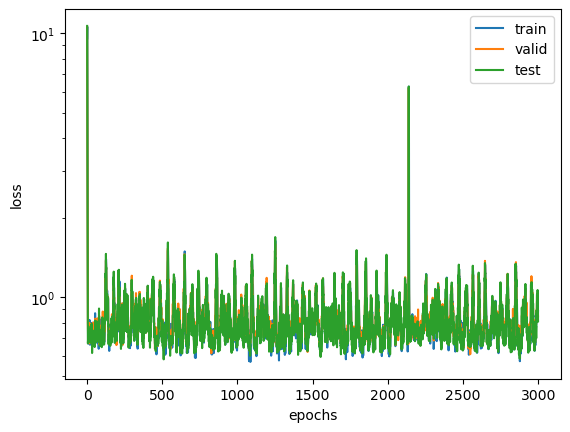

[I 2023-07-15 12:27:31,313] Trial 0 finished with value: 0.8554603809005122 and parameters: {'hidden_channels': 512, 'num_layers': 5, 'num_timesteps': 3, 'dropout': 0.14928639106676805, 'optimizer': 'RMSprop', 'lr': 0.005332028100587665}. Best is trial 0 with value: 0.8554603809005122.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.506881 valid 5.627562 test 5.681682
Epoch: 020 Loss: train 0.573248 valid 0.648645 test 0.650971
Epoch: 040 Loss: train 0.645372 valid 0.645716 test 0.637154
Epoch: 060 Loss: train 0.589334 valid 0.646537 test 0.569823
Epoch: 080 Loss: train 0.565706 valid 0.663099 test 0.615602
Epoch: 100 Loss: train 0.689077 valid 0.615445 test 0.618035
Epoch: 120 Loss: train 0.651644 valid 0.633246 test 0.617758
Epoch: 140 Loss: train 0.642325 valid 0.637544 test 0.599624
Epoch: 160 Loss: train 0.586887 valid 0.595240 test 0.584334
Epoch: 180 Loss: train 0.601933 valid 0.613780 test 0.557026
Epoch: 200 Loss: train 0.607914 valid 0.631569 test 0.615374
Epoch: 220 Loss: train 0.616233 valid 0.618409 test 0.599330
Epoch: 240 Loss: train 0.588564 valid 0.599987 test 0.527689
Epoch: 260 Loss: train 0.636480 valid 0.595699 test 0.558004
Epoch: 280 Loss: train 0.523447 valid 0.601580 test 0.562764
Epoch: 300 Loss: train 0.583104 valid 0.640858 test 0.602163
Epoch: 320 Loss: train 0

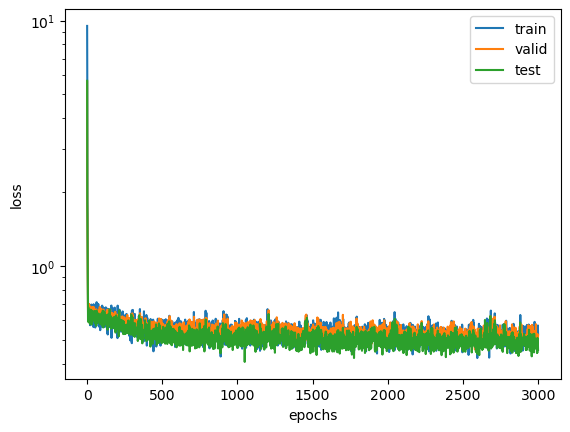

[I 2023-07-15 12:29:20,385] Trial 1 finished with value: 0.5204309739276277 and parameters: {'hidden_channels': 512, 'num_layers': 6, 'num_timesteps': 3, 'dropout': 0.10527396365346892, 'optimizer': 'AdamW', 'lr': 0.003965645453023375}. Best is trial 1 with value: 0.5204309739276277.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.568781 valid 2.176603 test 2.163303
Epoch: 020 Loss: train 0.677120 valid 0.672322 test 0.653992
Epoch: 040 Loss: train 0.683664 valid 0.659531 test 0.660543
Epoch: 060 Loss: train 0.616220 valid 0.633543 test 0.617920
Epoch: 080 Loss: train 0.609084 valid 0.685204 test 0.607822
Epoch: 100 Loss: train 0.711176 valid 0.675059 test 0.636866
Epoch: 120 Loss: train 0.607337 valid 0.721134 test 0.619653
Epoch: 140 Loss: train 0.611385 valid 0.671175 test 0.631471
Epoch: 160 Loss: train 0.642133 valid 0.695042 test 0.688333
Epoch: 180 Loss: train 0.578687 valid 0.708167 test 0.595995
Epoch: 200 Loss: train 0.694856 valid 0.686538 test 0.639127
Epoch: 220 Loss: train 0.821958 valid 0.833971 test 0.760763
Epoch: 240 Loss: train 0.689464 valid 0.651918 test 0.639660
Epoch: 260 Loss: train 0.639852 valid 0.652008 test 0.668204
Epoch: 280 Loss: train 0.731784 valid 0.676198 test 0.627445
Epoch: 300 Loss: train 0.666912 valid 0.653731 test 0.663740
Epoch: 320 Loss: train 0

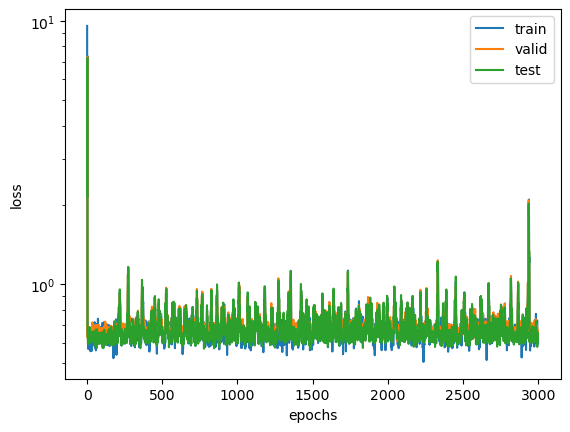

[I 2023-07-15 12:31:28,580] Trial 2 finished with value: 0.6420344640740357 and parameters: {'hidden_channels': 1024, 'num_layers': 3, 'num_timesteps': 2, 'dropout': 0.13735064439739625, 'optimizer': 'RMSprop', 'lr': 0.0013334789935861853}. Best is trial 1 with value: 0.5204309739276277.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.553517 valid 8.460568 test 8.552662
Epoch: 020 Loss: train 0.739840 valid 0.683069 test 0.745261
Epoch: 040 Loss: train 0.651666 valid 0.750158 test 0.729816
Epoch: 060 Loss: train 0.745375 valid 0.785426 test 0.670120
Epoch: 080 Loss: train 0.804965 valid 0.770187 test 0.796128
Epoch: 100 Loss: train 0.716163 valid 0.689975 test 0.668803
Epoch: 120 Loss: train 1.128811 valid 1.132503 test 1.006222
Epoch: 140 Loss: train 0.652141 valid 0.661207 test 0.651802
Epoch: 160 Loss: train 1.426560 valid 1.372129 test 1.240251
Epoch: 180 Loss: train 0.683933 valid 0.741258 test 0.650033
Epoch: 200 Loss: train 0.922461 valid 1.033264 test 0.946749
Epoch: 220 Loss: train 0.893875 valid 0.854655 test 0.794343
Epoch: 240 Loss: train 0.985278 valid 0.994378 test 0.938681
Epoch: 260 Loss: train 0.770478 valid 0.720477 test 0.674002
Epoch: 280 Loss: train 0.824346 valid 0.968612 test 0.838436
Epoch: 300 Loss: train 0.932846 valid 0.860164 test 0.777930
Epoch: 320 Loss: train 0

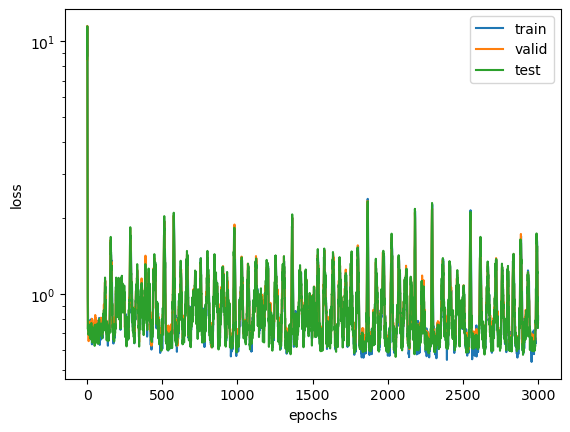

[I 2023-07-15 12:34:13,973] Trial 3 finished with value: 0.7463680914684386 and parameters: {'hidden_channels': 1024, 'num_layers': 4, 'num_timesteps': 5, 'dropout': 0.12595319905585423, 'optimizer': 'RMSprop', 'lr': 0.003776853694496682}. Best is trial 1 with value: 0.5204309739276277.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.508397 valid 22.862690 test 23.576512
Epoch: 020 Loss: train 2.178691 valid 2.004792 test 1.804994
Epoch: 040 Loss: train 2.747440 valid 2.674933 test 2.661039
Epoch: 060 Loss: train 1.425761 valid 1.533191 test 1.480307
Epoch: 080 Loss: train 1.563933 valid 1.709975 test 1.785745
Epoch: 100 Loss: train 4.102755 valid 3.887289 test 3.965634
Epoch: 120 Loss: train 1.267061 valid 1.200642 test 1.310745
Epoch: 140 Loss: train 2.854035 valid 3.539057 test 3.438133
Epoch: 160 Loss: train 1.306646 valid 1.267882 test 1.229261
Epoch: 180 Loss: train 2.081858 valid 2.261525 test 2.132187
Epoch: 200 Loss: train 2.153473 valid 2.010389 test 1.864490
Epoch: 220 Loss: train 1.727967 valid 1.679099 test 1.718862
Epoch: 240 Loss: train 3.517326 valid 3.752057 test 3.595593
Epoch: 260 Loss: train 1.611811 valid 1.617911 test 1.370863
Epoch: 280 Loss: train 1.999047 valid 2.247660 test 2.286991
Epoch: 300 Loss: train 2.046329 valid 1.872464 test 1.787340
Epoch: 320 Loss: train

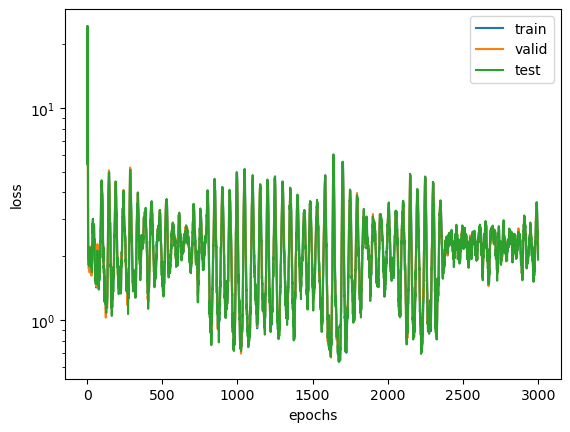

[I 2023-07-15 12:35:50,663] Trial 4 finished with value: 1.9709723517684585 and parameters: {'hidden_channels': 256, 'num_layers': 4, 'num_timesteps': 7, 'dropout': 0.15121051391367174, 'optimizer': 'RMSprop', 'lr': 0.04774357854994847}. Best is trial 1 with value: 0.5204309739276277.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.603943 valid 9.394451 test 9.470774
Epoch: 020 Loss: train 1.028621 valid 1.068008 test 1.001523
Epoch: 040 Loss: train 0.677693 valid 0.687648 test 0.656250
Epoch: 060 Loss: train 0.644636 valid 0.651910 test 0.626703
Epoch: 080 Loss: train 0.588491 valid 0.651475 test 0.624335
Epoch: 100 Loss: train 0.643772 valid 0.648371 test 0.589831
Epoch: 120 Loss: train 0.657528 valid 0.636387 test 0.574819
Epoch: 140 Loss: train 0.630363 valid 0.634807 test 0.630555
Epoch: 160 Loss: train 0.589518 valid 0.624258 test 0.590749
Epoch: 180 Loss: train 0.599184 valid 0.620114 test 0.611601
Epoch: 200 Loss: train 0.592539 valid 0.577169 test 0.594483
Epoch: 220 Loss: train 0.609395 valid 0.606747 test 0.574115
Epoch: 240 Loss: train 0.601326 valid 0.615446 test 0.565784
Epoch: 260 Loss: train 0.565388 valid 0.607669 test 0.565371
Epoch: 280 Loss: train 0.529236 valid 0.602939 test 0.533668
Epoch: 300 Loss: train 0.582010 valid 0.597483 test 0.548814
Epoch: 320 Loss: train 0

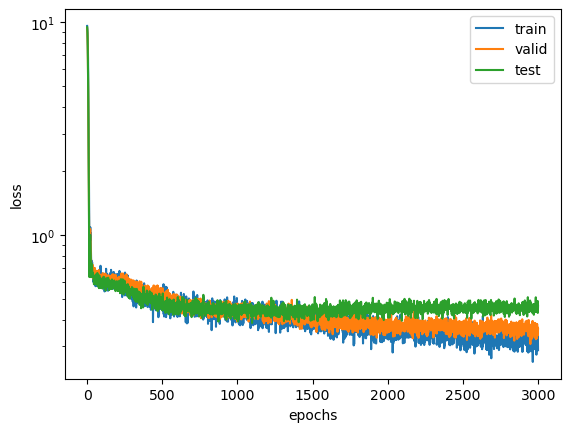

[I 2023-07-15 12:37:36,244] Trial 5 finished with value: 0.36912950455558197 and parameters: {'hidden_channels': 512, 'num_layers': 6, 'num_timesteps': 2, 'dropout': 0.15491229225734665, 'optimizer': 'AdamW', 'lr': 0.0001924679970739951}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.528507 valid 4.940308 test 4.988604
Epoch: 020 Loss: train 0.577160 valid 0.625442 test 0.610530
Epoch: 040 Loss: train 0.638141 valid 0.588249 test 0.603366
Epoch: 060 Loss: train 0.628465 valid 0.606862 test 0.563820
Epoch: 080 Loss: train 0.556111 valid 0.604372 test 0.592750
Epoch: 100 Loss: train 0.611697 valid 0.605882 test 0.599507
Epoch: 120 Loss: train 0.570643 valid 0.601747 test 0.556753
Epoch: 140 Loss: train 0.630026 valid 0.593384 test 0.571497
Epoch: 160 Loss: train 0.652363 valid 0.602361 test 0.576687
Epoch: 180 Loss: train 0.526295 valid 0.595090 test 0.560568
Epoch: 200 Loss: train 0.615383 valid 0.616845 test 0.571620
Epoch: 220 Loss: train 0.586431 valid 0.605794 test 0.561898
Epoch: 240 Loss: train 0.558733 valid 0.595554 test 0.550734
Epoch: 260 Loss: train 0.606695 valid 0.571742 test 0.545352
Epoch: 280 Loss: train 0.584877 valid 0.573180 test 0.527225
Epoch: 300 Loss: train 0.503791 valid 0.577676 test 0.540928
Epoch: 320 Loss: train 0

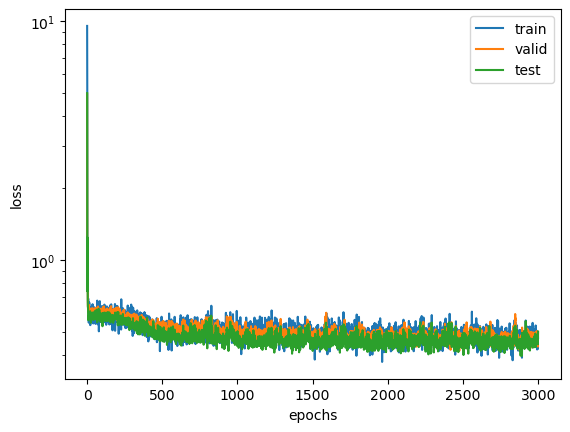

[I 2023-07-15 12:41:18,899] Trial 6 finished with value: 0.479825447336218 and parameters: {'hidden_channels': 1024, 'num_layers': 6, 'num_timesteps': 5, 'dropout': 0.055976474622965317, 'optimizer': 'AdamW', 'lr': 0.001741983176509947}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.508979 valid 8.612022 test 8.680737
Epoch: 020 Loss: train 0.695335 valid 0.683275 test 0.652945
Epoch: 040 Loss: train 0.640592 valid 0.711719 test 0.627361
Epoch: 060 Loss: train 0.627110 valid 0.661405 test 0.632083
Epoch: 080 Loss: train 0.626894 valid 0.692093 test 0.628865
Epoch: 100 Loss: train 0.704184 valid 0.632894 test 0.643604
Epoch: 120 Loss: train 0.687847 valid 0.624375 test 0.622606
Epoch: 140 Loss: train 0.611024 valid 0.653793 test 0.625381
Epoch: 160 Loss: train 0.613725 valid 0.618340 test 0.601050
Epoch: 180 Loss: train 0.616785 valid 0.606552 test 0.613580
Epoch: 200 Loss: train 0.686669 valid 0.618160 test 0.610304
Epoch: 220 Loss: train 0.631109 valid 0.593394 test 0.596053
Epoch: 240 Loss: train 0.611823 valid 0.644084 test 0.555052
Epoch: 260 Loss: train 0.609446 valid 0.591446 test 0.532717
Epoch: 280 Loss: train 0.583476 valid 0.585963 test 0.553447
Epoch: 300 Loss: train 0.613553 valid 0.619417 test 0.575546
Epoch: 320 Loss: train 0

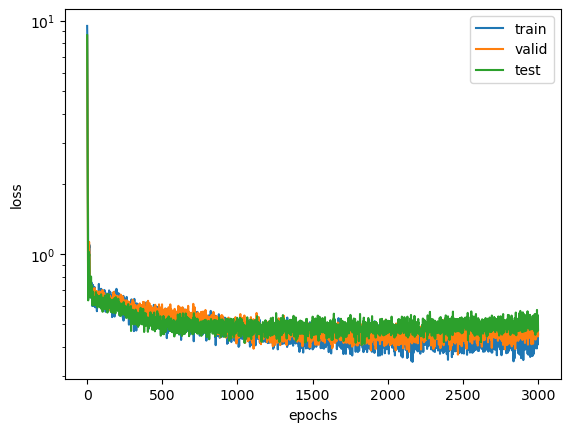

[I 2023-07-15 12:42:51,480] Trial 7 finished with value: 0.44488073038063186 and parameters: {'hidden_channels': 256, 'num_layers': 5, 'num_timesteps': 4, 'dropout': 0.12683182636217033, 'optimizer': 'AdamW', 'lr': 0.0020213361974676875}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.451609 valid 9.432479 test 9.512380
Epoch: 020 Loss: train 9.365635 valid 9.360307 test 9.438231
Epoch: 040 Loss: train 9.223699 valid 9.266857 test 9.345776
Epoch: 060 Loss: train 9.269000 valid 9.151599 test 9.226993
Epoch: 080 Loss: train 9.035010 valid 8.987676 test 9.050111
Epoch: 100 Loss: train 8.768749 valid 8.726351 test 8.796899
Epoch: 120 Loss: train 8.399004 valid 8.344468 test 8.429014
Epoch: 140 Loss: train 7.946106 valid 7.936222 test 7.977962
Epoch: 160 Loss: train 7.491006 valid 7.491270 test 7.572288
Epoch: 180 Loss: train 7.190967 valid 7.150411 test 7.206552
Epoch: 200 Loss: train 6.811448 valid 6.801387 test 6.831798
Epoch: 220 Loss: train 6.530636 valid 6.491204 test 6.569636
Epoch: 240 Loss: train 6.264920 valid 6.206680 test 6.327354
Epoch: 260 Loss: train 6.060558 valid 6.007445 test 6.124751
Epoch: 280 Loss: train 5.855309 valid 5.846289 test 5.874963
Epoch: 300 Loss: train 5.664412 valid 5.715278 test 5.703993
Epoch: 320 Loss: train 5

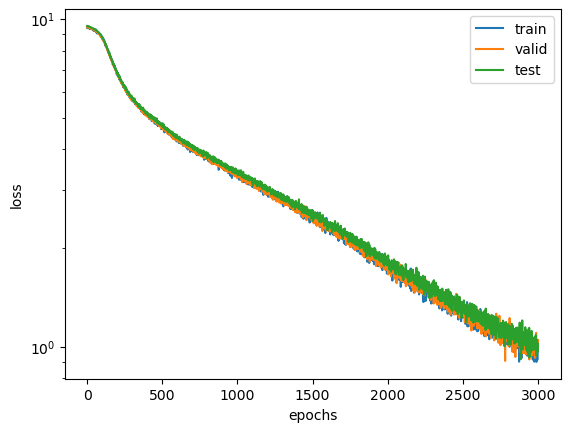

[I 2023-07-15 12:44:47,553] Trial 8 finished with value: 0.9438517912392694 and parameters: {'hidden_channels': 64, 'num_layers': 6, 'num_timesteps': 8, 'dropout': 0.16295445809556658, 'optimizer': 'Adam', 'lr': 3.834205332745776e-05}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.604621 valid 9.105080 test 9.184295
Epoch: 020 Loss: train 0.824579 valid 0.767054 test 0.692848
Epoch: 040 Loss: train 0.712773 valid 0.723273 test 0.662316
Epoch: 060 Loss: train 0.690639 valid 0.666908 test 0.628280
Epoch: 080 Loss: train 0.762151 valid 0.697536 test 0.674350
Epoch: 100 Loss: train 0.609864 valid 0.664327 test 0.629943
Epoch: 120 Loss: train 0.637900 valid 0.702175 test 0.606414
Epoch: 140 Loss: train 0.734419 valid 0.656521 test 0.690392
Epoch: 160 Loss: train 0.640432 valid 0.637248 test 0.600000
Epoch: 180 Loss: train 0.676562 valid 0.672215 test 0.652622
Epoch: 200 Loss: train 0.620298 valid 0.697627 test 0.628874
Epoch: 220 Loss: train 0.699612 valid 0.640244 test 0.633359
Epoch: 240 Loss: train 0.606869 valid 0.647896 test 0.673684
Epoch: 260 Loss: train 0.616364 valid 0.676470 test 0.586162
Epoch: 280 Loss: train 0.557875 valid 0.625388 test 0.584047
Epoch: 300 Loss: train 0.629663 valid 0.598943 test 0.583035
Epoch: 320 Loss: train 0

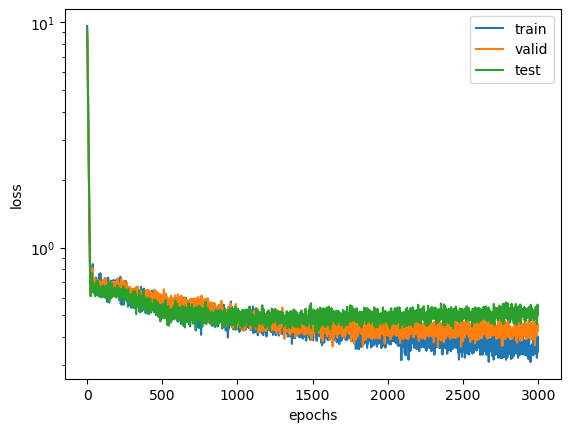

[I 2023-07-15 12:46:07,651] Trial 9 finished with value: 0.4396092214716303 and parameters: {'hidden_channels': 256, 'num_layers': 3, 'num_timesteps': 4, 'dropout': 0.14859416037995918, 'optimizer': 'Adam', 'lr': 0.0007120610641533164}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.581007 valid 9.497697 test 9.586584
Epoch: 020 Loss: train 8.751168 valid 8.725992 test 8.791992
Epoch: 040 Loss: train 7.838935 valid 7.751926 test 7.817831
Epoch: 060 Loss: train 6.431554 valid 6.399898 test 6.430672
Epoch: 080 Loss: train 4.963297 valid 4.830422 test 4.756172
Epoch: 100 Loss: train 3.475633 valid 3.328894 test 3.293626
Epoch: 120 Loss: train 2.270826 valid 2.308774 test 2.254871
Epoch: 140 Loss: train 1.765322 valid 1.646044 test 1.584953
Epoch: 160 Loss: train 1.272236 valid 1.234373 test 1.122147
Epoch: 180 Loss: train 1.120779 valid 1.023231 test 0.895727
Epoch: 200 Loss: train 0.792554 valid 0.948540 test 0.750956
Epoch: 220 Loss: train 0.740087 valid 0.773978 test 0.721061
Epoch: 240 Loss: train 0.702545 valid 0.745329 test 0.695171
Epoch: 260 Loss: train 0.774911 valid 0.723721 test 0.648523
Epoch: 280 Loss: train 0.700026 valid 0.701309 test 0.633361
Epoch: 300 Loss: train 0.752981 valid 0.727468 test 0.611630
Epoch: 320 Loss: train 0

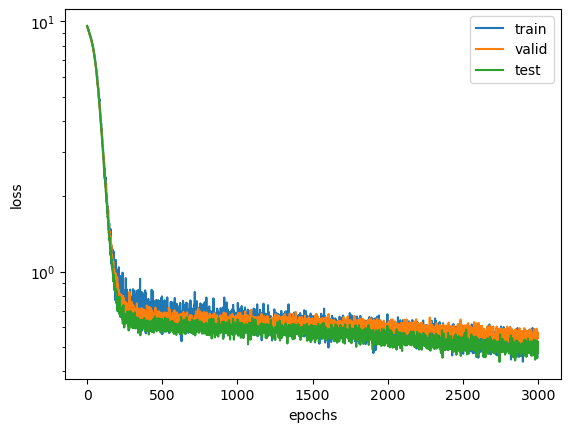

[I 2023-07-15 12:47:20,305] Trial 10 finished with value: 0.5428163029851949 and parameters: {'hidden_channels': 512, 'num_layers': 2, 'num_timesteps': 2, 'dropout': 0.17835157611961647, 'optimizer': 'AdamW', 'lr': 1.3163215917352637e-05}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.570785 valid 9.389407 test 9.459693
Epoch: 020 Loss: train 5.246053 valid 4.980591 test 4.948990
Epoch: 040 Loss: train 1.921292 valid 1.799383 test 1.885246
Epoch: 060 Loss: train 1.103915 valid 1.029390 test 1.103736
Epoch: 080 Loss: train 0.781726 valid 0.746697 test 0.744176
Epoch: 100 Loss: train 0.716353 valid 0.675732 test 0.629735
Epoch: 120 Loss: train 0.697824 valid 0.663501 test 0.692649
Epoch: 140 Loss: train 0.724382 valid 0.657495 test 0.633044
Epoch: 160 Loss: train 0.656817 valid 0.733079 test 0.639107
Epoch: 180 Loss: train 0.709058 valid 0.674714 test 0.637436
Epoch: 200 Loss: train 0.699549 valid 0.702938 test 0.683669
Epoch: 220 Loss: train 0.692014 valid 0.715789 test 0.600839
Epoch: 240 Loss: train 0.669600 valid 0.650732 test 0.664369
Epoch: 260 Loss: train 0.630655 valid 0.633423 test 0.623498
Epoch: 280 Loss: train 0.683248 valid 0.680156 test 0.668221
Epoch: 300 Loss: train 0.715142 valid 0.647491 test 0.602264
Epoch: 320 Loss: train 0

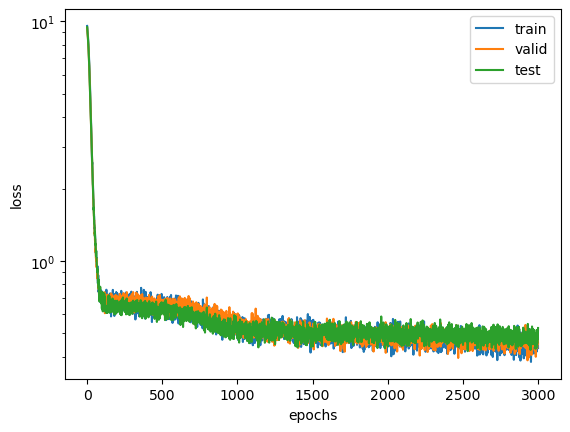

[I 2023-07-15 12:48:33,776] Trial 11 finished with value: 0.49139504778847853 and parameters: {'hidden_channels': 256, 'num_layers': 2, 'num_timesteps': 4, 'dropout': 0.19125621435242462, 'optimizer': 'Adam', 'lr': 0.0001685919059152782}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.601337 valid 9.631932 test 9.716788
Epoch: 020 Loss: train 8.868911 valid 8.750357 test 8.841444
Epoch: 040 Loss: train 7.118729 valid 7.092775 test 7.091514
Epoch: 060 Loss: train 5.645714 valid 5.626507 test 5.634200
Epoch: 080 Loss: train 4.776761 valid 4.738011 test 4.813095
Epoch: 100 Loss: train 4.290604 valid 4.284463 test 4.352524
Epoch: 120 Loss: train 3.880280 valid 3.780889 test 3.924325
Epoch: 140 Loss: train 3.503148 valid 3.552471 test 3.592766
Epoch: 160 Loss: train 3.292273 valid 3.213495 test 3.298544
Epoch: 180 Loss: train 3.052750 valid 2.930083 test 3.041275
Epoch: 200 Loss: train 2.741294 valid 2.676287 test 2.808392
Epoch: 220 Loss: train 2.527266 valid 2.539210 test 2.579137
Epoch: 240 Loss: train 2.276250 valid 2.348104 test 2.429032
Epoch: 260 Loss: train 2.095714 valid 2.182671 test 2.155372
Epoch: 280 Loss: train 1.920691 valid 1.984355 test 2.026640
Epoch: 300 Loss: train 1.830241 valid 1.794221 test 1.834215
Epoch: 320 Loss: train 1

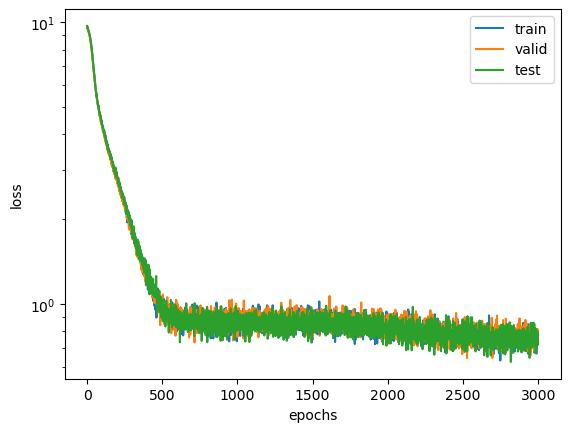

[I 2023-07-15 12:50:04,993] Trial 12 finished with value: 0.7390021060719757 and parameters: {'hidden_channels': 64, 'num_layers': 3, 'num_timesteps': 6, 'dropout': 0.19990198512548474, 'optimizer': 'Adam', 'lr': 0.0002767234207306835}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.661694 valid 9.304474 test 9.382084
Epoch: 020 Loss: train 0.662882 valid 0.754458 test 0.732206
Epoch: 040 Loss: train 0.609250 valid 0.675432 test 0.656749
Epoch: 060 Loss: train 0.592117 valid 0.686313 test 0.632523
Epoch: 080 Loss: train 0.652880 valid 0.612978 test 0.599163
Epoch: 100 Loss: train 0.618743 valid 0.621815 test 0.596558
Epoch: 120 Loss: train 0.633701 valid 0.639407 test 0.602546
Epoch: 140 Loss: train 0.608076 valid 0.658385 test 0.590611
Epoch: 160 Loss: train 0.628917 valid 0.632754 test 0.587835
Epoch: 180 Loss: train 0.570940 valid 0.616730 test 0.587864
Epoch: 200 Loss: train 0.581603 valid 0.624638 test 0.577647
Epoch: 220 Loss: train 0.560279 valid 0.590844 test 0.570848
Epoch: 240 Loss: train 0.623024 valid 0.635240 test 0.588631
Epoch: 260 Loss: train 0.586485 valid 0.603212 test 0.578814
Epoch: 280 Loss: train 0.534048 valid 0.587810 test 0.540227
Epoch: 300 Loss: train 0.607575 valid 0.594371 test 0.556373
Epoch: 320 Loss: train 0

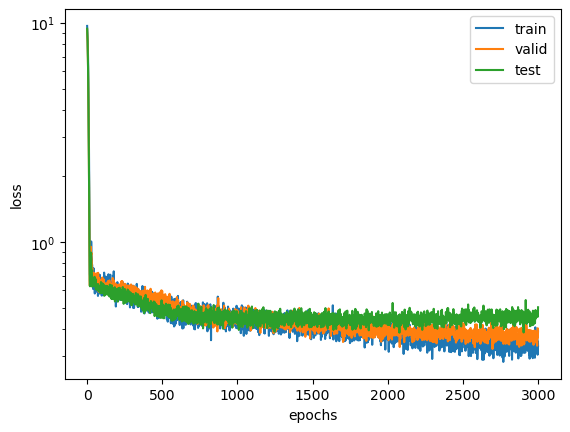

[I 2023-07-15 12:51:25,718] Trial 13 finished with value: 0.3905081665462708 and parameters: {'hidden_channels': 512, 'num_layers': 3, 'num_timesteps': 3, 'dropout': 0.1677019989490152, 'optimizer': 'Adam', 'lr': 0.00017699639664952698}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.492053 valid 9.388345 test 9.466115
Epoch: 020 Loss: train 3.030797 valid 2.652504 test 2.689725
Epoch: 040 Loss: train 0.759163 valid 0.714773 test 0.662275
Epoch: 060 Loss: train 0.608286 valid 0.650192 test 0.665966
Epoch: 080 Loss: train 0.697586 valid 0.630525 test 0.615623
Epoch: 100 Loss: train 0.668655 valid 0.641925 test 0.622294
Epoch: 120 Loss: train 0.614073 valid 0.592020 test 0.591793
Epoch: 140 Loss: train 0.607885 valid 0.631034 test 0.600609
Epoch: 160 Loss: train 0.627231 valid 0.645896 test 0.559333
Epoch: 180 Loss: train 0.610004 valid 0.616550 test 0.626787
Epoch: 200 Loss: train 0.586717 valid 0.595710 test 0.595561
Epoch: 220 Loss: train 0.656857 valid 0.652612 test 0.604444
Epoch: 240 Loss: train 0.664865 valid 0.664380 test 0.577778
Epoch: 260 Loss: train 0.633497 valid 0.626728 test 0.578822
Epoch: 280 Loss: train 0.663449 valid 0.620305 test 0.604544
Epoch: 300 Loss: train 0.551048 valid 0.614947 test 0.562020
Epoch: 320 Loss: train 0

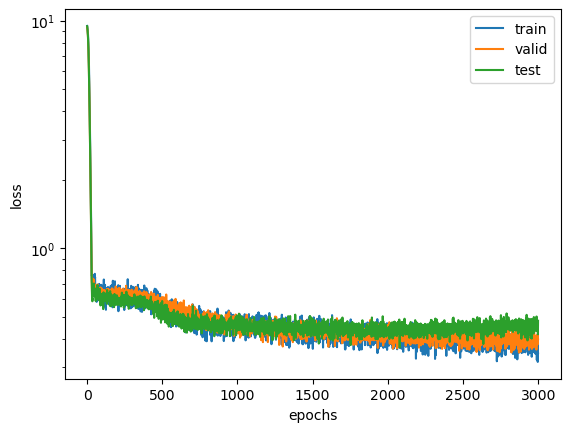

[I 2023-07-15 12:52:59,649] Trial 14 finished with value: 0.37451359628878844 and parameters: {'hidden_channels': 512, 'num_layers': 5, 'num_timesteps': 2, 'dropout': 0.17416366318002302, 'optimizer': 'AdamW', 'lr': 8.911939783437253e-05}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.499614 valid 9.501057 test 9.578520
Epoch: 020 Loss: train 6.331713 valid 5.950764 test 5.960008
Epoch: 040 Loss: train 1.460892 valid 1.303725 test 1.289501
Epoch: 060 Loss: train 0.685196 valid 0.642952 test 0.649754
Epoch: 080 Loss: train 0.645554 valid 0.652491 test 0.589975
Epoch: 100 Loss: train 0.734430 valid 0.633660 test 0.570493
Epoch: 120 Loss: train 0.649393 valid 0.698422 test 0.618847
Epoch: 140 Loss: train 0.637580 valid 0.637487 test 0.582317
Epoch: 160 Loss: train 0.584243 valid 0.649236 test 0.589919
Epoch: 180 Loss: train 0.645836 valid 0.628237 test 0.601099
Epoch: 200 Loss: train 0.601550 valid 0.578621 test 0.611294
Epoch: 220 Loss: train 0.694149 valid 0.639221 test 0.603682
Epoch: 240 Loss: train 0.639414 valid 0.632915 test 0.611694
Epoch: 260 Loss: train 0.619312 valid 0.638635 test 0.610976
Epoch: 280 Loss: train 0.605406 valid 0.631561 test 0.572866
Epoch: 300 Loss: train 0.648216 valid 0.668953 test 0.569856
Epoch: 320 Loss: train 0

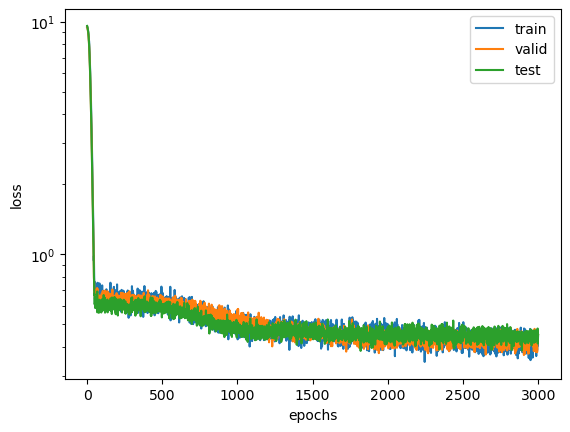

[I 2023-07-15 12:54:33,341] Trial 15 finished with value: 0.4385372526317068 and parameters: {'hidden_channels': 512, 'num_layers': 5, 'num_timesteps': 2, 'dropout': 0.1810051957799852, 'optimizer': 'AdamW', 'lr': 5.2145242745475315e-05}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.529672 valid 9.472235 test 9.551391
Epoch: 020 Loss: train 6.400314 valid 6.027828 test 6.046258
Epoch: 040 Loss: train 1.504450 valid 1.393723 test 1.380381
Epoch: 060 Loss: train 0.712193 valid 0.652528 test 0.597079
Epoch: 080 Loss: train 0.680531 valid 0.663064 test 0.554327
Epoch: 100 Loss: train 0.598408 valid 0.630630 test 0.593728
Epoch: 120 Loss: train 0.575188 valid 0.660350 test 0.585001
Epoch: 140 Loss: train 0.629105 valid 0.621913 test 0.614981
Epoch: 160 Loss: train 0.657599 valid 0.618329 test 0.584141
Epoch: 180 Loss: train 0.646266 valid 0.621803 test 0.624001
Epoch: 200 Loss: train 0.668540 valid 0.685677 test 0.572108
Epoch: 220 Loss: train 0.726062 valid 0.624333 test 0.643278
Epoch: 240 Loss: train 0.620881 valid 0.654765 test 0.604356
Epoch: 260 Loss: train 0.602002 valid 0.614066 test 0.574163
Epoch: 280 Loss: train 0.624596 valid 0.605767 test 0.604048
Epoch: 300 Loss: train 0.640296 valid 0.599831 test 0.569431
Epoch: 320 Loss: train 0

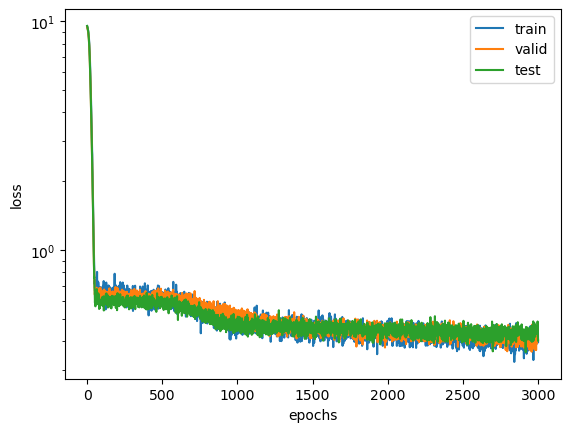

[I 2023-07-15 12:56:09,186] Trial 16 finished with value: 0.4082115219561425 and parameters: {'hidden_channels': 512, 'num_layers': 5, 'num_timesteps': 2, 'dropout': 0.17190147271790554, 'optimizer': 'AdamW', 'lr': 5.483695072297209e-05}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.515655 valid 9.466942 test 9.545393
Epoch: 020 Loss: train 9.170261 valid 9.176119 test 9.257485
Epoch: 040 Loss: train 8.581754 valid 8.447222 test 8.504999
Epoch: 060 Loss: train 6.532338 valid 6.375578 test 6.404231
Epoch: 080 Loss: train 4.000606 valid 3.908714 test 3.845781
Epoch: 100 Loss: train 2.228883 valid 2.257789 test 2.208463
Epoch: 120 Loss: train 1.394360 valid 1.337879 test 1.341152
Epoch: 140 Loss: train 0.950834 valid 0.901604 test 0.867503
Epoch: 160 Loss: train 0.793634 valid 0.781517 test 0.750347
Epoch: 180 Loss: train 0.681282 valid 0.706647 test 0.663880
Epoch: 200 Loss: train 0.674076 valid 0.661799 test 0.634891
Epoch: 220 Loss: train 0.671943 valid 0.652326 test 0.593159
Epoch: 240 Loss: train 0.659273 valid 0.669099 test 0.603226
Epoch: 260 Loss: train 0.615184 valid 0.676176 test 0.633247
Epoch: 280 Loss: train 0.722362 valid 0.673168 test 0.613083
Epoch: 300 Loss: train 0.638218 valid 0.672983 test 0.616799
Epoch: 320 Loss: train 0

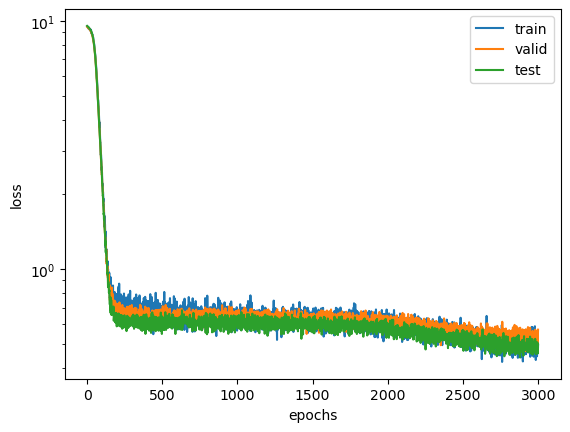

[I 2023-07-15 12:57:58,198] Trial 17 finished with value: 0.5681576456549536 and parameters: {'hidden_channels': 512, 'num_layers': 6, 'num_timesteps': 3, 'dropout': 0.18811421906682643, 'optimizer': 'AdamW', 'lr': 1.365730875960454e-05}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.575964 valid 9.198627 test 9.269263
Epoch: 020 Loss: train 0.800013 valid 0.746314 test 0.739100
Epoch: 040 Loss: train 0.710160 valid 0.686960 test 0.651438
Epoch: 060 Loss: train 0.639370 valid 0.635301 test 0.624571
Epoch: 080 Loss: train 0.696741 valid 0.651406 test 0.632990
Epoch: 100 Loss: train 0.647974 valid 0.637827 test 0.629408
Epoch: 120 Loss: train 0.560834 valid 0.649713 test 0.604188
Epoch: 140 Loss: train 0.593312 valid 0.615271 test 0.612548
Epoch: 160 Loss: train 0.626138 valid 0.635560 test 0.595265
Epoch: 180 Loss: train 0.626185 valid 0.614828 test 0.579068
Epoch: 200 Loss: train 0.529630 valid 0.620907 test 0.552597
Epoch: 220 Loss: train 0.652218 valid 0.614876 test 0.534995
Epoch: 240 Loss: train 0.576277 valid 0.634561 test 0.563169
Epoch: 260 Loss: train 0.628718 valid 0.576720 test 0.545690
Epoch: 280 Loss: train 0.589554 valid 0.595442 test 0.538692
Epoch: 300 Loss: train 0.565953 valid 0.546913 test 0.495875
Epoch: 320 Loss: train 0

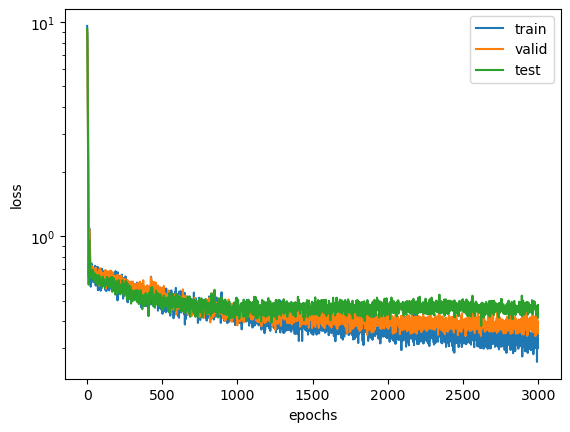

[I 2023-07-15 12:59:47,628] Trial 18 finished with value: 0.4050799715837224 and parameters: {'hidden_channels': 512, 'num_layers': 5, 'num_timesteps': 6, 'dropout': 0.198932175556804, 'optimizer': 'AdamW', 'lr': 0.0003481704023248994}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.642279 valid 9.654858 test 9.729122
Epoch: 020 Loss: train 9.497740 valid 9.447606 test 9.520585
Epoch: 040 Loss: train 9.090371 valid 9.067175 test 9.142277
Epoch: 060 Loss: train 8.470017 valid 8.401431 test 8.445051
Epoch: 080 Loss: train 7.587027 valid 7.530489 test 7.560418
Epoch: 100 Loss: train 6.823262 valid 6.699310 test 6.817228
Epoch: 120 Loss: train 6.210995 valid 6.177588 test 6.245942
Epoch: 140 Loss: train 5.726160 valid 5.743567 test 5.798731
Epoch: 160 Loss: train 5.441281 valid 5.426155 test 5.475553
Epoch: 180 Loss: train 5.166256 valid 5.140654 test 5.192674
Epoch: 200 Loss: train 4.978352 valid 4.901894 test 5.057435
Epoch: 220 Loss: train 4.754313 valid 4.732177 test 4.864022
Epoch: 240 Loss: train 4.535367 valid 4.580175 test 4.637508
Epoch: 260 Loss: train 4.411277 valid 4.451228 test 4.493700
Epoch: 280 Loss: train 4.372236 valid 4.304133 test 4.434294
Epoch: 300 Loss: train 4.216664 valid 4.182381 test 4.275288
Epoch: 320 Loss: train 4

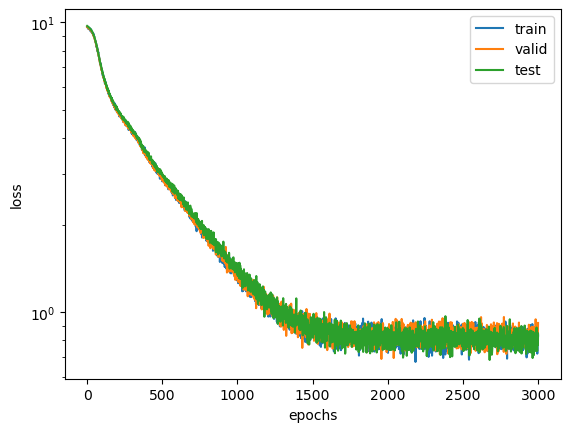

[I 2023-07-15 13:01:30,662] Trial 19 finished with value: 0.8525072782731808 and parameters: {'hidden_channels': 64, 'num_layers': 6, 'num_timesteps': 4, 'dropout': 0.16537135331083067, 'optimizer': 'AdamW', 'lr': 0.00010085749426862477}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.530594 valid 8.764193 test 8.831773
Epoch: 020 Loss: train 0.599839 valid 0.674640 test 0.658233
Epoch: 040 Loss: train 0.593766 valid 0.642839 test 0.597218
Epoch: 060 Loss: train 0.638966 valid 0.641589 test 0.622148
Epoch: 080 Loss: train 0.583094 valid 0.646173 test 0.594681
Epoch: 100 Loss: train 0.574007 valid 0.628576 test 0.590840
Epoch: 120 Loss: train 0.619785 valid 0.618538 test 0.602576
Epoch: 140 Loss: train 0.601286 valid 0.594716 test 0.587030
Epoch: 160 Loss: train 0.626974 valid 0.603753 test 0.576537
Epoch: 180 Loss: train 0.562613 valid 0.563501 test 0.514285
Epoch: 200 Loss: train 0.549809 valid 0.574943 test 0.546410
Epoch: 220 Loss: train 0.557393 valid 0.546112 test 0.525643
Epoch: 240 Loss: train 0.598277 valid 0.544789 test 0.505466
Epoch: 260 Loss: train 0.557666 valid 0.517525 test 0.467612
Epoch: 280 Loss: train 0.475582 valid 0.534697 test 0.487406
Epoch: 300 Loss: train 0.457547 valid 0.549726 test 0.465500
Epoch: 320 Loss: train 0

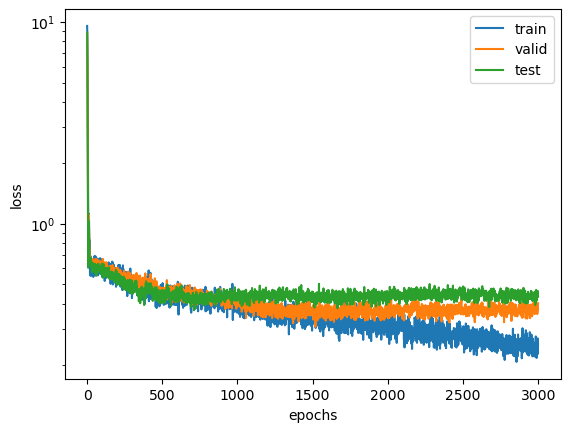

[I 2023-07-15 13:02:57,796] Trial 20 finished with value: 0.39372603240605003 and parameters: {'hidden_channels': 512, 'num_layers': 4, 'num_timesteps': 2, 'dropout': 0.11150749147464088, 'optimizer': 'AdamW', 'lr': 0.0004674007663237781}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.576804 valid 9.323123 test 9.401396
Epoch: 020 Loss: train 0.752249 valid 0.683153 test 0.659691
Epoch: 040 Loss: train 0.662010 valid 0.639120 test 0.603169
Epoch: 060 Loss: train 0.620034 valid 0.697978 test 0.634115
Epoch: 080 Loss: train 0.605337 valid 0.629463 test 0.635972
Epoch: 100 Loss: train 0.597943 valid 0.634828 test 0.606900
Epoch: 120 Loss: train 0.652358 valid 0.625149 test 0.605407
Epoch: 140 Loss: train 0.640943 valid 0.647816 test 0.627101
Epoch: 160 Loss: train 0.605211 valid 0.667276 test 0.610485
Epoch: 180 Loss: train 0.568130 valid 0.658756 test 0.581906
Epoch: 200 Loss: train 0.647464 valid 0.654983 test 0.594755
Epoch: 220 Loss: train 0.671608 valid 0.629715 test 0.558380
Epoch: 240 Loss: train 0.618024 valid 0.627235 test 0.555302
Epoch: 260 Loss: train 0.611360 valid 0.639612 test 0.561567
Epoch: 280 Loss: train 0.599622 valid 0.605998 test 0.565511
Epoch: 300 Loss: train 0.592784 valid 0.608504 test 0.581924
Epoch: 320 Loss: train 0

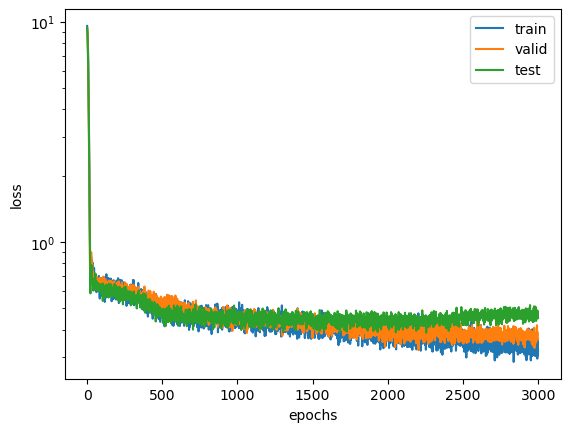

[I 2023-07-15 13:04:27,954] Trial 21 finished with value: 0.3896581388010369 and parameters: {'hidden_channels': 512, 'num_layers': 4, 'num_timesteps': 3, 'dropout': 0.16372819226561994, 'optimizer': 'Adam', 'lr': 0.00014588398123171245}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.489303 valid 9.378229 test 9.454554
Epoch: 020 Loss: train 2.054768 valid 1.707957 test 1.745937
Epoch: 040 Loss: train 0.853468 valid 0.778561 test 0.712596
Epoch: 060 Loss: train 0.690242 valid 0.691675 test 0.639192
Epoch: 080 Loss: train 0.571418 valid 0.645487 test 0.570414
Epoch: 100 Loss: train 0.592919 valid 0.679963 test 0.601256
Epoch: 120 Loss: train 0.601680 valid 0.645063 test 0.619077
Epoch: 140 Loss: train 0.687263 valid 0.652172 test 0.605721
Epoch: 160 Loss: train 0.602480 valid 0.629152 test 0.558505
Epoch: 180 Loss: train 0.612607 valid 0.633325 test 0.567166
Epoch: 200 Loss: train 0.623399 valid 0.629882 test 0.588397
Epoch: 220 Loss: train 0.552737 valid 0.628713 test 0.571136
Epoch: 240 Loss: train 0.616105 valid 0.622599 test 0.578298
Epoch: 260 Loss: train 0.631629 valid 0.545368 test 0.585671
Epoch: 280 Loss: train 0.628030 valid 0.607547 test 0.592205
Epoch: 300 Loss: train 0.603392 valid 0.595063 test 0.572448
Epoch: 320 Loss: train 0

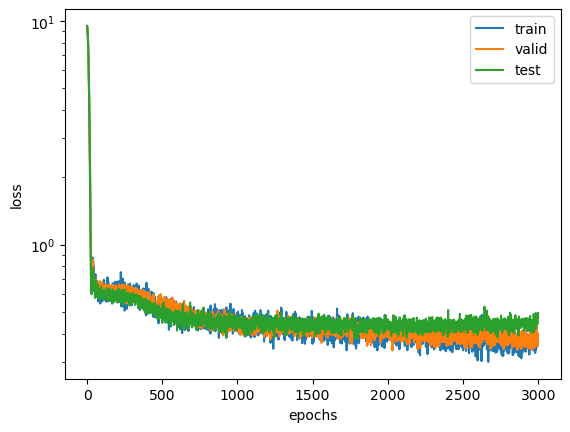

[I 2023-07-15 13:05:56,919] Trial 22 finished with value: 0.37690563952663686 and parameters: {'hidden_channels': 512, 'num_layers': 4, 'num_timesteps': 3, 'dropout': 0.1601845864188093, 'optimizer': 'Adam', 'lr': 0.0001076602624571153}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.603805 valid 9.557700 test 9.632199
Epoch: 020 Loss: train 8.364527 valid 8.293008 test 8.375057
Epoch: 040 Loss: train 4.678109 valid 4.393704 test 4.433137
Epoch: 060 Loss: train 1.632398 valid 1.483811 test 1.431583
Epoch: 080 Loss: train 0.705859 valid 0.689945 test 0.651140
Epoch: 100 Loss: train 0.623712 valid 0.667576 test 0.610772
Epoch: 120 Loss: train 0.676418 valid 0.652671 test 0.614295
Epoch: 140 Loss: train 0.661830 valid 0.691117 test 0.626063
Epoch: 160 Loss: train 0.633090 valid 0.645703 test 0.591515
Epoch: 180 Loss: train 0.653519 valid 0.671340 test 0.579977
Epoch: 200 Loss: train 0.600265 valid 0.689555 test 0.604528
Epoch: 220 Loss: train 0.553369 valid 0.682141 test 0.638258
Epoch: 240 Loss: train 0.533229 valid 0.636578 test 0.630795
Epoch: 260 Loss: train 0.700685 valid 0.682857 test 0.601716
Epoch: 280 Loss: train 0.634674 valid 0.633790 test 0.623964
Epoch: 300 Loss: train 0.608147 valid 0.624920 test 0.603332
Epoch: 320 Loss: train 0

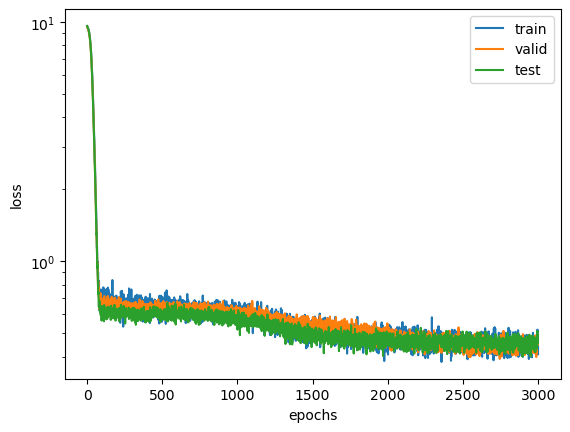

[I 2023-07-15 13:07:30,684] Trial 23 finished with value: 0.4986072160011389 and parameters: {'hidden_channels': 512, 'num_layers': 5, 'num_timesteps': 2, 'dropout': 0.1797350632422345, 'optimizer': 'Adam', 'lr': 3.04656321336086e-05}. Best is trial 5 with value: 0.36912950455558197.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.438153 valid 9.322808 test 9.399823
Epoch: 020 Loss: train 2.225495 valid 1.894242 test 1.908448
Epoch: 040 Loss: train 0.836421 valid 0.874585 test 0.758520
Epoch: 060 Loss: train 0.637853 valid 0.600200 test 0.656289
Epoch: 080 Loss: train 0.705675 valid 0.646525 test 0.610765
Epoch: 100 Loss: train 0.643550 valid 0.647966 test 0.611050
Epoch: 120 Loss: train 0.650270 valid 0.617314 test 0.592754
Epoch: 140 Loss: train 0.650322 valid 0.628766 test 0.592783
Epoch: 160 Loss: train 0.584295 valid 0.626750 test 0.562291
Epoch: 180 Loss: train 0.637072 valid 0.600237 test 0.573735
Epoch: 200 Loss: train 0.645580 valid 0.600437 test 0.607043
Epoch: 220 Loss: train 0.612876 valid 0.628411 test 0.586361
Epoch: 240 Loss: train 0.630493 valid 0.610064 test 0.581343
Epoch: 260 Loss: train 0.603920 valid 0.602404 test 0.587036
Epoch: 280 Loss: train 0.607123 valid 0.630544 test 0.602478
Epoch: 300 Loss: train 0.547688 valid 0.632826 test 0.594353
Epoch: 320 Loss: train 0

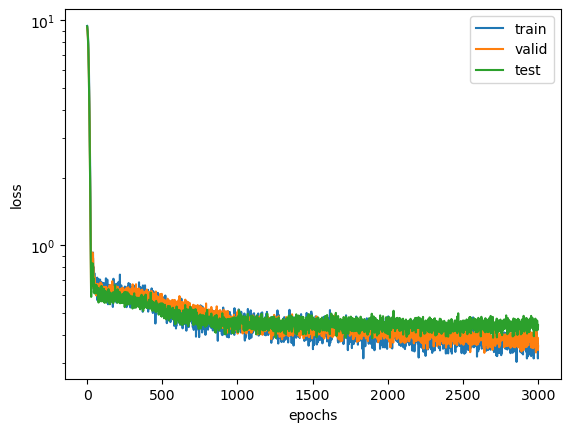

[I 2023-07-15 13:08:59,699] Trial 24 finished with value: 0.3633882193591766 and parameters: {'hidden_channels': 512, 'num_layers': 4, 'num_timesteps': 3, 'dropout': 0.15584704061929172, 'optimizer': 'AdamW', 'lr': 9.145071469436036e-05}. Best is trial 24 with value: 0.3633882193591766.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.527691 valid 9.457721 test 9.534230
Epoch: 020 Loss: train 4.260651 valid 3.837340 test 3.839505
Epoch: 040 Loss: train 0.700381 valid 0.669857 test 0.647384
Epoch: 060 Loss: train 0.694462 valid 0.625026 test 0.584645
Epoch: 080 Loss: train 0.656506 valid 0.645400 test 0.610989
Epoch: 100 Loss: train 0.621566 valid 0.638533 test 0.614209
Epoch: 120 Loss: train 0.660459 valid 0.643124 test 0.601432
Epoch: 140 Loss: train 0.597086 valid 0.613539 test 0.618518
Epoch: 160 Loss: train 0.690983 valid 0.598315 test 0.578349
Epoch: 180 Loss: train 0.625319 valid 0.599240 test 0.570871
Epoch: 200 Loss: train 0.641953 valid 0.629695 test 0.592878
Epoch: 220 Loss: train 0.690126 valid 0.603414 test 0.576011
Epoch: 240 Loss: train 0.598092 valid 0.640695 test 0.582206
Epoch: 260 Loss: train 0.598706 valid 0.585416 test 0.589918
Epoch: 280 Loss: train 0.601732 valid 0.619304 test 0.598908
Epoch: 300 Loss: train 0.598851 valid 0.610688 test 0.601674
Epoch: 320 Loss: train 0

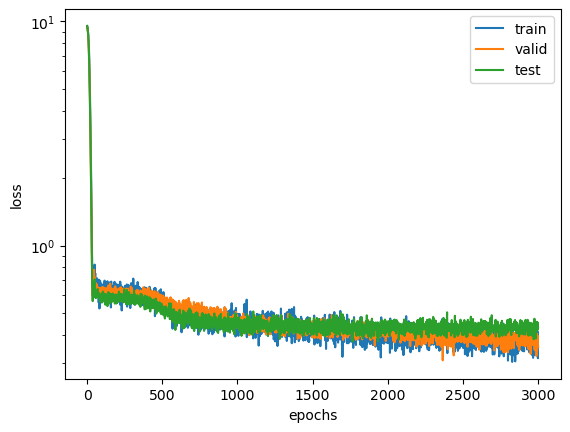

[I 2023-07-15 13:10:36,077] Trial 25 finished with value: 0.37548144850793336 and parameters: {'hidden_channels': 512, 'num_layers': 5, 'num_timesteps': 2, 'dropout': 0.13798091117443717, 'optimizer': 'AdamW', 'lr': 7.469211509208267e-05}. Best is trial 24 with value: 0.3633882193591766.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.522730 valid 9.496439 test 9.576994
Epoch: 020 Loss: train 8.790593 valid 8.656806 test 8.724561
Epoch: 040 Loss: train 5.505720 valid 5.244706 test 5.216674
Epoch: 060 Loss: train 2.026809 valid 2.014806 test 2.013846
Epoch: 080 Loss: train 0.875757 valid 0.826805 test 0.834496
Epoch: 100 Loss: train 0.702935 valid 0.675433 test 0.606126
Epoch: 120 Loss: train 0.669500 valid 0.671531 test 0.599861
Epoch: 140 Loss: train 0.666759 valid 0.643929 test 0.620553
Epoch: 160 Loss: train 0.624255 valid 0.627923 test 0.616333
Epoch: 180 Loss: train 0.662178 valid 0.686307 test 0.569057
Epoch: 200 Loss: train 0.626457 valid 0.657602 test 0.600664
Epoch: 220 Loss: train 0.665311 valid 0.681924 test 0.580573
Epoch: 240 Loss: train 0.657938 valid 0.624397 test 0.617862
Epoch: 260 Loss: train 0.678267 valid 0.655733 test 0.636521
Epoch: 280 Loss: train 0.584544 valid 0.631082 test 0.625077
Epoch: 300 Loss: train 0.622301 valid 0.674713 test 0.561878
Epoch: 320 Loss: train 0

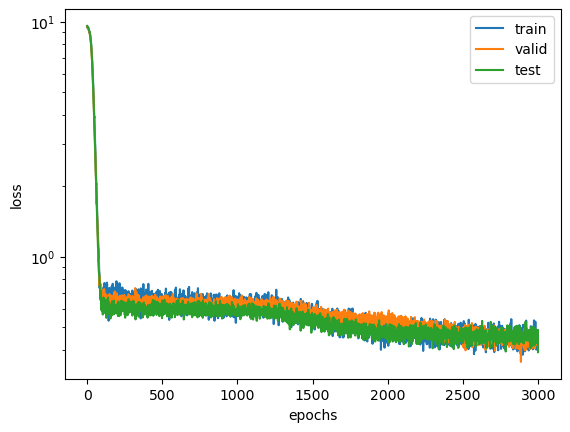

[I 2023-07-15 13:12:22,633] Trial 26 finished with value: 0.4293740236012001 and parameters: {'hidden_channels': 512, 'num_layers': 6, 'num_timesteps': 3, 'dropout': 0.1753344966362769, 'optimizer': 'AdamW', 'lr': 2.521103630555202e-05}. Best is trial 24 with value: 0.3633882193591766.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.475473 valid 8.577466 test 8.650874
Epoch: 020 Loss: train 0.671189 valid 0.728714 test 0.646310
Epoch: 040 Loss: train 0.632256 valid 0.653147 test 0.624890
Epoch: 060 Loss: train 0.642804 valid 0.640644 test 0.601929
Epoch: 080 Loss: train 0.570207 valid 0.595371 test 0.589993
Epoch: 100 Loss: train 0.598720 valid 0.622107 test 0.597496
Epoch: 120 Loss: train 0.608844 valid 0.608044 test 0.580610
Epoch: 140 Loss: train 0.666773 valid 0.602537 test 0.573135
Epoch: 160 Loss: train 0.644543 valid 0.588302 test 0.577256
Epoch: 180 Loss: train 0.601207 valid 0.612218 test 0.576317
Epoch: 200 Loss: train 0.543268 valid 0.629409 test 0.565480
Epoch: 220 Loss: train 0.486253 valid 0.581172 test 0.549170
Epoch: 240 Loss: train 0.583803 valid 0.618508 test 0.551973
Epoch: 260 Loss: train 0.580333 valid 0.581416 test 0.535465
Epoch: 280 Loss: train 0.539216 valid 0.577367 test 0.569833
Epoch: 300 Loss: train 0.553984 valid 0.582961 test 0.497579
Epoch: 320 Loss: train 0

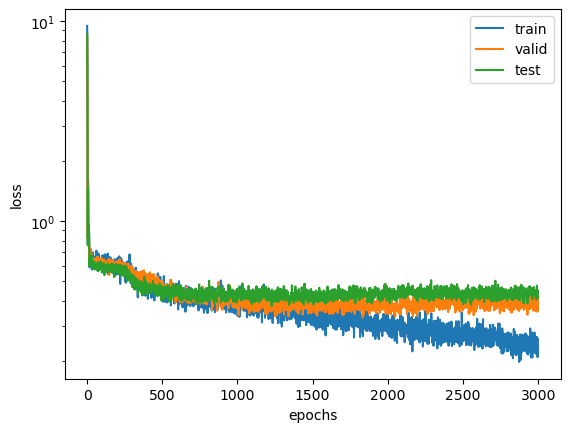

[I 2023-07-15 13:15:11,948] Trial 27 finished with value: 0.38531845520949437 and parameters: {'hidden_channels': 1024, 'num_layers': 4, 'num_timesteps': 4, 'dropout': 0.15733427391415553, 'optimizer': 'AdamW', 'lr': 0.0002505392320371234}. Best is trial 24 with value: 0.3633882193591766.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.563171 valid 9.542762 test 9.633862
Epoch: 020 Loss: train 9.390656 valid 9.346528 test 9.433766
Epoch: 040 Loss: train 9.049922 valid 9.103324 test 9.180785
Epoch: 060 Loss: train 8.848800 valid 8.748603 test 8.808504
Epoch: 080 Loss: train 8.220485 valid 8.261649 test 8.328976
Epoch: 100 Loss: train 7.755167 valid 7.697215 test 7.760680
Epoch: 120 Loss: train 7.158851 valid 7.154108 test 7.212573
Epoch: 140 Loss: train 6.646713 valid 6.646879 test 6.682172
Epoch: 160 Loss: train 6.227215 valid 6.197495 test 6.269972
Epoch: 180 Loss: train 5.892903 valid 5.832829 test 6.008566
Epoch: 200 Loss: train 5.650578 valid 5.641958 test 5.682327
Epoch: 220 Loss: train 5.442484 valid 5.397605 test 5.511434
Epoch: 240 Loss: train 5.205595 valid 5.178400 test 5.278366
Epoch: 260 Loss: train 5.076727 valid 5.040629 test 5.164632
Epoch: 280 Loss: train 4.961571 valid 4.913092 test 4.965105
Epoch: 300 Loss: train 4.807202 valid 4.785447 test 4.786221
Epoch: 320 Loss: train 4

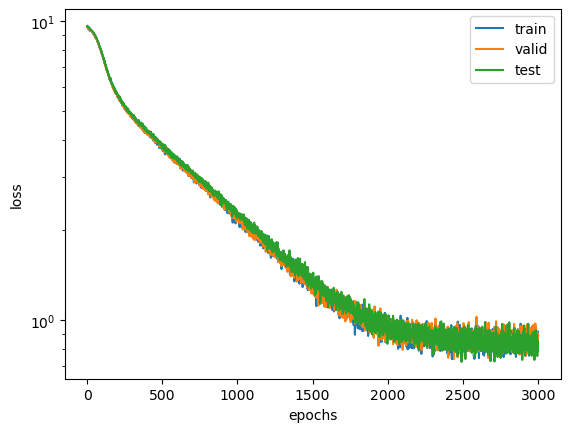

[I 2023-07-15 13:16:46,558] Trial 28 finished with value: 0.9266244373437921 and parameters: {'hidden_channels': 64, 'num_layers': 5, 'num_timesteps': 2, 'dropout': 0.18916596870470312, 'optimizer': 'AdamW', 'lr': 7.058430897782679e-05}. Best is trial 24 with value: 0.3633882193591766.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.507311 valid 5.844028 test 5.917399
Epoch: 020 Loss: train 0.630257 valid 0.729900 test 0.684221
Epoch: 040 Loss: train 0.645643 valid 0.642779 test 0.659402
Epoch: 060 Loss: train 0.673119 valid 0.611762 test 0.642563
Epoch: 080 Loss: train 0.593398 valid 0.651057 test 0.613095
Epoch: 100 Loss: train 0.652296 valid 0.661587 test 0.595482
Epoch: 120 Loss: train 0.661689 valid 0.680327 test 0.627527
Epoch: 140 Loss: train 0.609155 valid 0.636035 test 0.561394
Epoch: 160 Loss: train 0.566549 valid 0.671143 test 0.639618
Epoch: 180 Loss: train 0.615205 valid 0.565181 test 0.600567
Epoch: 200 Loss: train 0.772105 valid 0.746097 test 0.716127
Epoch: 220 Loss: train 0.533069 valid 0.583155 test 0.527702
Epoch: 240 Loss: train 0.568637 valid 0.600838 test 0.555659
Epoch: 260 Loss: train 0.506042 valid 0.538588 test 0.502749
Epoch: 280 Loss: train 0.547623 valid 0.485004 test 0.497135
Epoch: 300 Loss: train 0.535571 valid 0.530114 test 0.514782
Epoch: 320 Loss: train 0

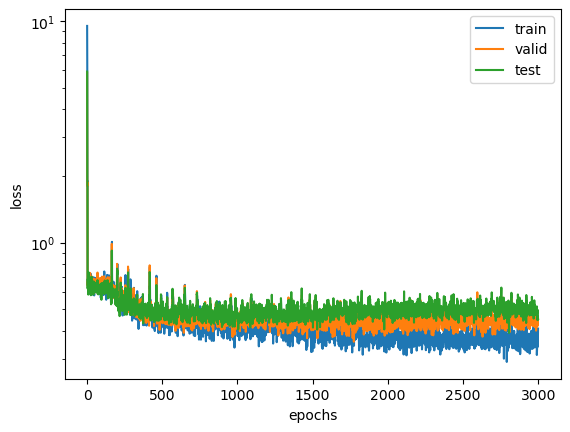

[I 2023-07-15 13:18:21,968] Trial 29 finished with value: 0.450170520902271 and parameters: {'hidden_channels': 512, 'num_layers': 5, 'num_timesteps': 3, 'dropout': 0.14802961624915617, 'optimizer': 'RMSprop', 'lr': 0.000696389054086124}. Best is trial 24 with value: 0.3633882193591766.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.529565 valid 9.129367 test 9.206414
Epoch: 020 Loss: train 0.648547 valid 0.685102 test 0.697755
Epoch: 040 Loss: train 0.627547 valid 0.679398 test 0.643250
Epoch: 060 Loss: train 0.618613 valid 0.639430 test 0.561391
Epoch: 080 Loss: train 0.616989 valid 0.634502 test 0.602329
Epoch: 100 Loss: train 0.632612 valid 0.649625 test 0.615301
Epoch: 120 Loss: train 0.602877 valid 0.627083 test 0.620644
Epoch: 140 Loss: train 0.666645 valid 0.634935 test 0.624967
Epoch: 160 Loss: train 0.616962 valid 0.652394 test 0.606793
Epoch: 180 Loss: train 0.640511 valid 0.614448 test 0.615658
Epoch: 200 Loss: train 0.609247 valid 0.628094 test 0.548200
Epoch: 220 Loss: train 0.666579 valid 0.647883 test 0.571004
Epoch: 240 Loss: train 0.605121 valid 0.588916 test 0.591031
Epoch: 260 Loss: train 0.665798 valid 0.598955 test 0.581739
Epoch: 280 Loss: train 0.552800 valid 0.624949 test 0.526096
Epoch: 300 Loss: train 0.577023 valid 0.591070 test 0.553302
Epoch: 320 Loss: train 0

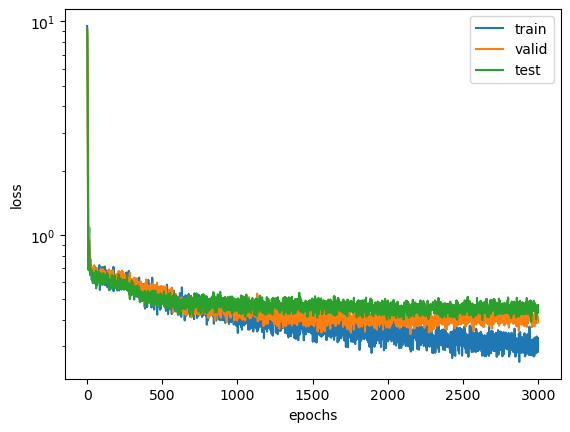

[I 2023-07-15 13:20:08,684] Trial 30 finished with value: 0.41848749559474346 and parameters: {'hidden_channels': 512, 'num_layers': 6, 'num_timesteps': 3, 'dropout': 0.17210272392998502, 'optimizer': 'AdamW', 'lr': 0.00045067958589013345}. Best is trial 24 with value: 0.3633882193591766.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.527676 valid 9.436818 test 9.512905
Epoch: 020 Loss: train 2.835360 valid 2.416336 test 2.405159
Epoch: 040 Loss: train 0.736646 valid 0.766606 test 0.687810
Epoch: 060 Loss: train 0.658662 valid 0.652602 test 0.613451
Epoch: 080 Loss: train 0.618635 valid 0.655559 test 0.581739
Epoch: 100 Loss: train 0.608880 valid 0.614409 test 0.612011
Epoch: 120 Loss: train 0.619024 valid 0.599531 test 0.589357
Epoch: 140 Loss: train 0.582784 valid 0.626030 test 0.626820
Epoch: 160 Loss: train 0.551319 valid 0.603882 test 0.613277
Epoch: 180 Loss: train 0.619342 valid 0.615660 test 0.561517
Epoch: 200 Loss: train 0.674869 valid 0.629103 test 0.609186
Epoch: 220 Loss: train 0.631225 valid 0.602776 test 0.579947
Epoch: 240 Loss: train 0.558500 valid 0.626308 test 0.592497
Epoch: 260 Loss: train 0.646761 valid 0.607573 test 0.583574
Epoch: 280 Loss: train 0.633670 valid 0.610090 test 0.589834
Epoch: 300 Loss: train 0.616274 valid 0.568545 test 0.598072
Epoch: 320 Loss: train 0

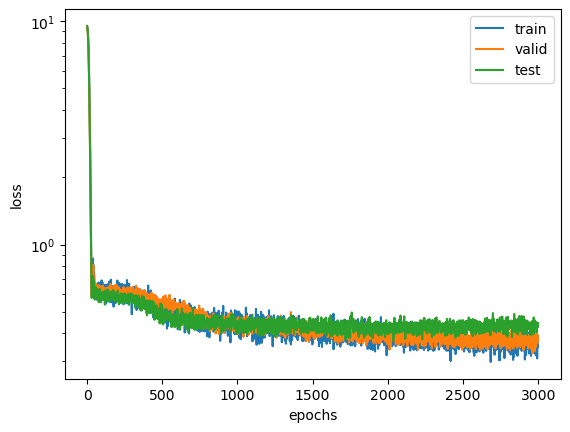

[I 2023-07-15 13:21:42,812] Trial 31 finished with value: 0.3623957364402545 and parameters: {'hidden_channels': 512, 'num_layers': 5, 'num_timesteps': 2, 'dropout': 0.1391494631161872, 'optimizer': 'AdamW', 'lr': 9.154865102632223e-05}. Best is trial 31 with value: 0.3623957364402545.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.550275 valid 9.392821 test 9.468622
Epoch: 020 Loss: train 1.606245 valid 1.392209 test 1.395331
Epoch: 040 Loss: train 0.788793 valid 0.718333 test 0.663455
Epoch: 060 Loss: train 0.648104 valid 0.649928 test 0.583051
Epoch: 080 Loss: train 0.667109 valid 0.576176 test 0.593616
Epoch: 100 Loss: train 0.591279 valid 0.617269 test 0.619707
Epoch: 120 Loss: train 0.624218 valid 0.617488 test 0.614828
Epoch: 140 Loss: train 0.578946 valid 0.567424 test 0.572929
Epoch: 160 Loss: train 0.618196 valid 0.619004 test 0.537802
Epoch: 180 Loss: train 0.664339 valid 0.596514 test 0.602231
Epoch: 200 Loss: train 0.665144 valid 0.619438 test 0.559397
Epoch: 220 Loss: train 0.627089 valid 0.635591 test 0.601477
Epoch: 240 Loss: train 0.602081 valid 0.629257 test 0.575569
Epoch: 260 Loss: train 0.589880 valid 0.606539 test 0.594607
Epoch: 280 Loss: train 0.645265 valid 0.559599 test 0.606281
Epoch: 300 Loss: train 0.585923 valid 0.591377 test 0.551037
Epoch: 320 Loss: train 0

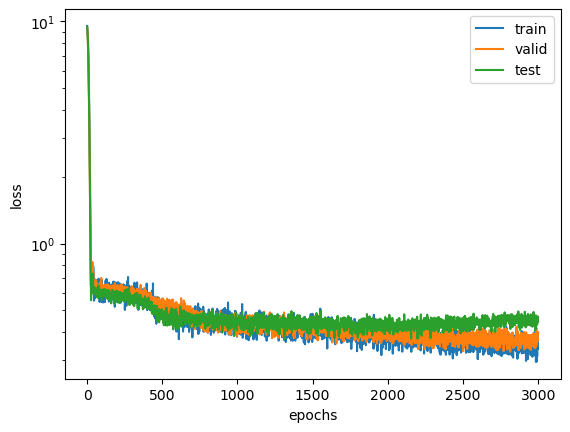

[I 2023-07-15 13:23:07,167] Trial 32 finished with value: 0.3764136569698828 and parameters: {'hidden_channels': 512, 'num_layers': 4, 'num_timesteps': 2, 'dropout': 0.1414884589211147, 'optimizer': 'AdamW', 'lr': 0.00011942516738531166}. Best is trial 31 with value: 0.3623957364402545.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.493031 valid 9.221954 test 9.299473
Epoch: 020 Loss: train 0.919030 valid 0.920463 test 0.796377
Epoch: 040 Loss: train 0.727453 valid 0.645761 test 0.638399
Epoch: 060 Loss: train 0.675922 valid 0.666768 test 0.617690
Epoch: 080 Loss: train 0.610540 valid 0.616542 test 0.613482
Epoch: 100 Loss: train 0.602666 valid 0.620636 test 0.589640
Epoch: 120 Loss: train 0.655857 valid 0.638438 test 0.562221
Epoch: 140 Loss: train 0.612238 valid 0.614970 test 0.579031
Epoch: 160 Loss: train 0.645423 valid 0.607964 test 0.607576
Epoch: 180 Loss: train 0.601999 valid 0.589575 test 0.570333
Epoch: 200 Loss: train 0.577889 valid 0.600893 test 0.560196
Epoch: 220 Loss: train 0.574816 valid 0.602998 test 0.605792
Epoch: 240 Loss: train 0.653561 valid 0.615530 test 0.551800
Epoch: 260 Loss: train 0.564313 valid 0.597864 test 0.544196
Epoch: 280 Loss: train 0.602560 valid 0.571535 test 0.539123
Epoch: 300 Loss: train 0.554492 valid 0.605836 test 0.531964
Epoch: 320 Loss: train 0

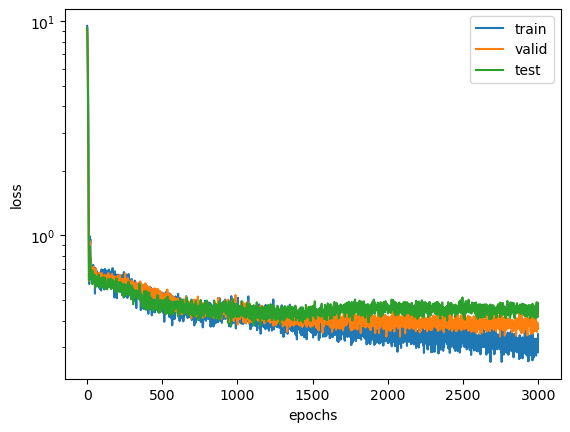

[I 2023-07-15 13:24:40,433] Trial 33 finished with value: 0.3827921905139687 and parameters: {'hidden_channels': 512, 'num_layers': 5, 'num_timesteps': 2, 'dropout': 0.15464190575888614, 'optimizer': 'AdamW', 'lr': 0.0002324053173170465}. Best is trial 31 with value: 0.3623957364402545.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.486354 valid 9.512129 test 9.588965
Epoch: 020 Loss: train 8.881688 valid 8.763034 test 8.838215
Epoch: 040 Loss: train 6.045288 valid 5.912912 test 5.913723
Epoch: 060 Loss: train 2.476139 valid 2.407178 test 2.352552
Epoch: 080 Loss: train 0.974007 valid 0.922027 test 0.866593
Epoch: 100 Loss: train 0.684151 valid 0.696821 test 0.574807
Epoch: 120 Loss: train 0.739053 valid 0.676040 test 0.641888
Epoch: 140 Loss: train 0.620453 valid 0.600053 test 0.604482
Epoch: 160 Loss: train 0.688363 valid 0.635946 test 0.560377
Epoch: 180 Loss: train 0.632081 valid 0.676798 test 0.601925
Epoch: 200 Loss: train 0.686905 valid 0.605938 test 0.594682
Epoch: 220 Loss: train 0.630953 valid 0.670940 test 0.576530
Epoch: 240 Loss: train 0.683932 valid 0.640694 test 0.575833
Epoch: 260 Loss: train 0.595735 valid 0.606305 test 0.608438
Epoch: 280 Loss: train 0.621809 valid 0.662088 test 0.563810
Epoch: 300 Loss: train 0.599224 valid 0.621315 test 0.592712
Epoch: 320 Loss: train 0

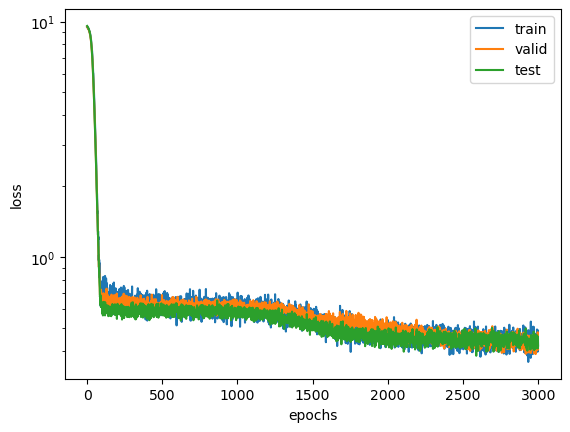

[I 2023-07-15 13:26:24,046] Trial 34 finished with value: 0.43563008779431134 and parameters: {'hidden_channels': 512, 'num_layers': 6, 'num_timesteps': 2, 'dropout': 0.1419669012395849, 'optimizer': 'AdamW', 'lr': 2.2490595071567095e-05}. Best is trial 31 with value: 0.3623957364402545.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.538822 valid 6.375427 test 6.364828
Epoch: 020 Loss: train 0.638321 valid 0.626539 test 0.548560
Epoch: 040 Loss: train 0.625934 valid 0.613794 test 0.562999
Epoch: 060 Loss: train 0.569888 valid 0.593791 test 0.591267
Epoch: 080 Loss: train 0.591939 valid 0.624338 test 0.567693
Epoch: 100 Loss: train 0.616642 valid 0.595456 test 0.586659
Epoch: 120 Loss: train 0.570567 valid 0.596770 test 0.570118
Epoch: 140 Loss: train 0.568464 valid 0.584813 test 0.547813
Epoch: 160 Loss: train 0.631920 valid 0.622243 test 0.593007
Epoch: 180 Loss: train 0.511442 valid 0.530123 test 0.499663
Epoch: 200 Loss: train 0.475941 valid 0.530215 test 0.486944
Epoch: 220 Loss: train 0.521897 valid 0.602288 test 0.599737
Epoch: 240 Loss: train 0.448686 valid 0.541747 test 0.470141
Epoch: 260 Loss: train 0.520846 valid 0.575361 test 0.515037
Epoch: 280 Loss: train 0.504096 valid 0.516844 test 0.468295
Epoch: 300 Loss: train 0.460143 valid 0.526445 test 0.457440
Epoch: 320 Loss: train 0

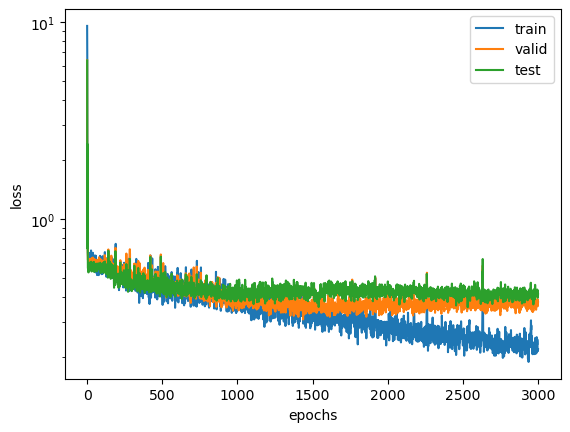

[I 2023-07-15 13:29:00,522] Trial 35 finished with value: 0.3792618069739776 and parameters: {'hidden_channels': 1024, 'num_layers': 4, 'num_timesteps': 3, 'dropout': 0.132309582486666, 'optimizer': 'RMSprop', 'lr': 8.201841855661111e-05}. Best is trial 31 with value: 0.3623957364402545.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.480354 valid 9.492176 test 9.569694
Epoch: 020 Loss: train 7.250552 valid 6.991907 test 7.021094
Epoch: 040 Loss: train 1.953168 valid 1.715883 test 1.760914
Epoch: 060 Loss: train 0.673214 valid 0.654314 test 0.582385
Epoch: 080 Loss: train 0.674537 valid 0.659898 test 0.622436
Epoch: 100 Loss: train 0.709625 valid 0.605707 test 0.646045
Epoch: 120 Loss: train 0.650217 valid 0.614744 test 0.573815
Epoch: 140 Loss: train 0.627558 valid 0.610840 test 0.588944
Epoch: 160 Loss: train 0.588675 valid 0.618647 test 0.591553
Epoch: 180 Loss: train 0.680064 valid 0.690184 test 0.566298
Epoch: 200 Loss: train 0.611707 valid 0.682131 test 0.563675
Epoch: 220 Loss: train 0.677136 valid 0.611783 test 0.589460
Epoch: 240 Loss: train 0.624906 valid 0.629618 test 0.618512
Epoch: 260 Loss: train 0.617798 valid 0.645064 test 0.558186
Epoch: 280 Loss: train 0.594369 valid 0.611738 test 0.596412
Epoch: 300 Loss: train 0.638477 valid 0.642149 test 0.608880
Epoch: 320 Loss: train 0

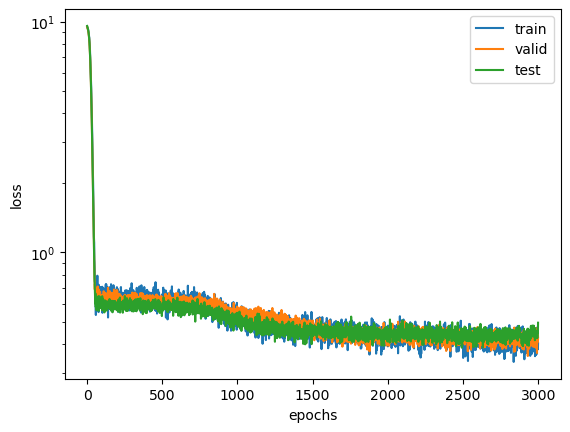

[I 2023-07-15 13:30:37,498] Trial 36 finished with value: 0.4228049985919995 and parameters: {'hidden_channels': 512, 'num_layers': 5, 'num_timesteps': 3, 'dropout': 0.15026539331600453, 'optimizer': 'AdamW', 'lr': 4.2872524087810746e-05}. Best is trial 31 with value: 0.3623957364402545.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.536895 valid 8.797877 test 8.869881
Epoch: 020 Loss: train 0.932868 valid 0.929124 test 0.972810
Epoch: 040 Loss: train 0.697823 valid 0.668054 test 0.681268
Epoch: 060 Loss: train 0.634181 valid 0.673162 test 0.565390
Epoch: 080 Loss: train 0.666435 valid 0.623812 test 0.579034
Epoch: 100 Loss: train 0.645558 valid 0.632414 test 0.597559
Epoch: 120 Loss: train 0.608999 valid 0.618665 test 0.610070
Epoch: 140 Loss: train 0.649227 valid 0.635464 test 0.545021
Epoch: 160 Loss: train 0.692020 valid 0.634064 test 0.636940
Epoch: 180 Loss: train 0.684931 valid 0.684588 test 0.610605
Epoch: 200 Loss: train 0.662994 valid 0.644217 test 0.585466
Epoch: 220 Loss: train 0.606412 valid 0.615510 test 0.580185
Epoch: 240 Loss: train 0.664990 valid 0.588516 test 0.617052
Epoch: 260 Loss: train 0.651068 valid 0.639194 test 0.552452
Epoch: 280 Loss: train 0.571067 valid 0.601127 test 0.595510
Epoch: 300 Loss: train 0.595664 valid 0.608233 test 0.583202
Epoch: 320 Loss: train 0

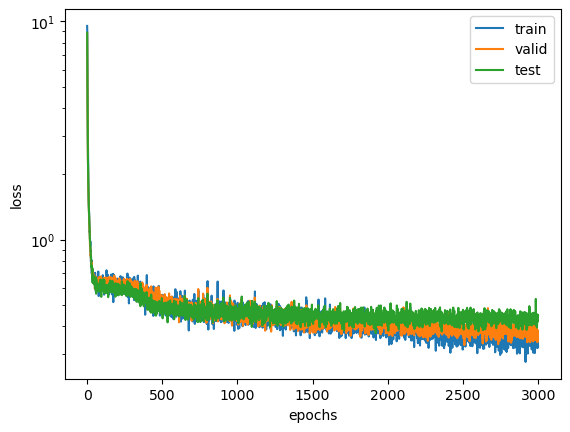

[I 2023-07-15 13:31:56,520] Trial 37 finished with value: 0.3675298186131434 and parameters: {'hidden_channels': 256, 'num_layers': 4, 'num_timesteps': 2, 'dropout': 0.11629360010498699, 'optimizer': 'RMSprop', 'lr': 0.00014243437478910493}. Best is trial 31 with value: 0.3623957364402545.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.541344 valid 6.379618 test 6.451229
Epoch: 020 Loss: train 0.737635 valid 0.674315 test 0.631071
Epoch: 040 Loss: train 0.627016 valid 0.725496 test 0.701537
Epoch: 060 Loss: train 0.584589 valid 0.688058 test 0.658711
Epoch: 080 Loss: train 0.642373 valid 0.588990 test 0.591962
Epoch: 100 Loss: train 0.620313 valid 0.684331 test 0.592162
Epoch: 120 Loss: train 0.622546 valid 0.636018 test 0.586352
Epoch: 140 Loss: train 0.638462 valid 0.614085 test 0.550931
Epoch: 160 Loss: train 0.586122 valid 0.602378 test 0.549794
Epoch: 180 Loss: train 0.519068 valid 0.534418 test 0.509491
Epoch: 200 Loss: train 0.477735 valid 0.541530 test 0.554833
Epoch: 220 Loss: train 0.541965 valid 0.538511 test 0.487462
Epoch: 240 Loss: train 0.483661 valid 0.558243 test 0.483177
Epoch: 260 Loss: train 0.498883 valid 0.542904 test 0.494729
Epoch: 280 Loss: train 0.529706 valid 0.485986 test 0.487011
Epoch: 300 Loss: train 0.557101 valid 0.498477 test 0.433267
Epoch: 320 Loss: train 0

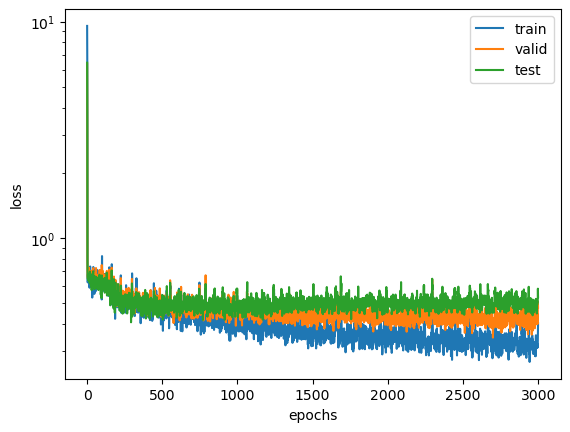

[I 2023-07-15 13:33:24,663] Trial 38 finished with value: 0.5376774622552642 and parameters: {'hidden_channels': 256, 'num_layers': 4, 'num_timesteps': 5, 'dropout': 0.11770543228592018, 'optimizer': 'RMSprop', 'lr': 0.0009452767611972257}. Best is trial 31 with value: 0.3623957364402545.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.542542 valid 8.513412 test 8.580976
Epoch: 020 Loss: train 0.788869 valid 0.796662 test 0.789309
Epoch: 040 Loss: train 0.612405 valid 0.656134 test 0.621378
Epoch: 060 Loss: train 0.677959 valid 0.613984 test 0.629837
Epoch: 080 Loss: train 0.633936 valid 0.650521 test 0.607488
Epoch: 100 Loss: train 0.610677 valid 0.634648 test 0.595406
Epoch: 120 Loss: train 0.650245 valid 0.605563 test 0.598445
Epoch: 140 Loss: train 0.696976 valid 0.650677 test 0.554088
Epoch: 160 Loss: train 0.576463 valid 0.636673 test 0.561510
Epoch: 180 Loss: train 0.608771 valid 0.644642 test 0.609130
Epoch: 200 Loss: train 0.660987 valid 0.624972 test 0.614571
Epoch: 220 Loss: train 0.622473 valid 0.629370 test 0.609657
Epoch: 240 Loss: train 0.571060 valid 0.617666 test 0.535512
Epoch: 260 Loss: train 0.563318 valid 0.565870 test 0.550555
Epoch: 280 Loss: train 0.520052 valid 0.619854 test 0.573454
Epoch: 300 Loss: train 0.570472 valid 0.557241 test 0.562017
Epoch: 320 Loss: train 0

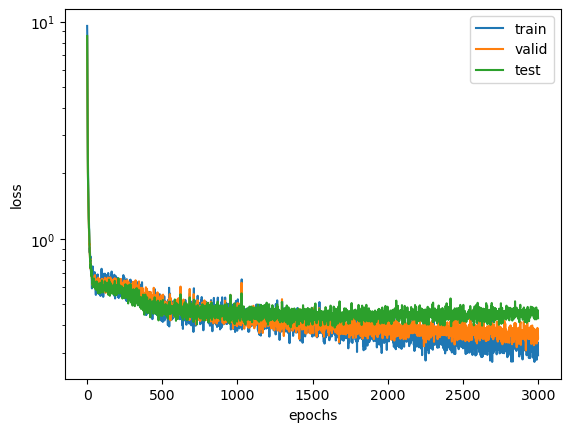

[I 2023-07-15 13:34:55,059] Trial 39 finished with value: 0.3566121828413928 and parameters: {'hidden_channels': 256, 'num_layers': 3, 'num_timesteps': 8, 'dropout': 0.09825829042929715, 'optimizer': 'RMSprop', 'lr': 0.00015986177597465453}. Best is trial 39 with value: 0.3566121828413928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.575018 valid 8.797086 test 8.864063
Epoch: 020 Loss: train 0.911188 valid 0.917803 test 0.978661
Epoch: 040 Loss: train 0.665375 valid 0.674329 test 0.677495
Epoch: 060 Loss: train 0.605076 valid 0.671295 test 0.581112
Epoch: 080 Loss: train 0.592383 valid 0.599379 test 0.565993
Epoch: 100 Loss: train 0.635171 valid 0.647982 test 0.607129
Epoch: 120 Loss: train 0.532333 valid 0.587897 test 0.576650
Epoch: 140 Loss: train 0.646670 valid 0.625266 test 0.584187
Epoch: 160 Loss: train 0.623668 valid 0.615277 test 0.575617
Epoch: 180 Loss: train 0.639083 valid 0.614056 test 0.595942
Epoch: 200 Loss: train 0.620934 valid 0.628406 test 0.616120
Epoch: 220 Loss: train 0.626908 valid 0.646938 test 0.553119
Epoch: 240 Loss: train 0.606775 valid 0.615558 test 0.601560
Epoch: 260 Loss: train 0.608985 valid 0.625379 test 0.573115
Epoch: 280 Loss: train 0.536424 valid 0.594265 test 0.544839
Epoch: 300 Loss: train 0.594297 valid 0.639494 test 0.536687
Epoch: 320 Loss: train 0

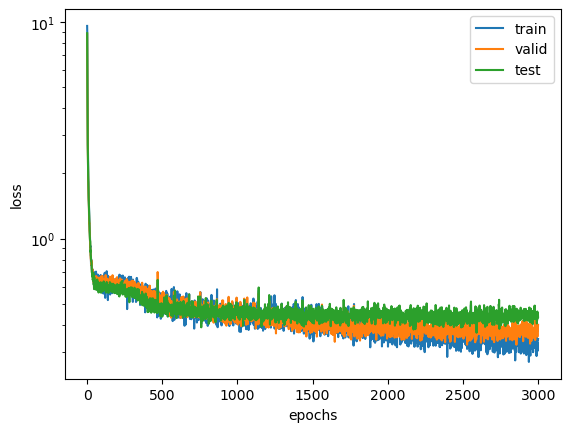

[I 2023-07-15 13:36:24,177] Trial 40 finished with value: 0.38771001787698084 and parameters: {'hidden_channels': 256, 'num_layers': 3, 'num_timesteps': 8, 'dropout': 0.0998434236669485, 'optimizer': 'RMSprop', 'lr': 0.00015052623610821162}. Best is trial 39 with value: 0.3566121828413928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.487694 valid 8.146567 test 8.198417
Epoch: 020 Loss: train 0.687355 valid 0.642240 test 0.652876
Epoch: 040 Loss: train 0.593997 valid 0.649722 test 0.620932
Epoch: 060 Loss: train 0.636303 valid 0.579477 test 0.568533
Epoch: 080 Loss: train 0.578522 valid 0.642146 test 0.623553
Epoch: 100 Loss: train 0.641512 valid 0.633952 test 0.570911
Epoch: 120 Loss: train 0.607110 valid 0.611038 test 0.587971
Epoch: 140 Loss: train 0.632468 valid 0.608725 test 0.591837
Epoch: 160 Loss: train 0.586832 valid 0.603889 test 0.595495
Epoch: 180 Loss: train 0.588983 valid 0.596114 test 0.573759
Epoch: 200 Loss: train 0.543591 valid 0.627552 test 0.547087
Epoch: 220 Loss: train 0.617787 valid 0.619348 test 0.554796
Epoch: 240 Loss: train 0.625555 valid 0.575727 test 0.546639
Epoch: 260 Loss: train 0.626790 valid 0.557582 test 0.529352
Epoch: 280 Loss: train 0.560772 valid 0.560236 test 0.527158
Epoch: 300 Loss: train 0.570685 valid 0.567579 test 0.547546
Epoch: 320 Loss: train 0

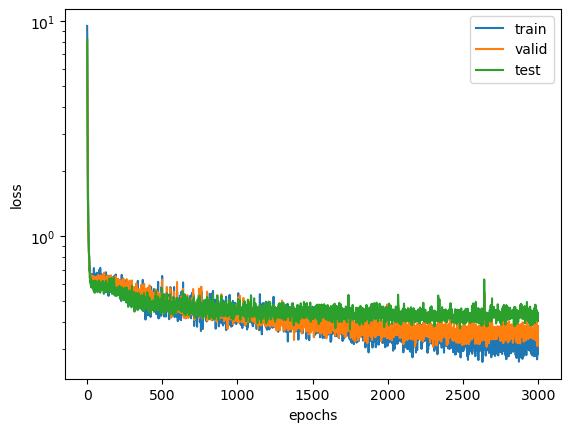

[I 2023-07-15 13:37:45,495] Trial 41 finished with value: 0.3529622639266818 and parameters: {'hidden_channels': 256, 'num_layers': 2, 'num_timesteps': 7, 'dropout': 0.10172769611576166, 'optimizer': 'RMSprop', 'lr': 0.00020056244660775685}. Best is trial 41 with value: 0.3529622639266818.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.535321 valid 7.906012 test 7.958998
Epoch: 020 Loss: train 0.615482 valid 0.625586 test 0.633516
Epoch: 040 Loss: train 0.671969 valid 0.616380 test 0.600105
Epoch: 060 Loss: train 0.572105 valid 0.637403 test 0.589970
Epoch: 080 Loss: train 0.637230 valid 0.601606 test 0.548078
Epoch: 100 Loss: train 0.601750 valid 0.579670 test 0.586081
Epoch: 120 Loss: train 0.494618 valid 0.603021 test 0.587196
Epoch: 140 Loss: train 0.525476 valid 0.590883 test 0.524885
Epoch: 160 Loss: train 0.582207 valid 0.591033 test 0.549154
Epoch: 180 Loss: train 0.553201 valid 0.584219 test 0.498926
Epoch: 200 Loss: train 0.616181 valid 0.586198 test 0.519235
Epoch: 220 Loss: train 0.576082 valid 0.559261 test 0.506593
Epoch: 240 Loss: train 0.557908 valid 0.595563 test 0.529429
Epoch: 260 Loss: train 0.598327 valid 0.524858 test 0.467304
Epoch: 280 Loss: train 0.492478 valid 0.520486 test 0.494166
Epoch: 300 Loss: train 0.534955 valid 0.539949 test 0.478026
Epoch: 320 Loss: train 0

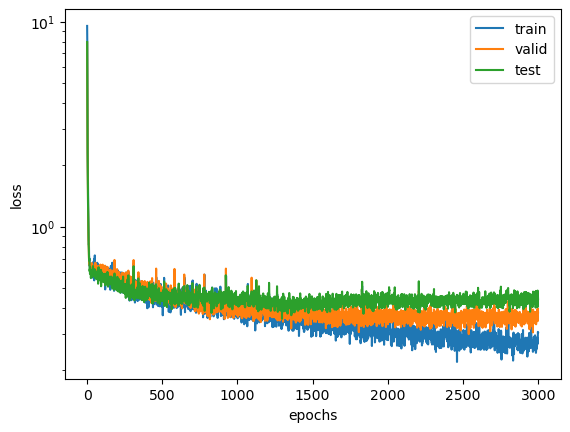

[I 2023-07-15 13:39:06,113] Trial 42 finished with value: 0.3592140495954239 and parameters: {'hidden_channels': 256, 'num_layers': 2, 'num_timesteps': 7, 'dropout': 0.09741472793539087, 'optimizer': 'RMSprop', 'lr': 0.0003324360142982654}. Best is trial 41 with value: 0.3529622639266818.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.536242 valid 7.626351 test 7.687850
Epoch: 020 Loss: train 0.648593 valid 0.634445 test 0.574192
Epoch: 040 Loss: train 0.675935 valid 0.639273 test 0.589631
Epoch: 060 Loss: train 0.630167 valid 0.624024 test 0.585912
Epoch: 080 Loss: train 0.633300 valid 0.625601 test 0.569768
Epoch: 100 Loss: train 0.523958 valid 0.580849 test 0.569075
Epoch: 120 Loss: train 0.552195 valid 0.609194 test 0.568134
Epoch: 140 Loss: train 0.583827 valid 0.596800 test 0.546951
Epoch: 160 Loss: train 0.584061 valid 0.551688 test 0.550744
Epoch: 180 Loss: train 0.565561 valid 0.541632 test 0.481788
Epoch: 200 Loss: train 0.489536 valid 0.548932 test 0.517865
Epoch: 220 Loss: train 0.511816 valid 0.535209 test 0.441839
Epoch: 240 Loss: train 0.474382 valid 0.538496 test 0.463162
Epoch: 260 Loss: train 0.537532 valid 0.565964 test 0.498299
Epoch: 280 Loss: train 0.417844 valid 0.498877 test 0.467287
Epoch: 300 Loss: train 0.491190 valid 0.553767 test 0.516897
Epoch: 320 Loss: train 0

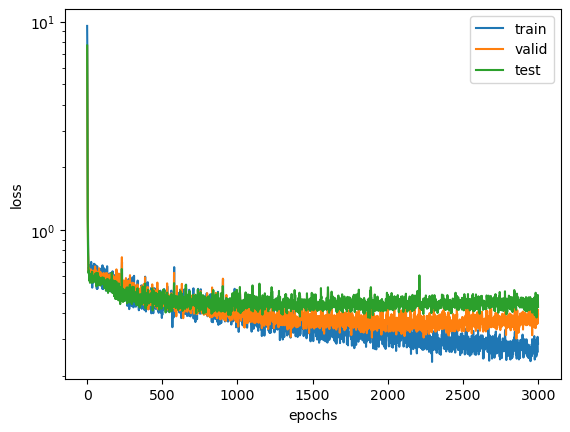

[I 2023-07-15 13:40:26,249] Trial 43 finished with value: 0.41852910748687433 and parameters: {'hidden_channels': 256, 'num_layers': 2, 'num_timesteps': 7, 'dropout': 0.09627847612835273, 'optimizer': 'RMSprop', 'lr': 0.0003763365798069259}. Best is trial 41 with value: 0.3529622639266818.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.532102 valid 7.825242 test 7.860893
Epoch: 020 Loss: train 0.635596 valid 0.636673 test 0.647580
Epoch: 040 Loss: train 0.669450 valid 0.587316 test 0.589437
Epoch: 060 Loss: train 0.590814 valid 0.621074 test 0.592358
Epoch: 080 Loss: train 0.634032 valid 0.623786 test 0.617229
Epoch: 100 Loss: train 0.592725 valid 0.635402 test 0.618054
Epoch: 120 Loss: train 0.561826 valid 0.633141 test 0.559766
Epoch: 140 Loss: train 0.610445 valid 0.588971 test 0.547354
Epoch: 160 Loss: train 0.586018 valid 0.604685 test 0.546490
Epoch: 180 Loss: train 0.619377 valid 0.572429 test 0.607059
Epoch: 200 Loss: train 0.625864 valid 0.616544 test 0.532080
Epoch: 220 Loss: train 0.560799 valid 0.574142 test 0.551258
Epoch: 240 Loss: train 0.564843 valid 0.577531 test 0.519511
Epoch: 260 Loss: train 0.546748 valid 0.574419 test 0.488816
Epoch: 280 Loss: train 0.513968 valid 0.550576 test 0.481772
Epoch: 300 Loss: train 0.530389 valid 0.526139 test 0.468618
Epoch: 320 Loss: train 0

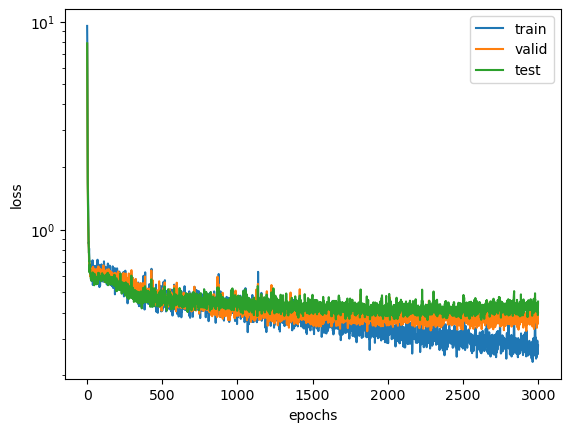

[I 2023-07-15 13:41:46,347] Trial 44 finished with value: 0.37479087047641535 and parameters: {'hidden_channels': 256, 'num_layers': 2, 'num_timesteps': 7, 'dropout': 0.09005713390936938, 'optimizer': 'RMSprop', 'lr': 0.00023641741748980103}. Best is trial 41 with value: 0.3529622639266818.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.582989 valid 7.277243 test 7.343365
Epoch: 020 Loss: train 0.594417 valid 0.634767 test 0.568832
Epoch: 040 Loss: train 0.618511 valid 0.622869 test 0.592743
Epoch: 060 Loss: train 0.603854 valid 0.592253 test 0.571758
Epoch: 080 Loss: train 0.552779 valid 0.587660 test 0.561897
Epoch: 100 Loss: train 0.622917 valid 0.624428 test 0.590533
Epoch: 120 Loss: train 0.559495 valid 0.581057 test 0.527031
Epoch: 140 Loss: train 0.509497 valid 0.578435 test 0.508018
Epoch: 160 Loss: train 0.501524 valid 0.586600 test 0.525089
Epoch: 180 Loss: train 0.513646 valid 0.557038 test 0.488296
Epoch: 200 Loss: train 0.521153 valid 0.532248 test 0.447803
Epoch: 220 Loss: train 0.482701 valid 0.521927 test 0.463192
Epoch: 240 Loss: train 0.504168 valid 0.561588 test 0.528063
Epoch: 260 Loss: train 0.527726 valid 0.528165 test 0.510400
Epoch: 280 Loss: train 0.444119 valid 0.506552 test 0.445584
Epoch: 300 Loss: train 0.392948 valid 0.482922 test 0.434311
Epoch: 320 Loss: train 0

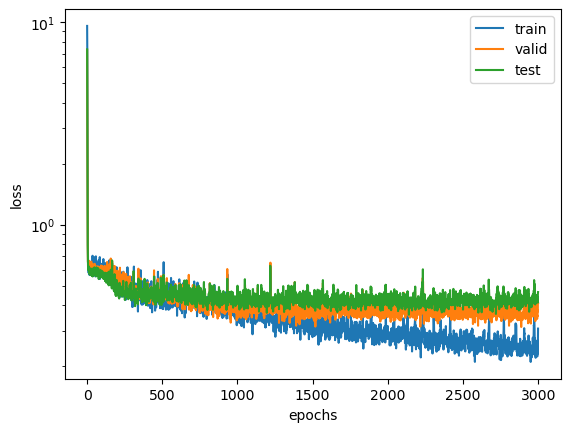

[I 2023-07-15 13:43:04,966] Trial 45 finished with value: 0.42269779548777087 and parameters: {'hidden_channels': 256, 'num_layers': 2, 'num_timesteps': 7, 'dropout': 0.08670015045029457, 'optimizer': 'RMSprop', 'lr': 0.0005282567207944011}. Best is trial 41 with value: 0.3529622639266818.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.592401 valid 7.697045 test 7.750081
Epoch: 020 Loss: train 0.597195 valid 0.610292 test 0.601387
Epoch: 040 Loss: train 0.596873 valid 0.626697 test 0.580906
Epoch: 060 Loss: train 0.580115 valid 0.577332 test 0.618740
Epoch: 080 Loss: train 0.636853 valid 0.613099 test 0.580025
Epoch: 100 Loss: train 0.602932 valid 0.608144 test 0.589486
Epoch: 120 Loss: train 0.520744 valid 0.595548 test 0.565953
Epoch: 140 Loss: train 0.594849 valid 0.623065 test 0.521694
Epoch: 160 Loss: train 0.566901 valid 0.560561 test 0.538915
Epoch: 180 Loss: train 0.529656 valid 0.624671 test 0.507206
Epoch: 200 Loss: train 0.538090 valid 0.555485 test 0.478645
Epoch: 220 Loss: train 0.531683 valid 0.543866 test 0.519405
Epoch: 240 Loss: train 0.462184 valid 0.567270 test 0.490210
Epoch: 260 Loss: train 0.473409 valid 0.518050 test 0.473458
Epoch: 280 Loss: train 0.477791 valid 0.490189 test 0.463557
Epoch: 300 Loss: train 0.520374 valid 0.518376 test 0.462486
Epoch: 320 Loss: train 0

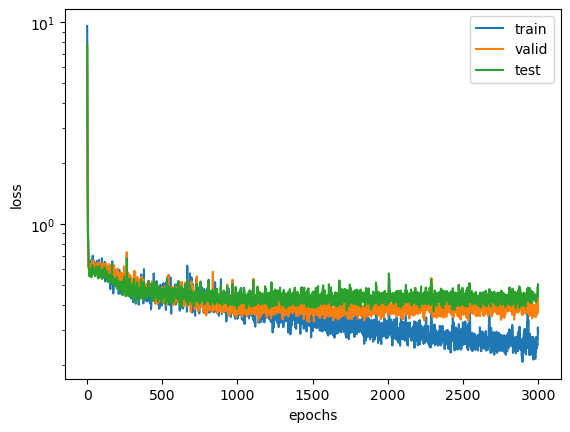

[I 2023-07-15 13:44:35,473] Trial 46 finished with value: 0.39361794984245746 and parameters: {'hidden_channels': 256, 'num_layers': 3, 'num_timesteps': 8, 'dropout': 0.0792652460141204, 'optimizer': 'RMSprop', 'lr': 0.00031403319146949935}. Best is trial 41 with value: 0.3529622639266818.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.572413 valid 7.809554 test 7.863684
Epoch: 020 Loss: train 0.679717 valid 0.678781 test 0.621177
Epoch: 040 Loss: train 0.683835 valid 0.708495 test 0.693771
Epoch: 060 Loss: train 0.692320 valid 0.658160 test 0.685490
Epoch: 080 Loss: train 0.748299 valid 0.623123 test 0.638619
Epoch: 100 Loss: train 0.664571 valid 0.640744 test 0.608284
Epoch: 120 Loss: train 0.613444 valid 0.624382 test 0.596086
Epoch: 140 Loss: train 0.618955 valid 0.650836 test 0.536664
Epoch: 160 Loss: train 0.601440 valid 0.635670 test 0.564939
Epoch: 180 Loss: train 0.580416 valid 0.700522 test 0.705954
Epoch: 200 Loss: train 0.608089 valid 0.597681 test 0.547655
Epoch: 220 Loss: train 0.541244 valid 0.505778 test 0.565241
Epoch: 240 Loss: train 0.512116 valid 0.611466 test 0.498244
Epoch: 260 Loss: train 0.652330 valid 0.730011 test 0.669057
Epoch: 280 Loss: train 0.542338 valid 0.562835 test 0.590242
Epoch: 300 Loss: train 0.517566 valid 0.492233 test 0.508354
Epoch: 320 Loss: train 0

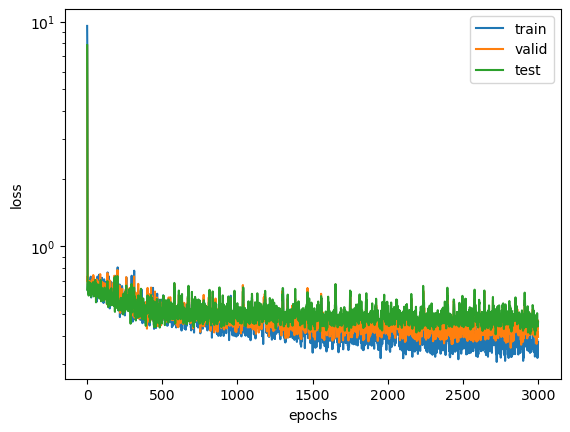

[I 2023-07-15 13:45:54,488] Trial 47 finished with value: 0.39325700905344335 and parameters: {'hidden_channels': 256, 'num_layers': 2, 'num_timesteps': 6, 'dropout': 0.10729746753531164, 'optimizer': 'RMSprop', 'lr': 0.0015928325784147048}. Best is trial 41 with value: 0.3529622639266818.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.499406 valid 9.060913 test 9.144964
Epoch: 020 Loss: train 2.456527 valid 2.363320 test 2.420651
Epoch: 040 Loss: train 1.553571 valid 1.556149 test 1.599823
Epoch: 060 Loss: train 1.208680 valid 1.239133 test 1.341424
Epoch: 080 Loss: train 1.036081 valid 1.031864 test 1.103838
Epoch: 100 Loss: train 0.909737 valid 0.865765 test 0.958462
Epoch: 120 Loss: train 0.822384 valid 0.805906 test 0.826501
Epoch: 140 Loss: train 0.700687 valid 0.718930 test 0.747470
Epoch: 160 Loss: train 0.724503 valid 0.720601 test 0.742872
Epoch: 180 Loss: train 0.626324 valid 0.695085 test 0.658701
Epoch: 200 Loss: train 0.700226 valid 0.673743 test 0.636011
Epoch: 220 Loss: train 0.643681 valid 0.684841 test 0.591253
Epoch: 240 Loss: train 0.605377 valid 0.641369 test 0.653664
Epoch: 260 Loss: train 0.646447 valid 0.640403 test 0.624824
Epoch: 280 Loss: train 0.658895 valid 0.619097 test 0.622924
Epoch: 300 Loss: train 0.665954 valid 0.648208 test 0.633111
Epoch: 320 Loss: train 0

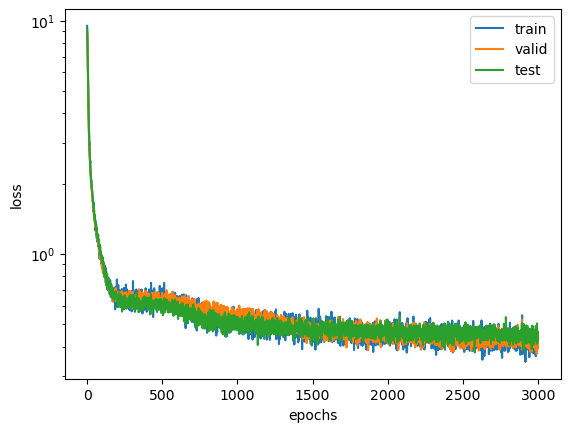

[I 2023-07-15 13:47:24,442] Trial 48 finished with value: 0.39180337717847874 and parameters: {'hidden_channels': 256, 'num_layers': 3, 'num_timesteps': 8, 'dropout': 0.12597624491672574, 'optimizer': 'RMSprop', 'lr': 5.54128675762437e-05}. Best is trial 41 with value: 0.3529622639266818.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.529558 valid 8.382173 test 8.445816
Epoch: 020 Loss: train 0.793853 valid 0.765809 test 0.778641
Epoch: 040 Loss: train 0.614357 valid 0.642385 test 0.623912
Epoch: 060 Loss: train 0.609057 valid 0.674775 test 0.608974
Epoch: 080 Loss: train 0.626804 valid 0.653965 test 0.578570
Epoch: 100 Loss: train 0.573559 valid 0.658546 test 0.618622
Epoch: 120 Loss: train 0.639474 valid 0.621858 test 0.627081
Epoch: 140 Loss: train 0.671273 valid 0.608887 test 0.608032
Epoch: 160 Loss: train 0.629402 valid 0.604690 test 0.590158
Epoch: 180 Loss: train 0.651619 valid 0.644322 test 0.584987
Epoch: 200 Loss: train 0.627503 valid 0.583676 test 0.602051
Epoch: 220 Loss: train 0.596142 valid 0.586749 test 0.575429
Epoch: 240 Loss: train 0.594982 valid 0.607062 test 0.589040
Epoch: 260 Loss: train 0.554548 valid 0.566805 test 0.499535
Epoch: 280 Loss: train 0.544690 valid 0.554396 test 0.495169
Epoch: 300 Loss: train 0.497561 valid 0.570597 test 0.505108
Epoch: 320 Loss: train 0

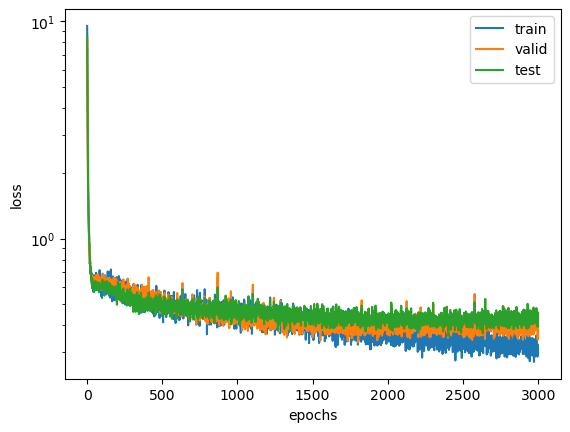

[I 2023-07-15 13:48:43,651] Trial 49 finished with value: 0.3845070108937133 and parameters: {'hidden_channels': 256, 'num_layers': 2, 'num_timesteps': 7, 'dropout': 0.1210732274864445, 'optimizer': 'RMSprop', 'lr': 0.0001918031534447882}. Best is trial 41 with value: 0.3529622639266818.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.546464 valid 3.558679 test 3.622159
Epoch: 020 Loss: train 0.634921 valid 0.665457 test 0.594976
Epoch: 040 Loss: train 0.606887 valid 0.644411 test 0.639914
Epoch: 060 Loss: train 0.687075 valid 0.645927 test 0.622976
Epoch: 080 Loss: train 0.635882 valid 0.641956 test 0.655219
Epoch: 100 Loss: train 0.657045 valid 0.613787 test 0.636342
Epoch: 120 Loss: train 0.662462 valid 0.647943 test 0.635681
Epoch: 140 Loss: train 0.674620 valid 0.670060 test 0.579897
Epoch: 160 Loss: train 0.629455 valid 0.647561 test 0.593701
Epoch: 180 Loss: train 0.592165 valid 0.666176 test 0.602440
Epoch: 200 Loss: train 0.614164 valid 0.630184 test 0.646412
Epoch: 220 Loss: train 0.629707 valid 0.627137 test 0.624796
Epoch: 240 Loss: train 0.634389 valid 0.655242 test 0.615248
Epoch: 260 Loss: train 0.604185 valid 0.626111 test 0.595962
Epoch: 280 Loss: train 0.748173 valid 0.823409 test 0.726579
Epoch: 300 Loss: train 0.608279 valid 0.640786 test 0.615402
Epoch: 320 Loss: train 0

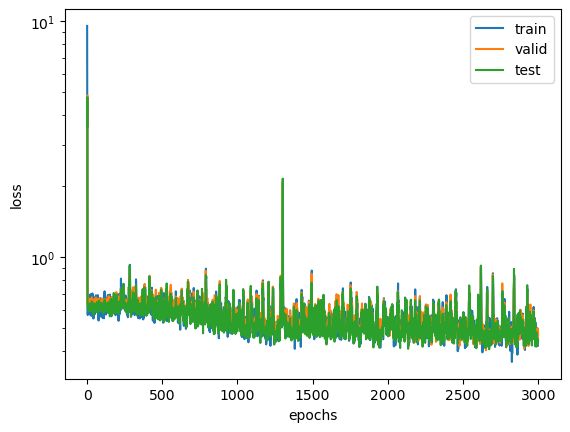

[I 2023-07-15 13:51:08,059] Trial 50 finished with value: 0.4634317834041464 and parameters: {'hidden_channels': 1024, 'num_layers': 3, 'num_timesteps': 6, 'dropout': 0.10594207310298359, 'optimizer': 'RMSprop', 'lr': 0.0010157328322876098}. Best is trial 41 with value: 0.3529622639266818.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.584372 valid 8.856974 test 8.931307
Epoch: 020 Loss: train 1.286340 valid 1.216757 test 1.251952
Epoch: 040 Loss: train 0.779524 valid 0.755578 test 0.773231
Epoch: 060 Loss: train 0.691717 valid 0.644096 test 0.632992
Epoch: 080 Loss: train 0.650152 valid 0.648241 test 0.679630
Epoch: 100 Loss: train 0.724378 valid 0.618475 test 0.609702
Epoch: 120 Loss: train 0.656449 valid 0.656496 test 0.667756
Epoch: 140 Loss: train 0.685188 valid 0.664115 test 0.607117
Epoch: 160 Loss: train 0.611734 valid 0.634693 test 0.593389
Epoch: 180 Loss: train 0.648725 valid 0.634060 test 0.625077
Epoch: 200 Loss: train 0.581910 valid 0.625004 test 0.632894
Epoch: 220 Loss: train 0.637534 valid 0.630278 test 0.622575
Epoch: 240 Loss: train 0.642340 valid 0.630371 test 0.618051
Epoch: 260 Loss: train 0.619307 valid 0.632599 test 0.615279
Epoch: 280 Loss: train 0.654204 valid 0.632467 test 0.586658
Epoch: 300 Loss: train 0.620612 valid 0.616118 test 0.605775
Epoch: 320 Loss: train 0

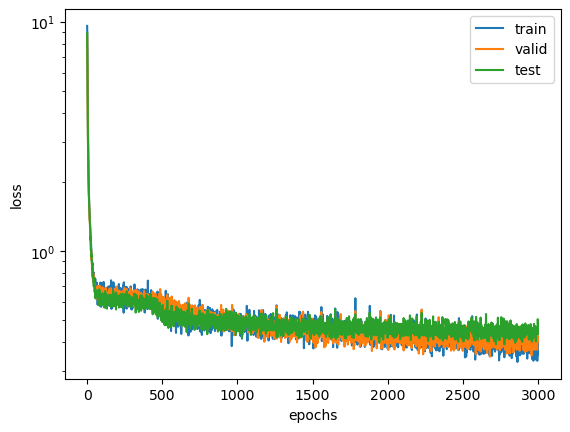

[I 2023-07-15 13:52:44,412] Trial 51 finished with value: 0.4209942636290459 and parameters: {'hidden_channels': 256, 'num_layers': 3, 'num_timesteps': 8, 'dropout': 0.1321122220938681, 'optimizer': 'RMSprop', 'lr': 0.00010658888037044526}. Best is trial 41 with value: 0.3529622639266818.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.556678 valid 8.438096 test 8.489726
Epoch: 020 Loss: train 1.047574 valid 0.989913 test 1.007367
Epoch: 040 Loss: train 0.697178 valid 0.700768 test 0.692017
Epoch: 060 Loss: train 0.618629 valid 0.643525 test 0.575664
Epoch: 080 Loss: train 0.628783 valid 0.603383 test 0.599464
Epoch: 100 Loss: train 0.620999 valid 0.622366 test 0.622071
Epoch: 120 Loss: train 0.636410 valid 0.676323 test 0.587467
Epoch: 140 Loss: train 0.616372 valid 0.612304 test 0.626954
Epoch: 160 Loss: train 0.603396 valid 0.643651 test 0.638123
Epoch: 180 Loss: train 0.605137 valid 0.636245 test 0.588331
Epoch: 200 Loss: train 0.560930 valid 0.625287 test 0.595816
Epoch: 220 Loss: train 0.620138 valid 0.654487 test 0.603234
Epoch: 240 Loss: train 0.590903 valid 0.608901 test 0.586770
Epoch: 260 Loss: train 0.558296 valid 0.606874 test 0.594755
Epoch: 280 Loss: train 0.582229 valid 0.602802 test 0.545708
Epoch: 300 Loss: train 0.556331 valid 0.572836 test 0.534706
Epoch: 320 Loss: train 0

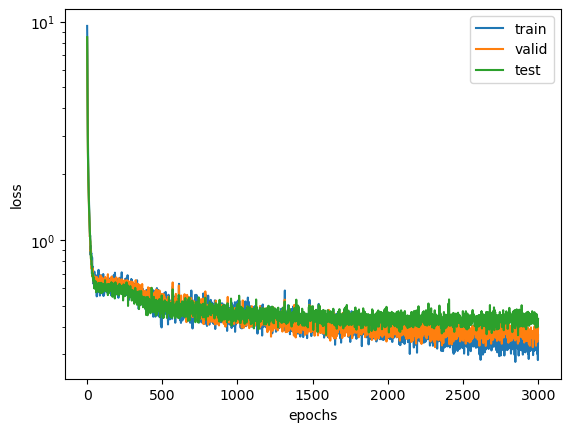

[I 2023-07-15 13:54:07,542] Trial 52 finished with value: 0.38290950129501156 and parameters: {'hidden_channels': 256, 'num_layers': 2, 'num_timesteps': 7, 'dropout': 0.11383952193101794, 'optimizer': 'RMSprop', 'lr': 0.00014919758843546862}. Best is trial 41 with value: 0.3529622639266818.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.471429 valid 8.146177 test 8.211034
Epoch: 020 Loss: train 0.744723 valid 0.675039 test 0.666809
Epoch: 040 Loss: train 0.727089 valid 0.613480 test 0.625160
Epoch: 060 Loss: train 0.659290 valid 0.675150 test 0.607366
Epoch: 080 Loss: train 0.612922 valid 0.631796 test 0.613444
Epoch: 100 Loss: train 0.597426 valid 0.652549 test 0.580832
Epoch: 120 Loss: train 0.608339 valid 0.658269 test 0.612252
Epoch: 140 Loss: train 0.645076 valid 0.618649 test 0.618814
Epoch: 160 Loss: train 0.630057 valid 0.627626 test 0.623121
Epoch: 180 Loss: train 0.603968 valid 0.604579 test 0.580620
Epoch: 200 Loss: train 0.532439 valid 0.624050 test 0.597598
Epoch: 220 Loss: train 0.544024 valid 0.583208 test 0.560854
Epoch: 240 Loss: train 0.579478 valid 0.599250 test 0.522354
Epoch: 260 Loss: train 0.558520 valid 0.565548 test 0.530038
Epoch: 280 Loss: train 0.563303 valid 0.567093 test 0.509669
Epoch: 300 Loss: train 0.510765 valid 0.561545 test 0.534457
Epoch: 320 Loss: train 0

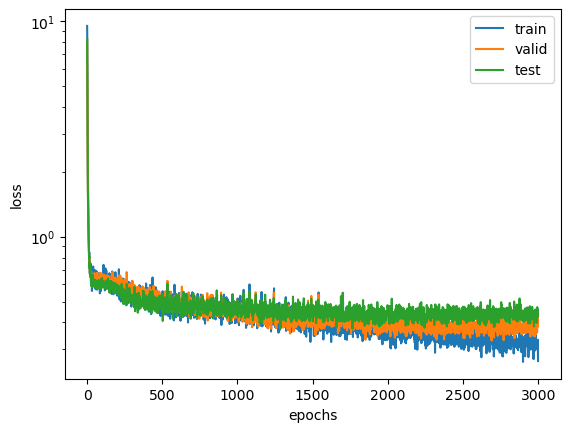

[I 2023-07-15 13:55:39,346] Trial 53 finished with value: 0.3367005705186928 and parameters: {'hidden_channels': 256, 'num_layers': 3, 'num_timesteps': 8, 'dropout': 0.12017039578845647, 'optimizer': 'RMSprop', 'lr': 0.00020155420470032156}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.654983 valid 8.135541 test 8.193166
Epoch: 020 Loss: train 0.650824 valid 0.666454 test 0.600310
Epoch: 040 Loss: train 0.570330 valid 0.642026 test 0.578009
Epoch: 060 Loss: train 0.612183 valid 0.656370 test 0.573844
Epoch: 080 Loss: train 0.692177 valid 0.643752 test 0.583846
Epoch: 100 Loss: train 0.536599 valid 0.612534 test 0.559952
Epoch: 120 Loss: train 0.609122 valid 0.628349 test 0.544658
Epoch: 140 Loss: train 0.567170 valid 0.606504 test 0.583410
Epoch: 160 Loss: train 0.611054 valid 0.571567 test 0.551657
Epoch: 180 Loss: train 0.593230 valid 0.565732 test 0.538741
Epoch: 200 Loss: train 0.545535 valid 0.591884 test 0.531952
Epoch: 220 Loss: train 0.583017 valid 0.577228 test 0.537667
Epoch: 240 Loss: train 0.575198 valid 0.562748 test 0.515410
Epoch: 260 Loss: train 0.471673 valid 0.519537 test 0.482282
Epoch: 280 Loss: train 0.468235 valid 0.518776 test 0.472929
Epoch: 300 Loss: train 0.475523 valid 0.487398 test 0.493597
Epoch: 320 Loss: train 0

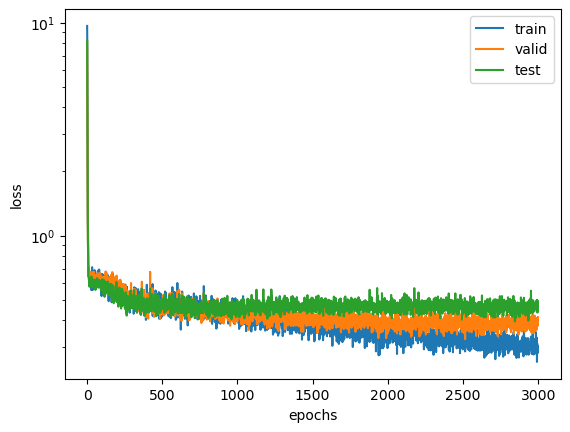

[I 2023-07-15 13:57:13,861] Trial 54 finished with value: 0.3809516854408186 and parameters: {'hidden_channels': 256, 'num_layers': 3, 'num_timesteps': 8, 'dropout': 0.12080971987998726, 'optimizer': 'RMSprop', 'lr': 0.00029723851658313935}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.498740 valid 7.974491 test 8.011474
Epoch: 020 Loss: train 0.632568 valid 0.632345 test 0.647664
Epoch: 040 Loss: train 0.621905 valid 0.620033 test 0.582813
Epoch: 060 Loss: train 0.675280 valid 0.602588 test 0.599441
Epoch: 080 Loss: train 0.671626 valid 0.659078 test 0.603686
Epoch: 100 Loss: train 0.590532 valid 0.644243 test 0.624021
Epoch: 120 Loss: train 0.562540 valid 0.609394 test 0.597546
Epoch: 140 Loss: train 0.579490 valid 0.641108 test 0.559826
Epoch: 160 Loss: train 0.539379 valid 0.632365 test 0.554170
Epoch: 180 Loss: train 0.618003 valid 0.585429 test 0.573943
Epoch: 200 Loss: train 0.617112 valid 0.605073 test 0.560991
Epoch: 220 Loss: train 0.599459 valid 0.564421 test 0.597166
Epoch: 240 Loss: train 0.639091 valid 0.581512 test 0.543261
Epoch: 260 Loss: train 0.581013 valid 0.591777 test 0.519153
Epoch: 280 Loss: train 0.559838 valid 0.583671 test 0.515911
Epoch: 300 Loss: train 0.561793 valid 0.577362 test 0.543141
Epoch: 320 Loss: train 0

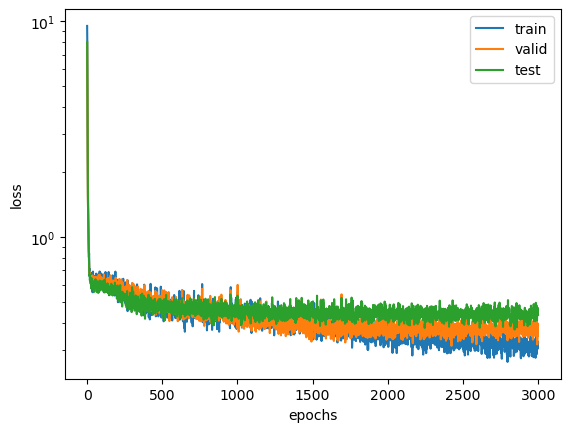

[I 2023-07-15 13:58:41,024] Trial 55 finished with value: 0.3939198642021451 and parameters: {'hidden_channels': 256, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.11118981734605864, 'optimizer': 'RMSprop', 'lr': 0.00020223631424867692}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.472050 valid 9.444941 test 9.523865
Epoch: 020 Loss: train 7.995754 valid 7.888280 test 7.969416
Epoch: 040 Loss: train 6.918306 valid 6.898079 test 6.903845
Epoch: 060 Loss: train 6.400387 valid 6.314273 test 6.355021
Epoch: 080 Loss: train 5.973611 valid 5.940213 test 5.994618
Epoch: 100 Loss: train 5.724511 valid 5.641195 test 5.720187
Epoch: 120 Loss: train 5.467932 valid 5.452335 test 5.460966
Epoch: 140 Loss: train 5.249641 valid 5.242064 test 5.299231
Epoch: 160 Loss: train 5.106078 valid 5.110307 test 5.186866
Epoch: 180 Loss: train 4.919141 valid 4.926822 test 4.965892
Epoch: 200 Loss: train 4.785950 valid 4.810128 test 4.874917
Epoch: 220 Loss: train 4.625982 valid 4.669230 test 4.738034
Epoch: 240 Loss: train 4.568001 valid 4.595053 test 4.617990
Epoch: 260 Loss: train 4.485190 valid 4.510047 test 4.561933
Epoch: 280 Loss: train 4.405763 valid 4.427678 test 4.506409
Epoch: 300 Loss: train 4.355761 valid 4.331194 test 4.403637
Epoch: 320 Loss: train 4

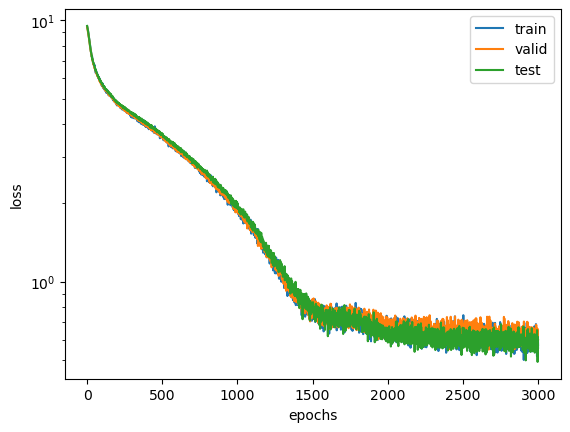

[I 2023-07-15 14:00:08,980] Trial 56 finished with value: 0.6550387517550466 and parameters: {'hidden_channels': 64, 'num_layers': 3, 'num_timesteps': 5, 'dropout': 0.0998633289657097, 'optimizer': 'RMSprop', 'lr': 7.283825057039077e-05}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.595033 valid 8.599986 test 8.674573
Epoch: 020 Loss: train 1.078699 valid 1.056943 test 1.123242
Epoch: 040 Loss: train 0.755069 valid 0.681133 test 0.732497
Epoch: 060 Loss: train 0.638139 valid 0.644021 test 0.628355
Epoch: 080 Loss: train 0.666506 valid 0.637475 test 0.601682
Epoch: 100 Loss: train 0.693383 valid 0.633681 test 0.623341
Epoch: 120 Loss: train 0.592747 valid 0.634046 test 0.605925
Epoch: 140 Loss: train 0.676231 valid 0.642772 test 0.612888
Epoch: 160 Loss: train 0.563527 valid 0.629111 test 0.601655
Epoch: 180 Loss: train 0.633237 valid 0.657589 test 0.563050
Epoch: 200 Loss: train 0.644149 valid 0.623242 test 0.608780
Epoch: 220 Loss: train 0.615239 valid 0.651387 test 0.626565
Epoch: 240 Loss: train 0.628913 valid 0.625274 test 0.629149
Epoch: 260 Loss: train 0.543950 valid 0.666688 test 0.555368
Epoch: 280 Loss: train 0.586516 valid 0.634005 test 0.614348
Epoch: 300 Loss: train 0.603959 valid 0.641716 test 0.599553
Epoch: 320 Loss: train 0

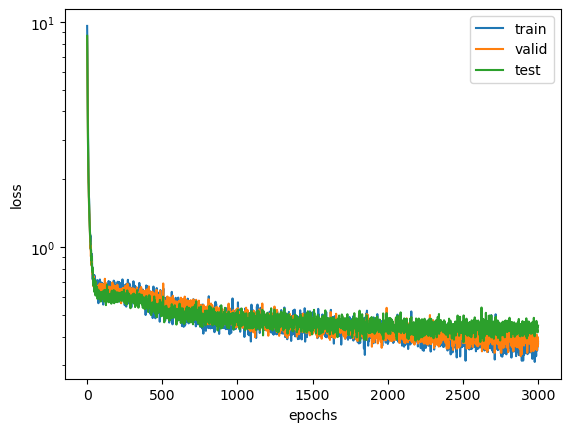

[I 2023-07-15 14:01:33,317] Trial 57 finished with value: 0.39827382139616785 and parameters: {'hidden_channels': 256, 'num_layers': 2, 'num_timesteps': 7, 'dropout': 0.1308042762289846, 'optimizer': 'RMSprop', 'lr': 0.00011207874396715904}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.482521 valid 7.027116 test 7.053939
Epoch: 020 Loss: train 0.625257 valid 0.648917 test 0.602830
Epoch: 040 Loss: train 0.585895 valid 0.591550 test 0.627123
Epoch: 060 Loss: train 0.603616 valid 0.662289 test 0.569760
Epoch: 080 Loss: train 0.583497 valid 0.613997 test 0.588744
Epoch: 100 Loss: train 0.627288 valid 0.604410 test 0.556544
Epoch: 120 Loss: train 0.568058 valid 0.616681 test 0.584475
Epoch: 140 Loss: train 0.599259 valid 0.613222 test 0.548740
Epoch: 160 Loss: train 0.573003 valid 0.550675 test 0.542587
Epoch: 180 Loss: train 0.493115 valid 0.537529 test 0.473075
Epoch: 200 Loss: train 0.586939 valid 0.535617 test 0.506003
Epoch: 220 Loss: train 0.503272 valid 0.536915 test 0.457098
Epoch: 240 Loss: train 0.517201 valid 0.540477 test 0.508597
Epoch: 260 Loss: train 0.502054 valid 0.580872 test 0.501409
Epoch: 280 Loss: train 0.475475 valid 0.534434 test 0.470259
Epoch: 300 Loss: train 0.503164 valid 0.491000 test 0.468705
Epoch: 320 Loss: train 0

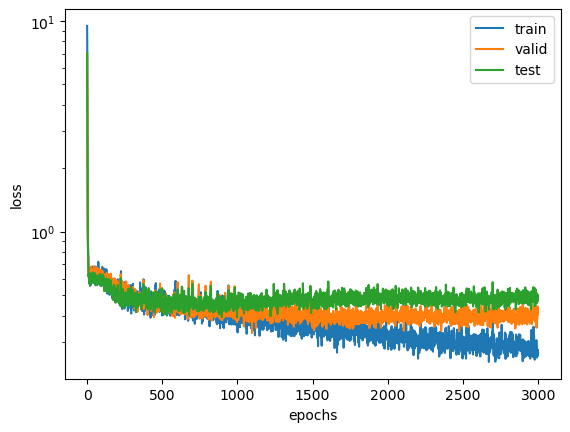

[I 2023-07-15 14:03:07,862] Trial 58 finished with value: 0.40113144021813124 and parameters: {'hidden_channels': 256, 'num_layers': 3, 'num_timesteps': 8, 'dropout': 0.1069745091268796, 'optimizer': 'RMSprop', 'lr': 0.00035824955784415427}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.513533 valid 8.044793 test 8.104198
Epoch: 020 Loss: train 0.643691 valid 0.669668 test 0.644763
Epoch: 040 Loss: train 0.594670 valid 0.642429 test 0.608768
Epoch: 060 Loss: train 0.668286 valid 0.612821 test 0.581374
Epoch: 080 Loss: train 0.662611 valid 0.624236 test 0.567300
Epoch: 100 Loss: train 0.677377 valid 0.621995 test 0.606937
Epoch: 120 Loss: train 0.635685 valid 0.608095 test 0.639560
Epoch: 140 Loss: train 0.597502 valid 0.592368 test 0.577190
Epoch: 160 Loss: train 0.592387 valid 0.641068 test 0.586763
Epoch: 180 Loss: train 0.484410 valid 0.629442 test 0.589982
Epoch: 200 Loss: train 0.583443 valid 0.628033 test 0.588437
Epoch: 220 Loss: train 0.558267 valid 0.610484 test 0.527566
Epoch: 240 Loss: train 0.588962 valid 0.546780 test 0.542401
Epoch: 260 Loss: train 0.665161 valid 0.612551 test 0.523219
Epoch: 280 Loss: train 0.559188 valid 0.557539 test 0.521107
Epoch: 300 Loss: train 0.501623 valid 0.570884 test 0.577542
Epoch: 320 Loss: train 0

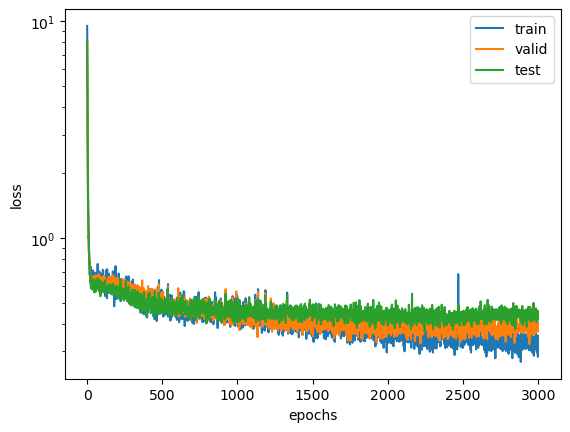

[I 2023-07-15 14:04:30,346] Trial 59 finished with value: 0.38575385017798586 and parameters: {'hidden_channels': 256, 'num_layers': 2, 'num_timesteps': 6, 'dropout': 0.12293336985244388, 'optimizer': 'RMSprop', 'lr': 0.0001908488493224824}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.515390 valid 9.291266 test 9.367758
Epoch: 020 Loss: train 1.019164 valid 0.955204 test 0.950385
Epoch: 040 Loss: train 0.776702 valid 0.785545 test 0.711957
Epoch: 060 Loss: train 0.630399 valid 0.656110 test 0.622969
Epoch: 080 Loss: train 0.693674 valid 0.688202 test 0.635315
Epoch: 100 Loss: train 0.711066 valid 0.671606 test 0.639714
Epoch: 120 Loss: train 0.638770 valid 0.630625 test 0.617932
Epoch: 140 Loss: train 0.677663 valid 0.681537 test 0.578974
Epoch: 160 Loss: train 0.595297 valid 0.675370 test 0.634529
Epoch: 180 Loss: train 0.591655 valid 0.604538 test 0.575396
Epoch: 200 Loss: train 0.692445 valid 0.673233 test 0.577254
Epoch: 220 Loss: train 0.639411 valid 0.619532 test 0.627662
Epoch: 240 Loss: train 0.626407 valid 0.643267 test 0.564147
Epoch: 260 Loss: train 0.620625 valid 0.586232 test 0.601953
Epoch: 280 Loss: train 0.557037 valid 0.622218 test 0.555652
Epoch: 300 Loss: train 0.579991 valid 0.587135 test 0.547640
Epoch: 320 Loss: train 0

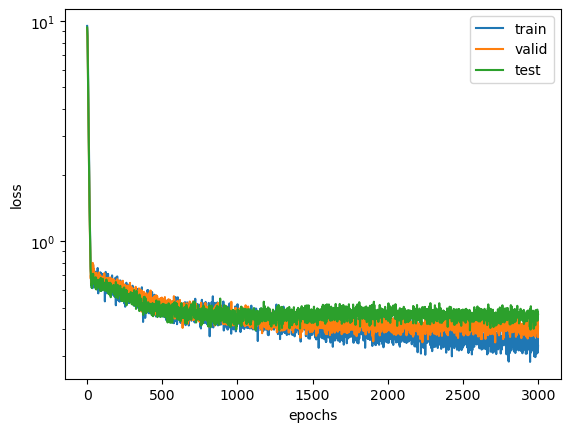

[I 2023-07-15 14:06:09,846] Trial 60 finished with value: 0.3888957883224127 and parameters: {'hidden_channels': 256, 'num_layers': 4, 'num_timesteps': 7, 'dropout': 0.1282949545110899, 'optimizer': 'Adam', 'lr': 0.0005901920108152396}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.485035 valid 8.761221 test 8.832054
Epoch: 020 Loss: train 0.912462 valid 0.867879 test 0.912823
Epoch: 040 Loss: train 0.661440 valid 0.692707 test 0.602804
Epoch: 060 Loss: train 0.714709 valid 0.624542 test 0.596222
Epoch: 080 Loss: train 0.607606 valid 0.607872 test 0.575785
Epoch: 100 Loss: train 0.611741 valid 0.640957 test 0.592638
Epoch: 120 Loss: train 0.629601 valid 0.639812 test 0.620983
Epoch: 140 Loss: train 0.639910 valid 0.641660 test 0.596665
Epoch: 160 Loss: train 0.629188 valid 0.655340 test 0.596904
Epoch: 180 Loss: train 0.659862 valid 0.630932 test 0.587598
Epoch: 200 Loss: train 0.700967 valid 0.644393 test 0.578297
Epoch: 220 Loss: train 0.616760 valid 0.602150 test 0.607380
Epoch: 240 Loss: train 0.658865 valid 0.637329 test 0.610619
Epoch: 260 Loss: train 0.632778 valid 0.598904 test 0.590348
Epoch: 280 Loss: train 0.638745 valid 0.613192 test 0.597061
Epoch: 300 Loss: train 0.616681 valid 0.619457 test 0.583376
Epoch: 320 Loss: train 0

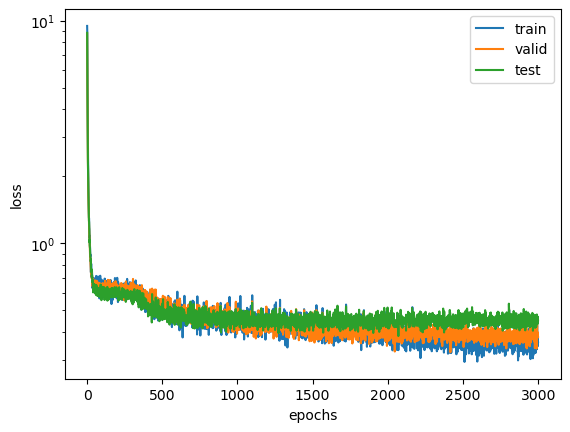

[I 2023-07-15 14:08:05,455] Trial 61 finished with value: 0.3796474309830125 and parameters: {'hidden_channels': 256, 'num_layers': 4, 'num_timesteps': 8, 'dropout': 0.11599339909188583, 'optimizer': 'RMSprop', 'lr': 0.0001351971053025921}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.595770 valid 8.884662 test 8.953613
Epoch: 020 Loss: train 1.415968 valid 1.390478 test 1.381995
Epoch: 040 Loss: train 0.935506 valid 0.879948 test 0.888525
Epoch: 060 Loss: train 0.695132 valid 0.745393 test 0.751200
Epoch: 080 Loss: train 0.673618 valid 0.644174 test 0.681761
Epoch: 100 Loss: train 0.646424 valid 0.645939 test 0.622620
Epoch: 120 Loss: train 0.670270 valid 0.653105 test 0.627480
Epoch: 140 Loss: train 0.634891 valid 0.615666 test 0.577775
Epoch: 160 Loss: train 0.640425 valid 0.678041 test 0.624477
Epoch: 180 Loss: train 0.649595 valid 0.648086 test 0.594925
Epoch: 200 Loss: train 0.620500 valid 0.653265 test 0.591646
Epoch: 220 Loss: train 0.644064 valid 0.644924 test 0.608835
Epoch: 240 Loss: train 0.625727 valid 0.612203 test 0.603780
Epoch: 260 Loss: train 0.657387 valid 0.638038 test 0.601531
Epoch: 280 Loss: train 0.605543 valid 0.634177 test 0.609473
Epoch: 300 Loss: train 0.667634 valid 0.601277 test 0.589958
Epoch: 320 Loss: train 0

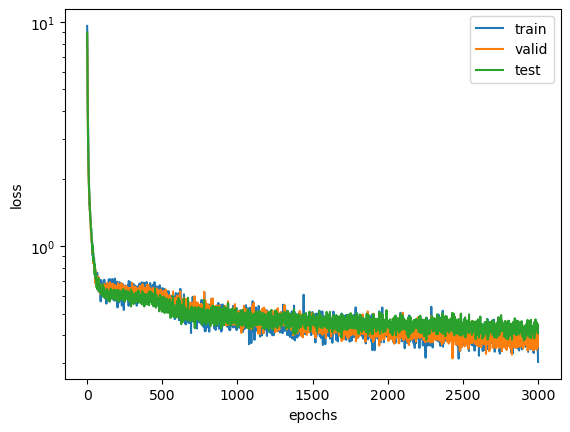

[I 2023-07-15 14:09:56,473] Trial 62 finished with value: 0.382700233729793 and parameters: {'hidden_channels': 256, 'num_layers': 4, 'num_timesteps': 4, 'dropout': 0.11149074500508918, 'optimizer': 'RMSprop', 'lr': 9.18390834391442e-05}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.427962 valid 8.057638 test 8.094078
Epoch: 020 Loss: train 0.624715 valid 0.644425 test 0.606727
Epoch: 040 Loss: train 0.653924 valid 0.632319 test 0.586959
Epoch: 060 Loss: train 0.611479 valid 0.607327 test 0.589838
Epoch: 080 Loss: train 0.577942 valid 0.594479 test 0.588307
Epoch: 100 Loss: train 0.643901 valid 0.637238 test 0.585468
Epoch: 120 Loss: train 0.623544 valid 0.616200 test 0.532657
Epoch: 140 Loss: train 0.632331 valid 0.606081 test 0.540154
Epoch: 160 Loss: train 0.642949 valid 0.638201 test 0.572346
Epoch: 180 Loss: train 0.604503 valid 0.598826 test 0.532989
Epoch: 200 Loss: train 0.573930 valid 0.582367 test 0.538863
Epoch: 220 Loss: train 0.532206 valid 0.581042 test 0.581581
Epoch: 240 Loss: train 0.518607 valid 0.571197 test 0.517769
Epoch: 260 Loss: train 0.531630 valid 0.568478 test 0.502280
Epoch: 280 Loss: train 0.523609 valid 0.529565 test 0.501419
Epoch: 300 Loss: train 0.525947 valid 0.524574 test 0.468923
Epoch: 320 Loss: train 0

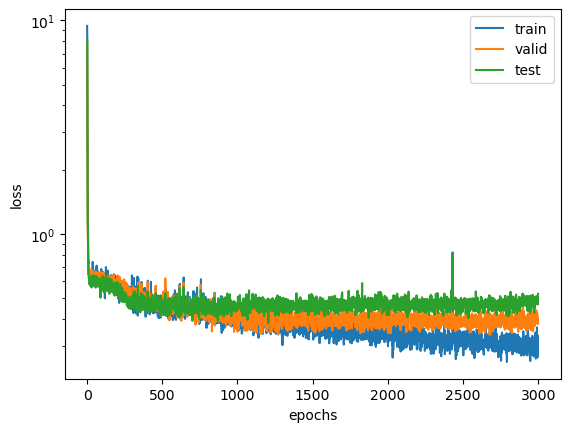

[I 2023-07-15 14:11:28,547] Trial 63 finished with value: 0.3887505624252326 and parameters: {'hidden_channels': 256, 'num_layers': 4, 'num_timesteps': 5, 'dropout': 0.12126030553186999, 'optimizer': 'RMSprop', 'lr': 0.0002678043146568246}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.605050 valid 9.487750 test 9.562480
Epoch: 020 Loss: train 6.735879 valid 6.620916 test 6.701368
Epoch: 040 Loss: train 5.691620 valid 5.658754 test 5.706065
Epoch: 060 Loss: train 5.209969 valid 5.168917 test 5.251273
Epoch: 080 Loss: train 4.878185 valid 4.830741 test 4.925998
Epoch: 100 Loss: train 4.607109 valid 4.562412 test 4.682374
Epoch: 120 Loss: train 4.352390 valid 4.367875 test 4.467268
Epoch: 140 Loss: train 4.149190 valid 4.130918 test 4.233733
Epoch: 160 Loss: train 4.048879 valid 3.960851 test 4.004818
Epoch: 180 Loss: train 3.771646 valid 3.786263 test 3.826975
Epoch: 200 Loss: train 3.614125 valid 3.643140 test 3.659659
Epoch: 220 Loss: train 3.458120 valid 3.463895 test 3.480190
Epoch: 240 Loss: train 3.272014 valid 3.272737 test 3.357852
Epoch: 260 Loss: train 3.138357 valid 3.122828 test 3.192190
Epoch: 280 Loss: train 3.041588 valid 2.982444 test 3.024641
Epoch: 300 Loss: train 2.909032 valid 2.918554 test 2.922959
Epoch: 320 Loss: train 2

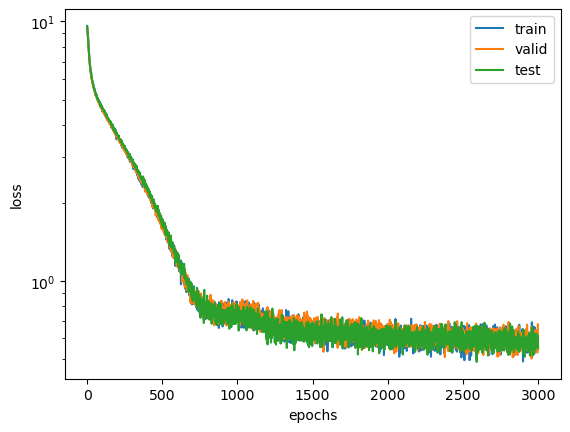

[I 2023-07-15 14:14:27,461] Trial 64 finished with value: 0.617180960884227 and parameters: {'hidden_channels': 64, 'num_layers': 3, 'num_timesteps': 7, 'dropout': 0.11579393134974236, 'optimizer': 'RMSprop', 'lr': 0.0001426543947913196}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.621316 valid 7.200680 test 7.246820
Epoch: 020 Loss: train 0.609224 valid 0.606025 test 0.571734
Epoch: 040 Loss: train 0.613900 valid 0.602945 test 0.561239
Epoch: 060 Loss: train 0.676273 valid 0.621377 test 0.608768
Epoch: 080 Loss: train 0.605912 valid 0.609536 test 0.548075
Epoch: 100 Loss: train 0.566146 valid 0.618914 test 0.571164
Epoch: 120 Loss: train 0.533224 valid 0.571389 test 0.555766
Epoch: 140 Loss: train 0.516898 valid 0.581433 test 0.532597
Epoch: 160 Loss: train 0.559984 valid 0.663300 test 0.602263
Epoch: 180 Loss: train 0.562441 valid 0.554975 test 0.497677
Epoch: 200 Loss: train 0.513334 valid 0.528932 test 0.521225
Epoch: 220 Loss: train 0.566175 valid 0.566653 test 0.487512
Epoch: 240 Loss: train 0.449549 valid 0.546674 test 0.435575
Epoch: 260 Loss: train 0.467379 valid 0.495234 test 0.464547
Epoch: 280 Loss: train 0.520740 valid 0.495921 test 0.458844
Epoch: 300 Loss: train 0.438904 valid 0.506788 test 0.436207
Epoch: 320 Loss: train 0

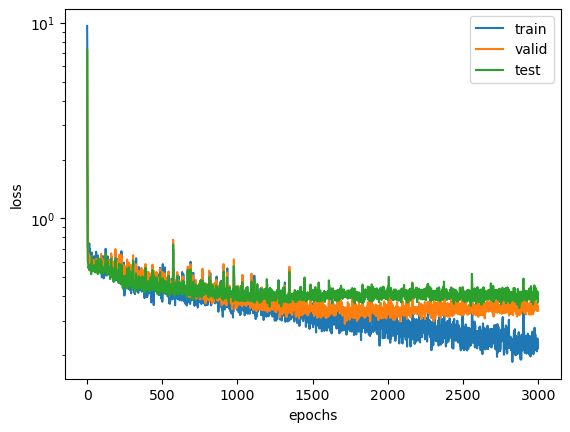

[I 2023-07-15 14:18:06,070] Trial 65 finished with value: 0.35473175367013793 and parameters: {'hidden_channels': 1024, 'num_layers': 3, 'num_timesteps': 8, 'dropout': 0.10186092318867809, 'optimizer': 'RMSprop', 'lr': 5.744853570036461e-05}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.545114 valid 9.200150 test 9.277367
Epoch: 020 Loss: train 1.144516 valid 1.238482 test 1.122271
Epoch: 040 Loss: train 0.746260 valid 0.774262 test 0.791097
Epoch: 060 Loss: train 0.708585 valid 0.612359 test 0.585873
Epoch: 080 Loss: train 0.651573 valid 0.584671 test 0.580192
Epoch: 100 Loss: train 0.619029 valid 0.603722 test 0.560690
Epoch: 120 Loss: train 0.586796 valid 0.581037 test 0.574562
Epoch: 140 Loss: train 0.569674 valid 0.597623 test 0.576018
Epoch: 160 Loss: train 0.649030 valid 0.573444 test 0.535242
Epoch: 180 Loss: train 0.602063 valid 0.588125 test 0.540571
Epoch: 200 Loss: train 0.559447 valid 0.601238 test 0.534344
Epoch: 220 Loss: train 0.594429 valid 0.578865 test 0.547581
Epoch: 240 Loss: train 0.499977 valid 0.590543 test 0.506130
Epoch: 260 Loss: train 0.514012 valid 0.545193 test 0.524969
Epoch: 280 Loss: train 0.479357 valid 0.566606 test 0.493652
Epoch: 300 Loss: train 0.551998 valid 0.568267 test 0.505435
Epoch: 320 Loss: train 0

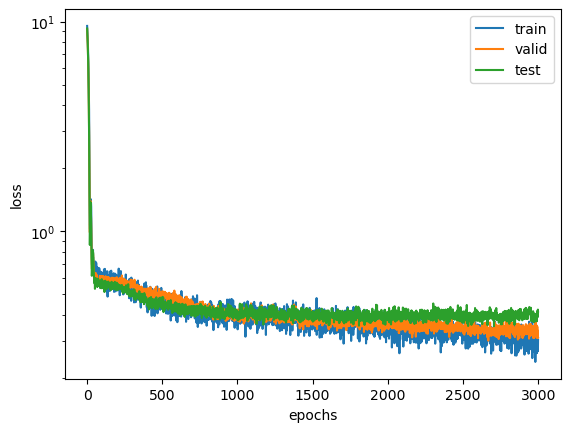

[I 2023-07-15 14:21:36,451] Trial 66 finished with value: 0.3488436771920774 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.0945360251248366, 'optimizer': 'AdamW', 'lr': 5.141779772461108e-05}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.555817 valid 6.536344 test 6.563867
Epoch: 020 Loss: train 0.609321 valid 0.604355 test 0.558922
Epoch: 040 Loss: train 0.592895 valid 0.568648 test 0.537248
Epoch: 060 Loss: train 0.598966 valid 0.571955 test 0.546680
Epoch: 080 Loss: train 0.571007 valid 0.600456 test 0.527205
Epoch: 100 Loss: train 0.564705 valid 0.601909 test 0.515498
Epoch: 120 Loss: train 0.561142 valid 0.579054 test 0.499696
Epoch: 140 Loss: train 0.583350 valid 0.590872 test 0.521855
Epoch: 160 Loss: train 0.515653 valid 0.556947 test 0.503973
Epoch: 180 Loss: train 0.515664 valid 0.542919 test 0.450138
Epoch: 200 Loss: train 0.515609 valid 0.565066 test 0.501170
Epoch: 220 Loss: train 0.459277 valid 0.508921 test 0.452004
Epoch: 240 Loss: train 0.480391 valid 0.509280 test 0.459137
Epoch: 260 Loss: train 0.478508 valid 0.525684 test 0.467182
Epoch: 280 Loss: train 0.431960 valid 0.526059 test 0.444557
Epoch: 300 Loss: train 0.456394 valid 0.507092 test 0.455943
Epoch: 320 Loss: train 0

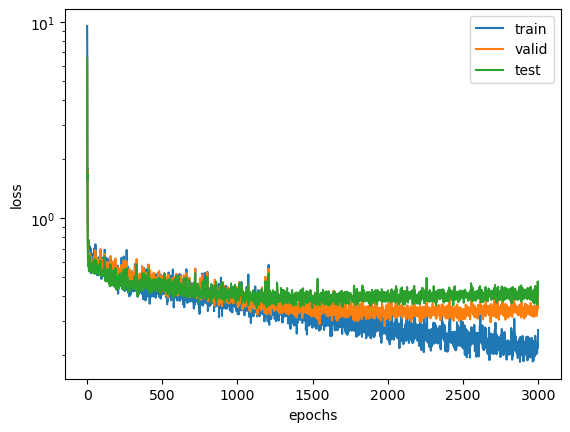

[I 2023-07-15 14:25:03,585] Trial 67 finished with value: 0.3679069460332075 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.10031338945531754, 'optimizer': 'RMSprop', 'lr': 5.853505344978303e-05}. Best is trial 53 with value: 0.3367005705186928.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.552113 valid 9.361355 test 9.437967
Epoch: 020 Loss: train 3.404806 valid 2.988594 test 2.874414
Epoch: 040 Loss: train 1.040861 valid 0.907193 test 0.842679
Epoch: 060 Loss: train 0.669499 valid 0.668559 test 0.622710
Epoch: 080 Loss: train 0.639475 valid 0.621678 test 0.524024
Epoch: 100 Loss: train 0.716985 valid 0.603293 test 0.606180
Epoch: 120 Loss: train 0.676217 valid 0.601936 test 0.560039
Epoch: 140 Loss: train 0.487303 valid 0.589163 test 0.557740
Epoch: 160 Loss: train 0.602305 valid 0.586696 test 0.543532
Epoch: 180 Loss: train 0.624434 valid 0.584370 test 0.537558
Epoch: 200 Loss: train 0.607474 valid 0.588543 test 0.539933
Epoch: 220 Loss: train 0.582512 valid 0.609165 test 0.548553
Epoch: 240 Loss: train 0.566855 valid 0.584413 test 0.551684
Epoch: 260 Loss: train 0.620006 valid 0.575790 test 0.511955
Epoch: 280 Loss: train 0.563439 valid 0.578991 test 0.531473
Epoch: 300 Loss: train 0.550753 valid 0.583815 test 0.525284
Epoch: 320 Loss: train 0

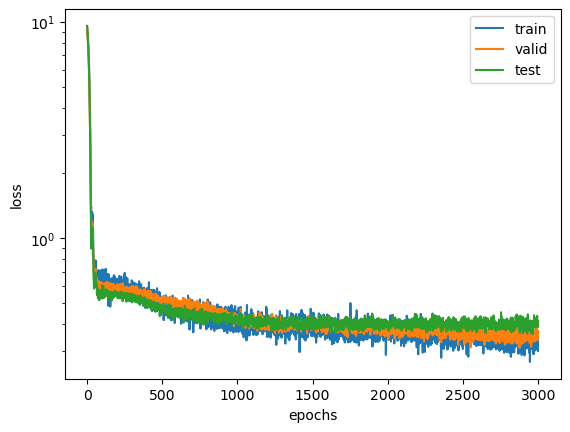

[I 2023-07-15 14:27:39,741] Trial 68 finished with value: 0.32201217448622677 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.09243902282259868, 'optimizer': 'AdamW', 'lr': 3.213603859024869e-05}. Best is trial 68 with value: 0.32201217448622677.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.472465 valid 9.227922 test 9.305965
Epoch: 020 Loss: train 2.343933 valid 2.004954 test 1.879033
Epoch: 040 Loss: train 0.635920 valid 0.718494 test 0.638706
Epoch: 060 Loss: train 0.603634 valid 0.615096 test 0.560691
Epoch: 080 Loss: train 0.613648 valid 0.612669 test 0.554013
Epoch: 100 Loss: train 0.632171 valid 0.591393 test 0.557982
Epoch: 120 Loss: train 0.639076 valid 0.599389 test 0.560968
Epoch: 140 Loss: train 0.634787 valid 0.596514 test 0.547832
Epoch: 160 Loss: train 0.570365 valid 0.592170 test 0.552495
Epoch: 180 Loss: train 0.584985 valid 0.587112 test 0.557556
Epoch: 200 Loss: train 0.608726 valid 0.587903 test 0.546244
Epoch: 220 Loss: train 0.523579 valid 0.601328 test 0.520774
Epoch: 240 Loss: train 0.548603 valid 0.569966 test 0.548991
Epoch: 260 Loss: train 0.587389 valid 0.572368 test 0.545330
Epoch: 280 Loss: train 0.608729 valid 0.587748 test 0.551333
Epoch: 300 Loss: train 0.617386 valid 0.571515 test 0.538694
Epoch: 320 Loss: train 0

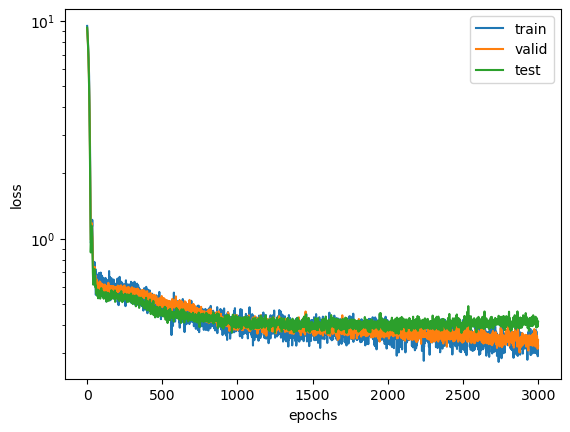

[I 2023-07-15 14:29:58,712] Trial 69 finished with value: 0.3503319376614953 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.09370009644126363, 'optimizer': 'Adam', 'lr': 3.70209172069213e-05}. Best is trial 68 with value: 0.32201217448622677.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.556257 valid 9.308482 test 9.388985
Epoch: 020 Loss: train 3.171379 valid 2.784518 test 2.654374
Epoch: 040 Loss: train 0.932225 valid 0.882265 test 0.801044
Epoch: 060 Loss: train 0.685465 valid 0.659561 test 0.629356
Epoch: 080 Loss: train 0.659948 valid 0.619168 test 0.569314
Epoch: 100 Loss: train 0.629179 valid 0.608774 test 0.556083
Epoch: 120 Loss: train 0.723818 valid 0.596073 test 0.547146
Epoch: 140 Loss: train 0.580941 valid 0.586473 test 0.531094
Epoch: 160 Loss: train 0.602956 valid 0.598871 test 0.542558
Epoch: 180 Loss: train 0.533089 valid 0.602153 test 0.557545
Epoch: 200 Loss: train 0.604206 valid 0.604852 test 0.538598
Epoch: 220 Loss: train 0.590237 valid 0.609598 test 0.532006
Epoch: 240 Loss: train 0.565794 valid 0.575921 test 0.548735
Epoch: 260 Loss: train 0.589467 valid 0.587709 test 0.549370
Epoch: 280 Loss: train 0.570355 valid 0.576685 test 0.522882
Epoch: 300 Loss: train 0.570372 valid 0.580060 test 0.531959
Epoch: 320 Loss: train 0

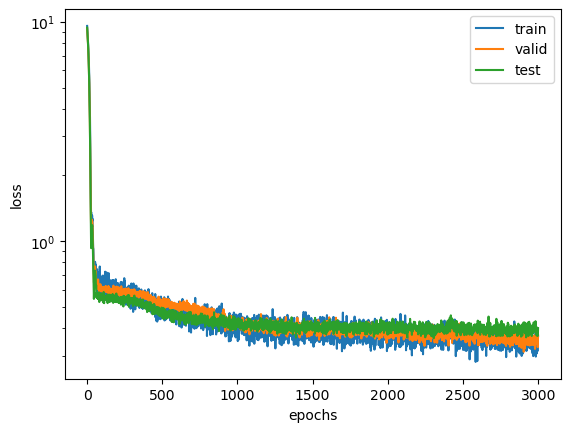

[I 2023-07-15 14:32:14,586] Trial 70 finished with value: 0.34948458423797435 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.09085599361683612, 'optimizer': 'Adam', 'lr': 3.19378425264564e-05}. Best is trial 68 with value: 0.32201217448622677.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.427383 valid 9.198515 test 9.283055
Epoch: 020 Loss: train 2.173137 valid 1.689547 test 1.601000
Epoch: 040 Loss: train 0.730624 valid 0.656794 test 0.589887
Epoch: 060 Loss: train 0.677583 valid 0.581791 test 0.570704
Epoch: 080 Loss: train 0.561780 valid 0.569393 test 0.551654
Epoch: 100 Loss: train 0.561857 valid 0.596394 test 0.541864
Epoch: 120 Loss: train 0.582345 valid 0.593524 test 0.533021
Epoch: 140 Loss: train 0.554446 valid 0.619698 test 0.540776
Epoch: 160 Loss: train 0.648083 valid 0.580099 test 0.559609
Epoch: 180 Loss: train 0.588969 valid 0.565810 test 0.581793
Epoch: 200 Loss: train 0.527585 valid 0.618315 test 0.562577
Epoch: 220 Loss: train 0.633499 valid 0.581902 test 0.521144
Epoch: 240 Loss: train 0.552427 valid 0.590160 test 0.535225
Epoch: 260 Loss: train 0.572129 valid 0.567855 test 0.521221
Epoch: 280 Loss: train 0.577877 valid 0.592690 test 0.521859
Epoch: 300 Loss: train 0.519318 valid 0.569000 test 0.521326
Epoch: 320 Loss: train 0

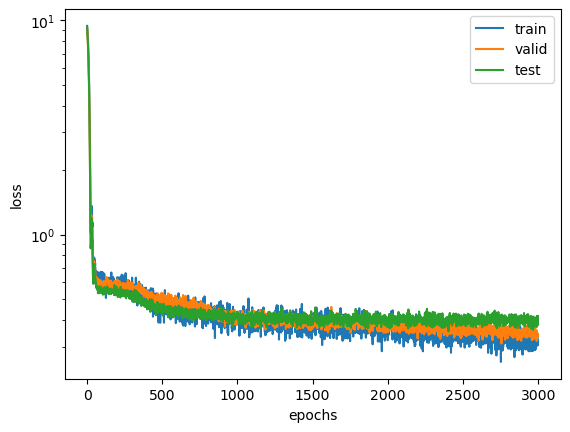

[I 2023-07-15 14:34:30,960] Trial 71 finished with value: 0.3341226079118204 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.09156019311281373, 'optimizer': 'Adam', 'lr': 3.865015480552541e-05}. Best is trial 68 with value: 0.32201217448622677.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.526536 valid 9.273148 test 9.349888
Epoch: 020 Loss: train 2.188749 valid 1.889403 test 1.687320
Epoch: 040 Loss: train 0.619730 valid 0.656904 test 0.635801
Epoch: 060 Loss: train 0.639400 valid 0.629081 test 0.560362
Epoch: 080 Loss: train 0.599012 valid 0.615010 test 0.547748
Epoch: 100 Loss: train 0.546054 valid 0.610094 test 0.569818
Epoch: 120 Loss: train 0.568971 valid 0.604457 test 0.543690
Epoch: 140 Loss: train 0.607951 valid 0.589112 test 0.570168
Epoch: 160 Loss: train 0.640485 valid 0.590363 test 0.561832
Epoch: 180 Loss: train 0.624185 valid 0.590991 test 0.551281
Epoch: 200 Loss: train 0.555294 valid 0.614920 test 0.548729
Epoch: 220 Loss: train 0.608652 valid 0.569276 test 0.538651
Epoch: 240 Loss: train 0.618985 valid 0.606918 test 0.534216
Epoch: 260 Loss: train 0.569307 valid 0.594957 test 0.529864
Epoch: 280 Loss: train 0.533146 valid 0.573454 test 0.528890
Epoch: 300 Loss: train 0.558862 valid 0.561166 test 0.506203
Epoch: 320 Loss: train 0

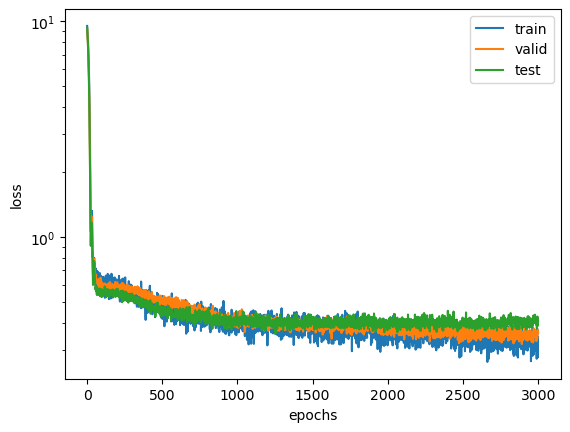

[I 2023-07-15 14:36:46,747] Trial 72 finished with value: 0.3463199927422269 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.0913033271681064, 'optimizer': 'Adam', 'lr': 3.768798411851503e-05}. Best is trial 68 with value: 0.32201217448622677.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.395506 valid 9.171723 test 9.250610
Epoch: 020 Loss: train 2.658410 valid 2.152250 test 2.039112
Epoch: 040 Loss: train 0.851778 valid 0.759502 test 0.716886
Epoch: 060 Loss: train 0.595736 valid 0.620981 test 0.603072
Epoch: 080 Loss: train 0.621015 valid 0.623173 test 0.553578
Epoch: 100 Loss: train 0.581934 valid 0.623959 test 0.551887
Epoch: 120 Loss: train 0.653059 valid 0.593484 test 0.536806
Epoch: 140 Loss: train 0.625176 valid 0.571736 test 0.532470
Epoch: 160 Loss: train 0.640979 valid 0.575849 test 0.548536
Epoch: 180 Loss: train 0.623656 valid 0.595148 test 0.550479
Epoch: 200 Loss: train 0.625080 valid 0.580846 test 0.564304
Epoch: 220 Loss: train 0.560054 valid 0.601061 test 0.552199
Epoch: 240 Loss: train 0.559301 valid 0.579170 test 0.538363
Epoch: 260 Loss: train 0.584931 valid 0.579619 test 0.544833
Epoch: 280 Loss: train 0.592351 valid 0.566856 test 0.544260
Epoch: 300 Loss: train 0.531927 valid 0.578958 test 0.522086
Epoch: 320 Loss: train 0

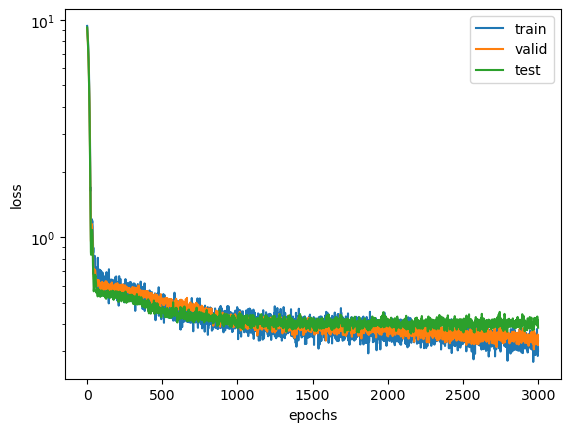

[I 2023-07-15 14:39:03,009] Trial 73 finished with value: 0.32477064470824263 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.09226319652792445, 'optimizer': 'Adam', 'lr': 3.507438950499156e-05}. Best is trial 68 with value: 0.32201217448622677.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.543573 valid 9.304226 test 9.385278
Epoch: 020 Loss: train 3.214235 valid 2.711618 test 2.597287
Epoch: 040 Loss: train 1.020431 valid 0.821208 test 0.777441
Epoch: 060 Loss: train 0.745865 valid 0.668392 test 0.580278
Epoch: 080 Loss: train 0.617824 valid 0.597400 test 0.534309
Epoch: 100 Loss: train 0.556468 valid 0.601194 test 0.544548
Epoch: 120 Loss: train 0.607506 valid 0.592617 test 0.553678
Epoch: 140 Loss: train 0.627301 valid 0.607925 test 0.551294
Epoch: 160 Loss: train 0.593516 valid 0.596061 test 0.519851
Epoch: 180 Loss: train 0.595535 valid 0.590205 test 0.543053
Epoch: 200 Loss: train 0.618294 valid 0.587408 test 0.532943
Epoch: 220 Loss: train 0.667487 valid 0.578761 test 0.535103
Epoch: 240 Loss: train 0.645184 valid 0.588453 test 0.531514
Epoch: 260 Loss: train 0.492209 valid 0.563983 test 0.517492
Epoch: 280 Loss: train 0.601685 valid 0.554436 test 0.508960
Epoch: 300 Loss: train 0.610027 valid 0.589154 test 0.511737
Epoch: 320 Loss: train 0

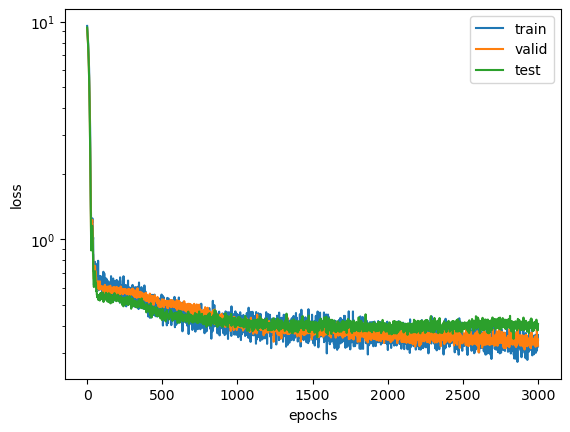

[I 2023-07-15 14:41:19,330] Trial 74 finished with value: 0.3130108845139375 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.08006409975010725, 'optimizer': 'Adam', 'lr': 3.317692885284287e-05}. Best is trial 74 with value: 0.3130108845139375.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.560878 valid 9.395746 test 9.472705
Epoch: 020 Loss: train 5.797430 valid 5.564474 test 5.564464
Epoch: 040 Loss: train 1.120243 valid 1.091605 test 1.010232
Epoch: 060 Loss: train 0.743578 valid 0.648576 test 0.575239
Epoch: 080 Loss: train 0.630139 valid 0.654696 test 0.568696
Epoch: 100 Loss: train 0.602944 valid 0.616607 test 0.556789
Epoch: 120 Loss: train 0.780786 valid 0.636614 test 0.546970
Epoch: 140 Loss: train 0.698647 valid 0.619084 test 0.535808
Epoch: 160 Loss: train 0.650372 valid 0.599396 test 0.574461
Epoch: 180 Loss: train 0.643241 valid 0.579188 test 0.523220
Epoch: 200 Loss: train 0.595884 valid 0.593796 test 0.534350
Epoch: 220 Loss: train 0.613621 valid 0.601049 test 0.535546
Epoch: 240 Loss: train 0.628603 valid 0.582248 test 0.547356
Epoch: 260 Loss: train 0.587944 valid 0.583359 test 0.541922
Epoch: 280 Loss: train 0.530146 valid 0.601672 test 0.543635
Epoch: 300 Loss: train 0.598320 valid 0.568580 test 0.534964
Epoch: 320 Loss: train 0

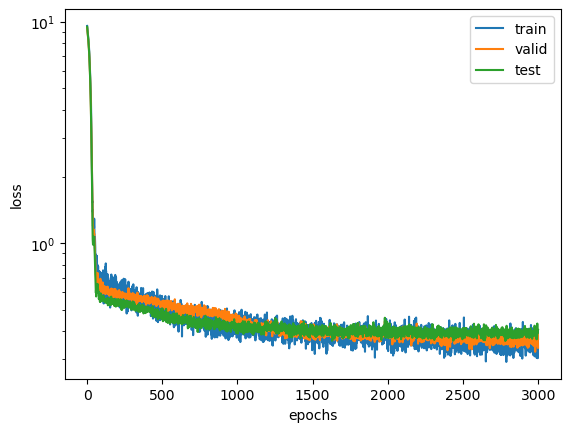

[I 2023-07-15 14:43:35,075] Trial 75 finished with value: 0.3556998677562167 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.07903566042145513, 'optimizer': 'Adam', 'lr': 2.1916701781554643e-05}. Best is trial 74 with value: 0.3130108845139375.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.524802 valid 9.394212 test 9.475587
Epoch: 020 Loss: train 6.517621 valid 6.228982 test 6.234393
Epoch: 040 Loss: train 1.870490 valid 1.722489 test 1.493431
Epoch: 060 Loss: train 0.963485 valid 0.946693 test 0.863742
Epoch: 080 Loss: train 0.768146 valid 0.729544 test 0.630423
Epoch: 100 Loss: train 0.665319 valid 0.682652 test 0.579278
Epoch: 120 Loss: train 0.733058 valid 0.660656 test 0.553703
Epoch: 140 Loss: train 0.731379 valid 0.646387 test 0.562308
Epoch: 160 Loss: train 0.734830 valid 0.603742 test 0.521979
Epoch: 180 Loss: train 0.657368 valid 0.593106 test 0.549248
Epoch: 200 Loss: train 0.590186 valid 0.590180 test 0.507420
Epoch: 220 Loss: train 0.566181 valid 0.591908 test 0.539168
Epoch: 240 Loss: train 0.642787 valid 0.599673 test 0.523337
Epoch: 260 Loss: train 0.589412 valid 0.596990 test 0.534784
Epoch: 280 Loss: train 0.546839 valid 0.586894 test 0.524005
Epoch: 300 Loss: train 0.507365 valid 0.589601 test 0.532781
Epoch: 320 Loss: train 0

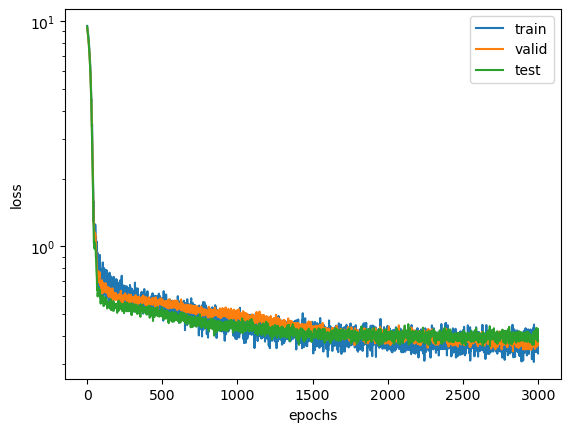

[I 2023-07-15 14:45:50,895] Trial 76 finished with value: 0.3690257724885876 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.08510523508372493, 'optimizer': 'Adam', 'lr': 1.7967993881863724e-05}. Best is trial 74 with value: 0.3130108845139375.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.555374 valid 9.316687 test 9.394789
Epoch: 020 Loss: train 3.683951 valid 3.259429 test 3.153422
Epoch: 040 Loss: train 1.011586 valid 0.989599 test 0.932245
Epoch: 060 Loss: train 0.688824 valid 0.685499 test 0.666105
Epoch: 080 Loss: train 0.632494 valid 0.643135 test 0.548386
Epoch: 100 Loss: train 0.636951 valid 0.614328 test 0.519201
Epoch: 120 Loss: train 0.589373 valid 0.602829 test 0.555658
Epoch: 140 Loss: train 0.628149 valid 0.599771 test 0.548483
Epoch: 160 Loss: train 0.619574 valid 0.617054 test 0.540015
Epoch: 180 Loss: train 0.569535 valid 0.587770 test 0.539513
Epoch: 200 Loss: train 0.626388 valid 0.584226 test 0.543003
Epoch: 220 Loss: train 0.618914 valid 0.599974 test 0.550937
Epoch: 240 Loss: train 0.559438 valid 0.604614 test 0.517944
Epoch: 260 Loss: train 0.567316 valid 0.582925 test 0.554634
Epoch: 280 Loss: train 0.547089 valid 0.590247 test 0.519807
Epoch: 300 Loss: train 0.609545 valid 0.585254 test 0.511164
Epoch: 320 Loss: train 0

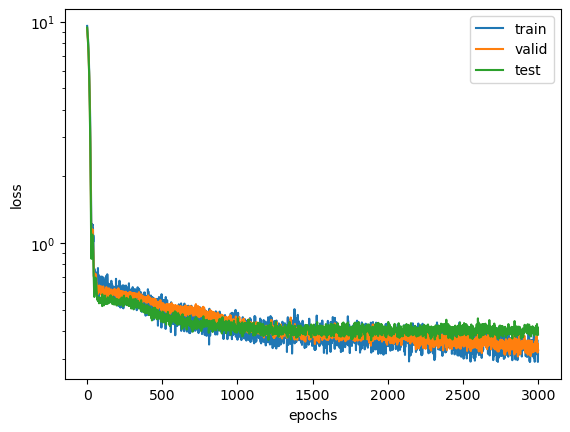

[I 2023-07-15 14:48:06,171] Trial 77 finished with value: 0.3426904041064674 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.09232771144009452, 'optimizer': 'Adam', 'lr': 3.212808382868951e-05}. Best is trial 74 with value: 0.3130108845139375.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.532528 valid 9.231792 test 9.316609
Epoch: 020 Loss: train 1.610494 valid 1.219828 test 1.121552
Epoch: 040 Loss: train 0.726897 valid 0.700209 test 0.685540
Epoch: 060 Loss: train 0.674496 valid 0.597356 test 0.582967
Epoch: 080 Loss: train 0.624254 valid 0.596900 test 0.559757
Epoch: 100 Loss: train 0.664596 valid 0.599593 test 0.574271
Epoch: 120 Loss: train 0.651941 valid 0.582977 test 0.544049
Epoch: 140 Loss: train 0.571833 valid 0.583059 test 0.542974
Epoch: 160 Loss: train 0.606739 valid 0.595512 test 0.561934
Epoch: 180 Loss: train 0.547390 valid 0.572880 test 0.522392
Epoch: 200 Loss: train 0.572341 valid 0.562890 test 0.548630
Epoch: 220 Loss: train 0.581311 valid 0.582525 test 0.526280
Epoch: 240 Loss: train 0.659159 valid 0.576268 test 0.527399
Epoch: 260 Loss: train 0.528321 valid 0.575772 test 0.511130
Epoch: 280 Loss: train 0.545129 valid 0.558068 test 0.509331
Epoch: 300 Loss: train 0.507528 valid 0.566710 test 0.517983
Epoch: 320 Loss: train 0

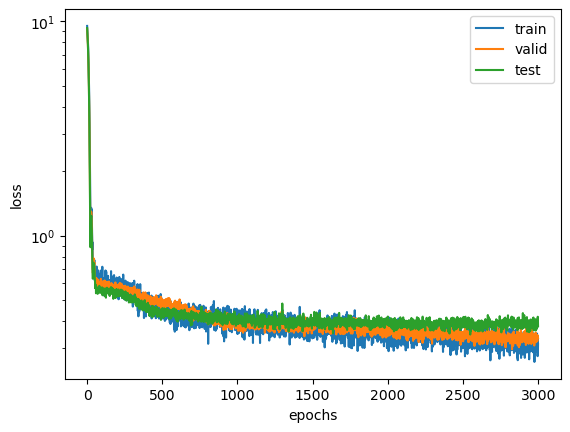

[I 2023-07-15 14:50:22,636] Trial 78 finished with value: 0.3116599692717692 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.07956772065431543, 'optimizer': 'Adam', 'lr': 4.1846690779740916e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.602477 valid 9.526744 test 9.609042
Epoch: 020 Loss: train 8.055754 valid 7.821262 test 7.883710
Epoch: 040 Loss: train 5.264833 valid 5.003026 test 4.957716
Epoch: 060 Loss: train 2.028681 valid 1.925633 test 1.720144
Epoch: 080 Loss: train 1.238067 valid 1.126844 test 0.946038
Epoch: 100 Loss: train 0.895566 valid 0.822941 test 0.712538
Epoch: 120 Loss: train 0.658733 valid 0.740299 test 0.651189
Epoch: 140 Loss: train 0.650601 valid 0.708967 test 0.611640
Epoch: 160 Loss: train 0.728039 valid 0.700382 test 0.602932
Epoch: 180 Loss: train 0.821148 valid 0.624547 test 0.557337
Epoch: 200 Loss: train 0.622755 valid 0.622486 test 0.547284
Epoch: 220 Loss: train 0.705212 valid 0.623231 test 0.541708
Epoch: 240 Loss: train 0.755088 valid 0.609173 test 0.531935
Epoch: 260 Loss: train 0.722127 valid 0.602231 test 0.555640
Epoch: 280 Loss: train 0.626666 valid 0.620585 test 0.533961
Epoch: 300 Loss: train 0.572106 valid 0.610672 test 0.539826
Epoch: 320 Loss: train 0

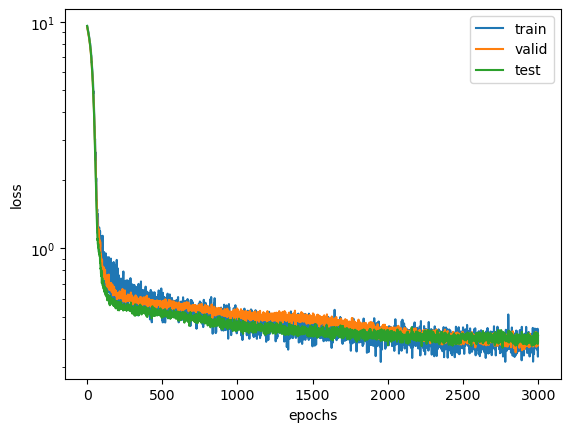

[I 2023-07-15 14:52:38,780] Trial 79 finished with value: 0.3913830287968098 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.07246507916750089, 'optimizer': 'Adam', 'lr': 1.1591334686813887e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.481831 valid 9.311838 test 9.384136
Epoch: 020 Loss: train 4.450215 valid 3.991095 test 3.911178
Epoch: 040 Loss: train 1.174572 valid 1.059405 test 0.999093
Epoch: 060 Loss: train 0.740391 valid 0.676585 test 0.661440
Epoch: 080 Loss: train 0.648376 valid 0.620599 test 0.552124
Epoch: 100 Loss: train 0.748359 valid 0.596433 test 0.548181
Epoch: 120 Loss: train 0.610384 valid 0.579516 test 0.526633
Epoch: 140 Loss: train 0.624072 valid 0.608832 test 0.523908
Epoch: 160 Loss: train 0.667249 valid 0.566577 test 0.544747
Epoch: 180 Loss: train 0.535504 valid 0.586130 test 0.535559
Epoch: 200 Loss: train 0.580450 valid 0.580956 test 0.522406
Epoch: 220 Loss: train 0.524516 valid 0.578113 test 0.531863
Epoch: 240 Loss: train 0.580149 valid 0.586965 test 0.535811
Epoch: 260 Loss: train 0.604910 valid 0.571892 test 0.537354
Epoch: 280 Loss: train 0.546501 valid 0.574927 test 0.525398
Epoch: 300 Loss: train 0.564324 valid 0.577629 test 0.520608
Epoch: 320 Loss: train 0

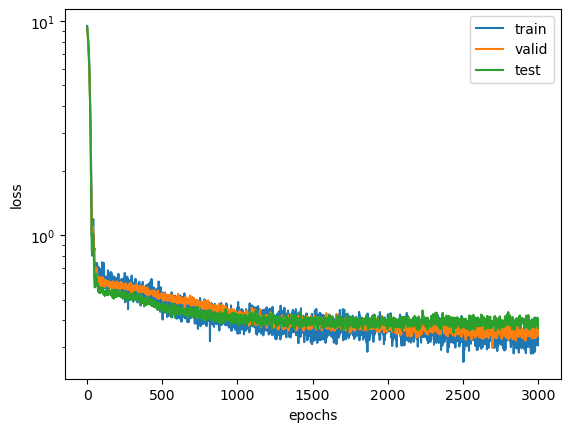

[I 2023-07-15 14:54:54,570] Trial 80 finished with value: 0.3325443917327116 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.06815963903345548, 'optimizer': 'Adam', 'lr': 2.8742542664401212e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.587960 valid 9.318261 test 9.387323
Epoch: 020 Loss: train 1.966279 valid 1.579470 test 1.458320
Epoch: 040 Loss: train 0.694536 valid 0.667409 test 0.627257
Epoch: 060 Loss: train 0.604084 valid 0.598030 test 0.551902
Epoch: 080 Loss: train 0.645897 valid 0.611470 test 0.542290
Epoch: 100 Loss: train 0.537901 valid 0.591889 test 0.556377
Epoch: 120 Loss: train 0.583881 valid 0.600170 test 0.554861
Epoch: 140 Loss: train 0.545327 valid 0.577426 test 0.537403
Epoch: 160 Loss: train 0.611212 valid 0.587867 test 0.535197
Epoch: 180 Loss: train 0.514919 valid 0.586279 test 0.507863
Epoch: 200 Loss: train 0.620112 valid 0.588300 test 0.544759
Epoch: 220 Loss: train 0.549119 valid 0.581503 test 0.539429
Epoch: 240 Loss: train 0.559844 valid 0.564206 test 0.497731
Epoch: 260 Loss: train 0.572289 valid 0.563528 test 0.516734
Epoch: 280 Loss: train 0.542524 valid 0.556112 test 0.506710
Epoch: 300 Loss: train 0.574097 valid 0.551500 test 0.528266
Epoch: 320 Loss: train 0

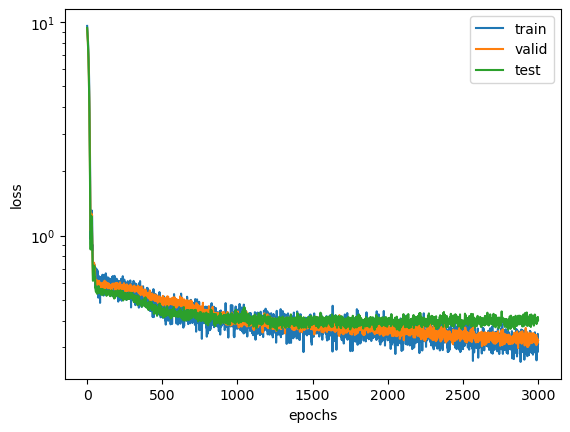

[I 2023-07-15 14:57:17,406] Trial 81 finished with value: 0.3261787501885678 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.06865960805469512, 'optimizer': 'Adam', 'lr': 3.988713511475831e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.470973 valid 9.311853 test 9.387816
Epoch: 020 Loss: train 4.602782 valid 4.410849 test 4.358153
Epoch: 040 Loss: train 1.188312 valid 1.121007 test 1.020069
Epoch: 060 Loss: train 0.802064 valid 0.735215 test 0.631405
Epoch: 080 Loss: train 0.619544 valid 0.629531 test 0.574170
Epoch: 100 Loss: train 0.619478 valid 0.609939 test 0.537509
Epoch: 120 Loss: train 0.624353 valid 0.584326 test 0.524203
Epoch: 140 Loss: train 0.612728 valid 0.583771 test 0.547339
Epoch: 160 Loss: train 0.570487 valid 0.593932 test 0.547707
Epoch: 180 Loss: train 0.604943 valid 0.571686 test 0.519423
Epoch: 200 Loss: train 0.564307 valid 0.572437 test 0.527586
Epoch: 220 Loss: train 0.584381 valid 0.559577 test 0.522705
Epoch: 240 Loss: train 0.573332 valid 0.570788 test 0.534586
Epoch: 260 Loss: train 0.573724 valid 0.576416 test 0.543202
Epoch: 280 Loss: train 0.551777 valid 0.559398 test 0.550901
Epoch: 300 Loss: train 0.551634 valid 0.559475 test 0.504395
Epoch: 320 Loss: train 0

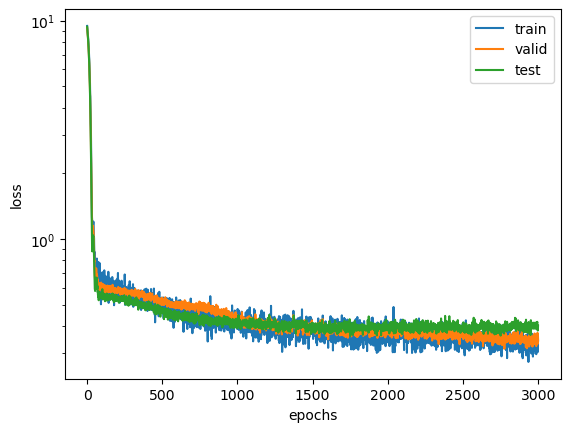

[I 2023-07-15 14:59:36,922] Trial 82 finished with value: 0.3338843159466429 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.06586308739235758, 'optimizer': 'Adam', 'lr': 2.6131331963111857e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.416832 valid 9.280237 test 9.358030
Epoch: 020 Loss: train 6.922583 valid 6.668552 test 6.692394
Epoch: 040 Loss: train 2.435956 valid 2.421155 test 2.268115
Epoch: 060 Loss: train 1.189751 valid 1.096219 test 0.985131
Epoch: 080 Loss: train 0.829954 valid 0.720384 test 0.625325
Epoch: 100 Loss: train 0.746641 valid 0.672020 test 0.573726
Epoch: 120 Loss: train 0.622541 valid 0.625889 test 0.557328
Epoch: 140 Loss: train 0.576751 valid 0.633636 test 0.553552
Epoch: 160 Loss: train 0.661177 valid 0.607739 test 0.553310
Epoch: 180 Loss: train 0.673857 valid 0.623317 test 0.554031
Epoch: 200 Loss: train 0.680034 valid 0.603353 test 0.544931
Epoch: 220 Loss: train 0.720393 valid 0.610480 test 0.549783
Epoch: 240 Loss: train 0.691608 valid 0.569287 test 0.542964
Epoch: 260 Loss: train 0.639237 valid 0.578450 test 0.533110
Epoch: 280 Loss: train 0.568842 valid 0.596741 test 0.549109
Epoch: 300 Loss: train 0.607080 valid 0.573056 test 0.538604
Epoch: 320 Loss: train 0

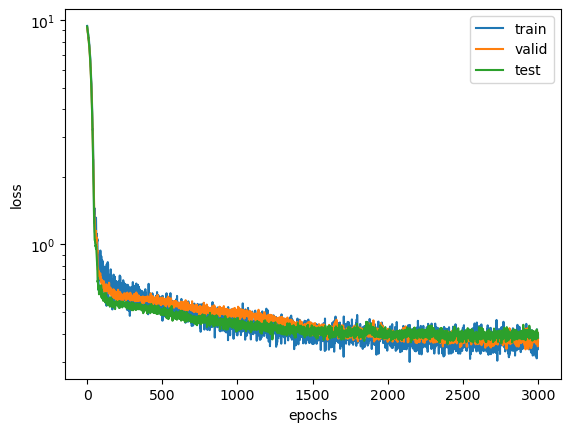

[I 2023-07-15 15:02:35,246] Trial 83 finished with value: 0.3819734437544196 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.06941467078977946, 'optimizer': 'Adam', 'lr': 1.6113686420391935e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.488352 valid 9.280890 test 9.361972
Epoch: 020 Loss: train 4.693771 valid 4.287140 test 4.215306
Epoch: 040 Loss: train 1.208413 valid 1.120528 test 1.071614
Epoch: 060 Loss: train 0.735331 valid 0.702327 test 0.658389
Epoch: 080 Loss: train 0.646184 valid 0.631813 test 0.563360
Epoch: 100 Loss: train 0.652353 valid 0.616449 test 0.552076
Epoch: 120 Loss: train 0.576423 valid 0.596970 test 0.554040
Epoch: 140 Loss: train 0.600588 valid 0.588041 test 0.546500
Epoch: 160 Loss: train 0.572720 valid 0.599607 test 0.533111
Epoch: 180 Loss: train 0.569969 valid 0.592332 test 0.541246
Epoch: 200 Loss: train 0.602032 valid 0.573654 test 0.528751
Epoch: 220 Loss: train 0.552973 valid 0.586517 test 0.530857
Epoch: 240 Loss: train 0.582880 valid 0.575958 test 0.524307
Epoch: 260 Loss: train 0.531150 valid 0.558007 test 0.524230
Epoch: 280 Loss: train 0.580267 valid 0.590014 test 0.510538
Epoch: 300 Loss: train 0.579102 valid 0.568494 test 0.499776
Epoch: 320 Loss: train 0

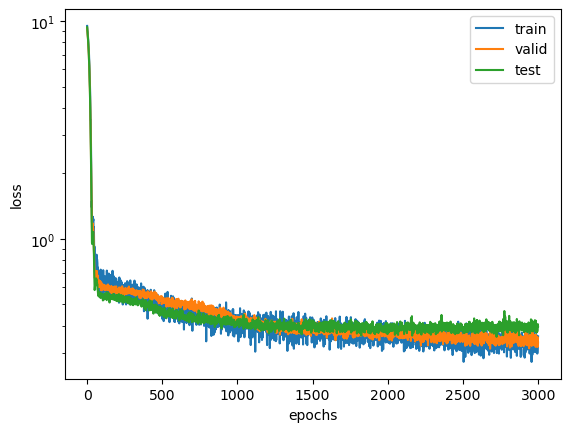

[I 2023-07-15 15:05:42,735] Trial 84 finished with value: 0.33506763596502737 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.06113731444226433, 'optimizer': 'Adam', 'lr': 2.6256599348203494e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.660324 valid 9.436814 test 9.515213
Epoch: 020 Loss: train 4.457167 valid 4.212127 test 4.112151
Epoch: 040 Loss: train 1.296546 valid 1.127054 test 1.060127
Epoch: 060 Loss: train 0.677222 valid 0.694354 test 0.664067
Epoch: 080 Loss: train 0.693730 valid 0.598455 test 0.556155
Epoch: 100 Loss: train 0.650288 valid 0.590617 test 0.560031
Epoch: 120 Loss: train 0.643065 valid 0.600128 test 0.542751
Epoch: 140 Loss: train 0.661660 valid 0.587221 test 0.541690
Epoch: 160 Loss: train 0.613318 valid 0.598126 test 0.538234
Epoch: 180 Loss: train 0.626882 valid 0.567979 test 0.548363
Epoch: 200 Loss: train 0.639137 valid 0.585496 test 0.525791
Epoch: 220 Loss: train 0.594641 valid 0.569902 test 0.539080
Epoch: 240 Loss: train 0.604879 valid 0.592169 test 0.522562
Epoch: 260 Loss: train 0.576619 valid 0.567728 test 0.549063
Epoch: 280 Loss: train 0.557425 valid 0.568473 test 0.533148
Epoch: 300 Loss: train 0.576777 valid 0.569989 test 0.524084
Epoch: 320 Loss: train 0

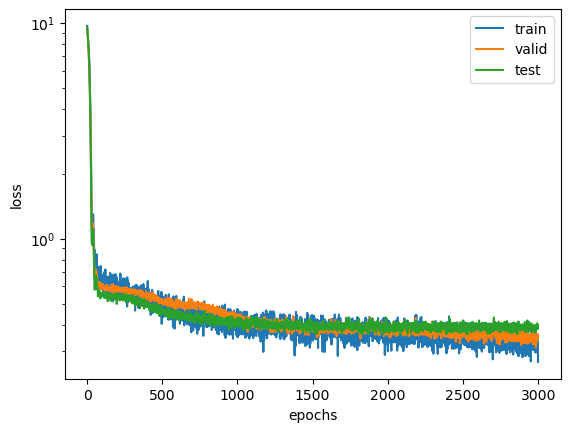

[I 2023-07-15 15:08:36,585] Trial 85 finished with value: 0.3554843802553829 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.05938761247093784, 'optimizer': 'Adam', 'lr': 2.733212122652772e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.491423 valid 9.368711 test 9.447270
Epoch: 020 Loss: train 7.823056 valid 7.718525 test 7.776936
Epoch: 040 Loss: train 5.507719 valid 5.127004 test 5.068071
Epoch: 060 Loss: train 2.231542 valid 2.223580 test 2.030695
Epoch: 080 Loss: train 1.124588 valid 1.242732 test 1.026119
Epoch: 100 Loss: train 1.063689 valid 1.031196 test 0.795733
Epoch: 120 Loss: train 0.947660 valid 0.791965 test 0.679835
Epoch: 140 Loss: train 0.735206 valid 0.755296 test 0.702522
Epoch: 160 Loss: train 0.763679 valid 0.741033 test 0.623141
Epoch: 180 Loss: train 0.776346 valid 0.679149 test 0.587714
Epoch: 200 Loss: train 0.622234 valid 0.680416 test 0.601789
Epoch: 220 Loss: train 0.707460 valid 0.629243 test 0.533160
Epoch: 240 Loss: train 0.710167 valid 0.612732 test 0.554119
Epoch: 260 Loss: train 0.751761 valid 0.627722 test 0.554192
Epoch: 280 Loss: train 0.724601 valid 0.616754 test 0.541288
Epoch: 300 Loss: train 0.687919 valid 0.635409 test 0.546178
Epoch: 320 Loss: train 0

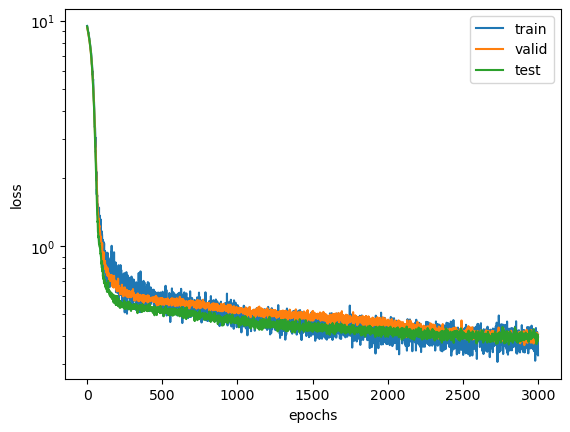

[I 2023-07-15 15:11:27,493] Trial 86 finished with value: 0.4004024305656164 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.060320606603151916, 'optimizer': 'Adam', 'lr': 1.0220916019984783e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.651982 valid 9.502975 test 9.573408
Epoch: 020 Loss: train 6.107542 valid 5.723921 test 5.737053
Epoch: 040 Loss: train 1.236584 valid 1.190258 test 1.046452
Epoch: 060 Loss: train 0.800490 valid 0.764933 test 0.649691
Epoch: 080 Loss: train 0.660996 valid 0.676621 test 0.606986
Epoch: 100 Loss: train 0.624101 valid 0.660875 test 0.544510
Epoch: 120 Loss: train 0.673530 valid 0.596198 test 0.562727
Epoch: 140 Loss: train 0.713629 valid 0.610202 test 0.566223
Epoch: 160 Loss: train 0.706199 valid 0.622455 test 0.542725
Epoch: 180 Loss: train 0.574570 valid 0.599240 test 0.541330
Epoch: 200 Loss: train 0.701406 valid 0.581436 test 0.556320
Epoch: 220 Loss: train 0.617521 valid 0.587640 test 0.536374
Epoch: 240 Loss: train 0.570606 valid 0.572905 test 0.547123
Epoch: 260 Loss: train 0.649044 valid 0.579867 test 0.527148
Epoch: 280 Loss: train 0.593245 valid 0.586152 test 0.545152
Epoch: 300 Loss: train 0.618253 valid 0.574783 test 0.534458
Epoch: 320 Loss: train 0

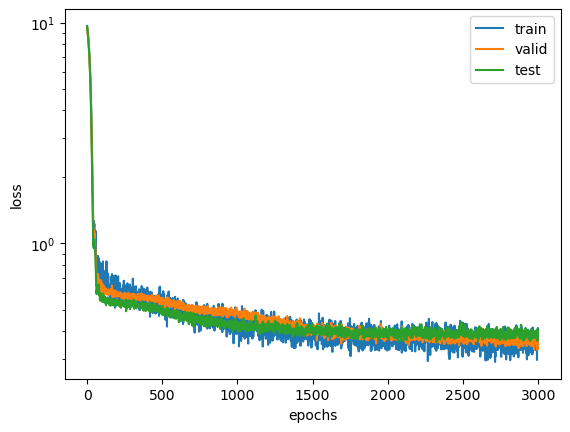

[I 2023-07-15 15:13:40,836] Trial 87 finished with value: 0.35505573782780564 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 7, 'dropout': 0.06364276137154617, 'optimizer': 'Adam', 'lr': 2.075030659235027e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.447526 valid 9.317699 test 9.393797
Epoch: 020 Loss: train 4.710240 valid 4.328999 test 4.274958
Epoch: 040 Loss: train 1.191580 valid 1.107834 test 1.019801
Epoch: 060 Loss: train 0.841973 valid 0.672029 test 0.635101
Epoch: 080 Loss: train 0.593190 valid 0.603741 test 0.526435
Epoch: 100 Loss: train 0.646778 valid 0.621616 test 0.552765
Epoch: 120 Loss: train 0.644539 valid 0.596658 test 0.535363
Epoch: 140 Loss: train 0.613972 valid 0.584605 test 0.534508
Epoch: 160 Loss: train 0.593237 valid 0.589295 test 0.528980
Epoch: 180 Loss: train 0.629785 valid 0.574264 test 0.529179
Epoch: 200 Loss: train 0.609429 valid 0.572129 test 0.535179
Epoch: 220 Loss: train 0.540679 valid 0.581567 test 0.539274
Epoch: 240 Loss: train 0.608444 valid 0.578609 test 0.532249
Epoch: 260 Loss: train 0.595932 valid 0.558028 test 0.527944
Epoch: 280 Loss: train 0.633118 valid 0.576600 test 0.504413
Epoch: 300 Loss: train 0.609339 valid 0.575806 test 0.532323
Epoch: 320 Loss: train 0

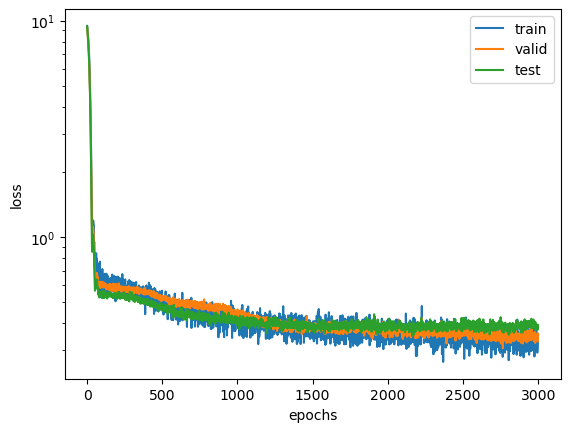

[I 2023-07-15 15:17:01,048] Trial 88 finished with value: 0.3533115388899137 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.05401077373122595, 'optimizer': 'Adam', 'lr': 2.684400880198008e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.590239 valid 9.195178 test 9.275071
Epoch: 020 Loss: train 1.457416 valid 1.163596 test 0.955006
Epoch: 040 Loss: train 0.731577 valid 0.749460 test 0.709242
Epoch: 060 Loss: train 0.590877 valid 0.612223 test 0.559264
Epoch: 080 Loss: train 0.620575 valid 0.587063 test 0.551615
Epoch: 100 Loss: train 0.599041 valid 0.570948 test 0.542194
Epoch: 120 Loss: train 0.646902 valid 0.588132 test 0.533633
Epoch: 140 Loss: train 0.637366 valid 0.586178 test 0.539013
Epoch: 160 Loss: train 0.596296 valid 0.598451 test 0.534419
Epoch: 180 Loss: train 0.576028 valid 0.581383 test 0.549587
Epoch: 200 Loss: train 0.555682 valid 0.590130 test 0.521293
Epoch: 220 Loss: train 0.521859 valid 0.570870 test 0.506366
Epoch: 240 Loss: train 0.526459 valid 0.568665 test 0.529169
Epoch: 260 Loss: train 0.570074 valid 0.565039 test 0.504010
Epoch: 280 Loss: train 0.588136 valid 0.578518 test 0.512888
Epoch: 300 Loss: train 0.544922 valid 0.581114 test 0.517379
Epoch: 320 Loss: train 0

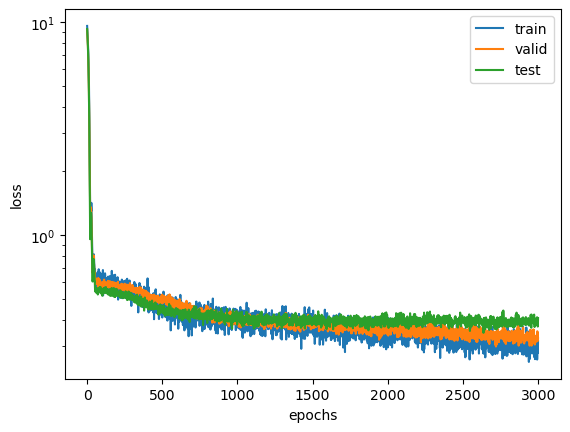

[I 2023-07-15 15:19:35,315] Trial 89 finished with value: 0.3129488278816724 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.07485383155591524, 'optimizer': 'Adam', 'lr': 4.2731247109793614e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.535421 valid 9.259359 test 9.335805
Epoch: 020 Loss: train 1.142389 valid 1.099173 test 0.956896
Epoch: 040 Loss: train 0.697089 valid 0.735942 test 0.732570
Epoch: 060 Loss: train 0.707788 valid 0.611381 test 0.551907
Epoch: 080 Loss: train 0.559549 valid 0.590245 test 0.544211
Epoch: 100 Loss: train 0.601747 valid 0.573591 test 0.549927
Epoch: 120 Loss: train 0.587791 valid 0.585954 test 0.548652
Epoch: 140 Loss: train 0.536066 valid 0.586083 test 0.543699
Epoch: 160 Loss: train 0.526931 valid 0.578985 test 0.532832
Epoch: 180 Loss: train 0.591272 valid 0.588055 test 0.548166
Epoch: 200 Loss: train 0.577401 valid 0.586403 test 0.524378
Epoch: 220 Loss: train 0.546931 valid 0.553148 test 0.520239
Epoch: 240 Loss: train 0.570257 valid 0.565710 test 0.523261
Epoch: 260 Loss: train 0.552858 valid 0.552483 test 0.521472
Epoch: 280 Loss: train 0.611068 valid 0.562866 test 0.504581
Epoch: 300 Loss: train 0.521035 valid 0.561430 test 0.514490
Epoch: 320 Loss: train 0

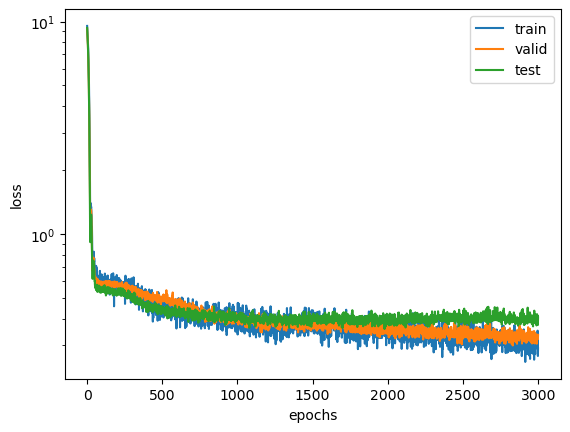

[I 2023-07-15 15:21:48,580] Trial 90 finished with value: 0.3196377596938525 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 7, 'dropout': 0.0765679534009654, 'optimizer': 'Adam', 'lr': 4.3518393972646105e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.675357 valid 9.310304 test 9.393688
Epoch: 020 Loss: train 1.371740 valid 1.226115 test 1.092205
Epoch: 040 Loss: train 0.613507 valid 0.706584 test 0.684574
Epoch: 060 Loss: train 0.633712 valid 0.605880 test 0.558327
Epoch: 080 Loss: train 0.660252 valid 0.596201 test 0.569037
Epoch: 100 Loss: train 0.605863 valid 0.602369 test 0.561998
Epoch: 120 Loss: train 0.607190 valid 0.580085 test 0.578605
Epoch: 140 Loss: train 0.589096 valid 0.581159 test 0.532537
Epoch: 160 Loss: train 0.576015 valid 0.588962 test 0.536877
Epoch: 180 Loss: train 0.655832 valid 0.587375 test 0.537179
Epoch: 200 Loss: train 0.575442 valid 0.569707 test 0.533764
Epoch: 220 Loss: train 0.614777 valid 0.561158 test 0.537483
Epoch: 240 Loss: train 0.573409 valid 0.562092 test 0.513623
Epoch: 260 Loss: train 0.524871 valid 0.593806 test 0.516949
Epoch: 280 Loss: train 0.545566 valid 0.548395 test 0.524526
Epoch: 300 Loss: train 0.590856 valid 0.539890 test 0.521316
Epoch: 320 Loss: train 0

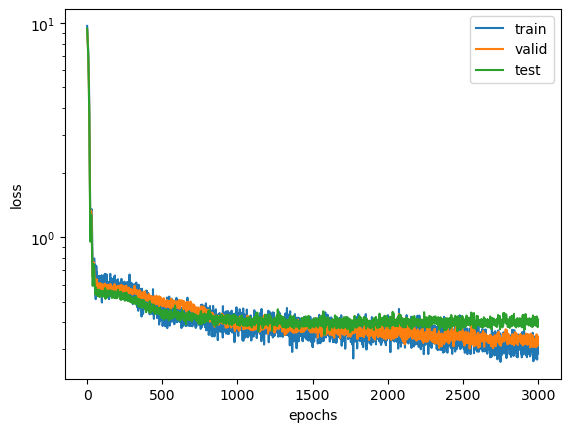

[I 2023-07-15 15:24:20,430] Trial 91 finished with value: 0.3258242613227515 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.07234680090532822, 'optimizer': 'Adam', 'lr': 4.214224912625606e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.584780 valid 9.195296 test 9.276743
Epoch: 020 Loss: train 1.006002 valid 1.010081 test 0.895639
Epoch: 040 Loss: train 0.668727 valid 0.711962 test 0.673661
Epoch: 060 Loss: train 0.589512 valid 0.584668 test 0.555498
Epoch: 080 Loss: train 0.576029 valid 0.611199 test 0.560367
Epoch: 100 Loss: train 0.637406 valid 0.584173 test 0.572289
Epoch: 120 Loss: train 0.511218 valid 0.578804 test 0.547404
Epoch: 140 Loss: train 0.597471 valid 0.582633 test 0.517589
Epoch: 160 Loss: train 0.556495 valid 0.600538 test 0.533072
Epoch: 180 Loss: train 0.547883 valid 0.577006 test 0.535745
Epoch: 200 Loss: train 0.548439 valid 0.590572 test 0.560408
Epoch: 220 Loss: train 0.611354 valid 0.583612 test 0.532902
Epoch: 240 Loss: train 0.583471 valid 0.590105 test 0.516388
Epoch: 260 Loss: train 0.529973 valid 0.572909 test 0.540346
Epoch: 280 Loss: train 0.534971 valid 0.560605 test 0.524796
Epoch: 300 Loss: train 0.529170 valid 0.568159 test 0.499328
Epoch: 320 Loss: train 0

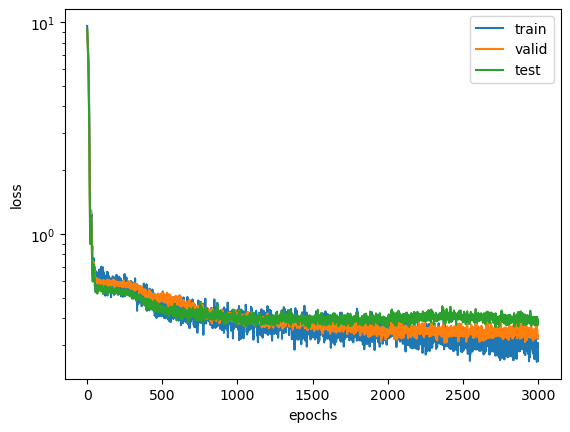

[I 2023-07-15 15:27:48,784] Trial 92 finished with value: 0.3509025436179415 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.07072414375597506, 'optimizer': 'Adam', 'lr': 4.505246408910892e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.492545 valid 9.411507 test 9.490341
Epoch: 020 Loss: train 7.349313 valid 7.130645 test 7.180157
Epoch: 040 Loss: train 3.692228 valid 3.279599 test 3.201566
Epoch: 060 Loss: train 1.045812 valid 1.081421 test 0.952553
Epoch: 080 Loss: train 0.849633 valid 0.825997 test 0.710518
Epoch: 100 Loss: train 0.841303 valid 0.698068 test 0.603670
Epoch: 120 Loss: train 0.799349 valid 0.651797 test 0.574967
Epoch: 140 Loss: train 0.679209 valid 0.660475 test 0.569502
Epoch: 160 Loss: train 0.650289 valid 0.640420 test 0.568598
Epoch: 180 Loss: train 0.653997 valid 0.605696 test 0.556518
Epoch: 200 Loss: train 0.655022 valid 0.613485 test 0.563973
Epoch: 220 Loss: train 0.638905 valid 0.592577 test 0.534247
Epoch: 240 Loss: train 0.661181 valid 0.578791 test 0.550268
Epoch: 260 Loss: train 0.646172 valid 0.594356 test 0.540643
Epoch: 280 Loss: train 0.594817 valid 0.594660 test 0.547011
Epoch: 300 Loss: train 0.569588 valid 0.591176 test 0.536604
Epoch: 320 Loss: train 0

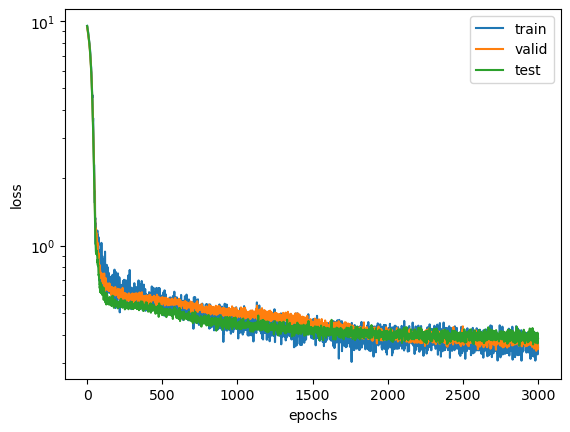

[I 2023-07-15 15:30:06,166] Trial 93 finished with value: 0.36420098705715553 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 7, 'dropout': 0.07670518284500008, 'optimizer': 'Adam', 'lr': 1.460995362863817e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.558687 valid 9.397620 test 9.471153
Epoch: 020 Loss: train 6.616414 valid 6.419930 test 6.423543
Epoch: 040 Loss: train 1.940139 valid 1.861734 test 1.708114
Epoch: 060 Loss: train 1.006194 valid 0.984939 test 0.852222
Epoch: 080 Loss: train 0.763501 valid 0.697265 test 0.637595
Epoch: 100 Loss: train 0.632356 valid 0.679562 test 0.547675
Epoch: 120 Loss: train 0.780857 valid 0.621246 test 0.553584
Epoch: 140 Loss: train 0.718631 valid 0.630442 test 0.549053
Epoch: 160 Loss: train 0.723381 valid 0.602747 test 0.556952
Epoch: 180 Loss: train 0.604341 valid 0.608536 test 0.533624
Epoch: 200 Loss: train 0.736846 valid 0.605459 test 0.531496
Epoch: 220 Loss: train 0.615258 valid 0.595371 test 0.542106
Epoch: 240 Loss: train 0.568906 valid 0.608143 test 0.526177
Epoch: 260 Loss: train 0.645441 valid 0.566686 test 0.545766
Epoch: 280 Loss: train 0.589228 valid 0.562523 test 0.519246
Epoch: 300 Loss: train 0.607245 valid 0.589089 test 0.524658
Epoch: 320 Loss: train 0

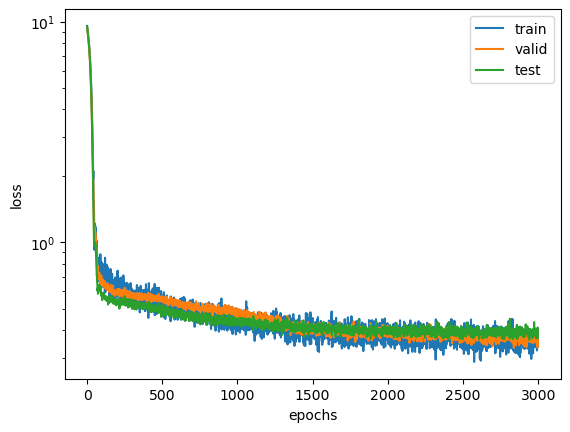

[I 2023-07-15 15:32:23,492] Trial 94 finished with value: 0.3471536909649511 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.0662743809762698, 'optimizer': 'Adam', 'lr': 1.7874855732900236e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.547274 valid 9.177420 test 9.257579
Epoch: 020 Loss: train 1.162780 valid 0.986595 test 0.819308
Epoch: 040 Loss: train 0.678746 valid 0.734934 test 0.701592
Epoch: 060 Loss: train 0.589687 valid 0.623133 test 0.551552
Epoch: 080 Loss: train 0.629149 valid 0.590002 test 0.569403
Epoch: 100 Loss: train 0.611866 valid 0.593343 test 0.559783
Epoch: 120 Loss: train 0.537205 valid 0.569265 test 0.559326
Epoch: 140 Loss: train 0.564383 valid 0.584009 test 0.553371
Epoch: 160 Loss: train 0.565472 valid 0.574797 test 0.563851
Epoch: 180 Loss: train 0.609818 valid 0.562265 test 0.534463
Epoch: 200 Loss: train 0.598988 valid 0.566924 test 0.527347
Epoch: 220 Loss: train 0.599129 valid 0.573817 test 0.523996
Epoch: 240 Loss: train 0.574450 valid 0.583731 test 0.507429
Epoch: 260 Loss: train 0.553456 valid 0.590508 test 0.509533
Epoch: 280 Loss: train 0.532493 valid 0.565581 test 0.493797
Epoch: 300 Loss: train 0.568540 valid 0.575223 test 0.506615
Epoch: 320 Loss: train 0

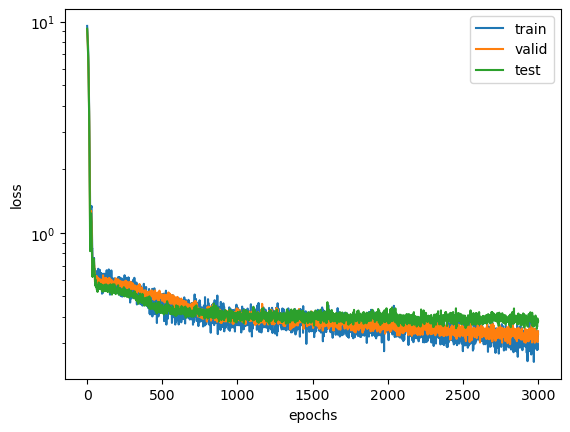

[I 2023-07-15 15:34:37,046] Trial 95 finished with value: 0.33459510962743977 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 7, 'dropout': 0.08448055325577572, 'optimizer': 'Adam', 'lr': 4.5472024166630815e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.581257 valid 9.330736 test 9.412898
Epoch: 020 Loss: train 3.361136 valid 2.974287 test 2.911953
Epoch: 040 Loss: train 0.969499 valid 0.900488 test 0.860128
Epoch: 060 Loss: train 0.633028 valid 0.669170 test 0.623697
Epoch: 080 Loss: train 0.662448 valid 0.621762 test 0.550511
Epoch: 100 Loss: train 0.574767 valid 0.602175 test 0.525688
Epoch: 120 Loss: train 0.613556 valid 0.589522 test 0.561761
Epoch: 140 Loss: train 0.600202 valid 0.585505 test 0.539072
Epoch: 160 Loss: train 0.559466 valid 0.604808 test 0.549870
Epoch: 180 Loss: train 0.574414 valid 0.601836 test 0.549287
Epoch: 200 Loss: train 0.610988 valid 0.576466 test 0.531783
Epoch: 220 Loss: train 0.581880 valid 0.559790 test 0.529941
Epoch: 240 Loss: train 0.577596 valid 0.551310 test 0.528922
Epoch: 260 Loss: train 0.593386 valid 0.568248 test 0.543961
Epoch: 280 Loss: train 0.569391 valid 0.576952 test 0.534273
Epoch: 300 Loss: train 0.579594 valid 0.569992 test 0.521039
Epoch: 320 Loss: train 0

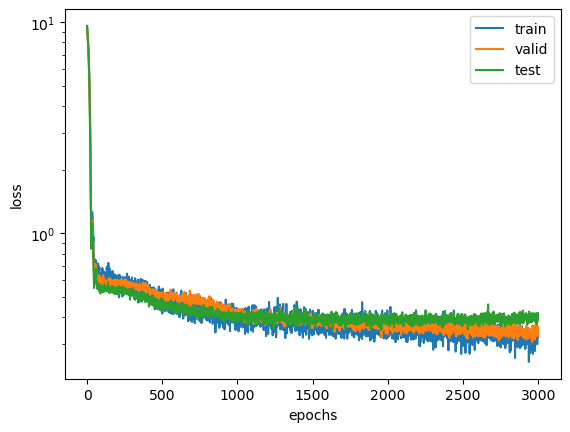

[I 2023-07-15 15:36:54,393] Trial 96 finished with value: 0.3526185420977978 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.07375162365339337, 'optimizer': 'Adam', 'lr': 3.206543944153385e-05}. Best is trial 78 with value: 0.3116599692717692.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.475813 valid 9.039528 test 9.116801
Epoch: 020 Loss: train 1.457600 valid 1.272046 test 1.216463
Epoch: 040 Loss: train 0.583467 valid 0.622994 test 0.538447
Epoch: 060 Loss: train 0.559834 valid 0.587205 test 0.583330
Epoch: 080 Loss: train 0.597436 valid 0.572213 test 0.527229
Epoch: 100 Loss: train 0.540852 valid 0.578448 test 0.551029
Epoch: 120 Loss: train 0.555314 valid 0.588514 test 0.541472
Epoch: 140 Loss: train 0.498114 valid 0.554065 test 0.558957
Epoch: 160 Loss: train 0.533286 valid 0.594313 test 0.544872
Epoch: 180 Loss: train 0.559289 valid 0.569433 test 0.544837
Epoch: 200 Loss: train 0.521903 valid 0.571027 test 0.525640
Epoch: 220 Loss: train 0.523748 valid 0.579354 test 0.509611
Epoch: 240 Loss: train 0.602972 valid 0.554963 test 0.531107
Epoch: 260 Loss: train 0.501635 valid 0.538783 test 0.510075
Epoch: 280 Loss: train 0.531675 valid 0.537152 test 0.494454
Epoch: 300 Loss: train 0.529083 valid 0.545469 test 0.478917
Epoch: 320 Loss: train 0

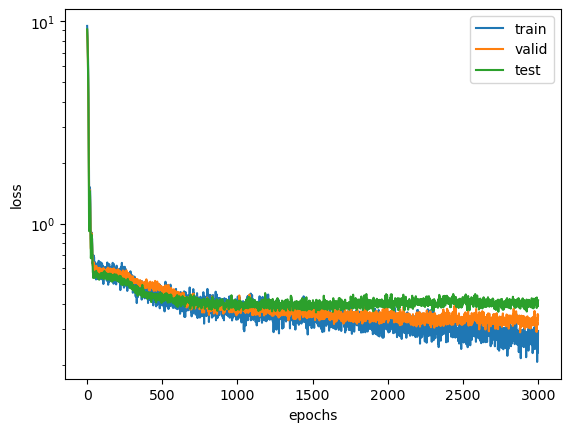

[I 2023-07-15 15:39:12,747] Trial 97 finished with value: 0.3018597409717968 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.06824403907067118, 'optimizer': 'Adam', 'lr': 6.601704166294233e-05}. Best is trial 97 with value: 0.3018597409717968.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.551276 valid 9.261843 test 9.337355
Epoch: 020 Loss: train 1.033898 valid 1.008134 test 0.869020
Epoch: 040 Loss: train 0.710485 valid 0.768585 test 0.740354
Epoch: 060 Loss: train 0.592265 valid 0.611904 test 0.562757
Epoch: 080 Loss: train 0.605957 valid 0.602993 test 0.572988
Epoch: 100 Loss: train 0.627225 valid 0.564104 test 0.540319
Epoch: 120 Loss: train 0.575403 valid 0.582615 test 0.550882
Epoch: 140 Loss: train 0.512787 valid 0.593360 test 0.546722
Epoch: 160 Loss: train 0.601519 valid 0.609961 test 0.530352
Epoch: 180 Loss: train 0.556265 valid 0.572299 test 0.566670
Epoch: 200 Loss: train 0.553738 valid 0.593064 test 0.537173
Epoch: 220 Loss: train 0.620096 valid 0.588298 test 0.553038
Epoch: 240 Loss: train 0.559637 valid 0.591417 test 0.538329
Epoch: 260 Loss: train 0.570028 valid 0.586609 test 0.552582
Epoch: 280 Loss: train 0.530734 valid 0.566696 test 0.531137
Epoch: 300 Loss: train 0.591297 valid 0.568907 test 0.525954
Epoch: 320 Loss: train 0

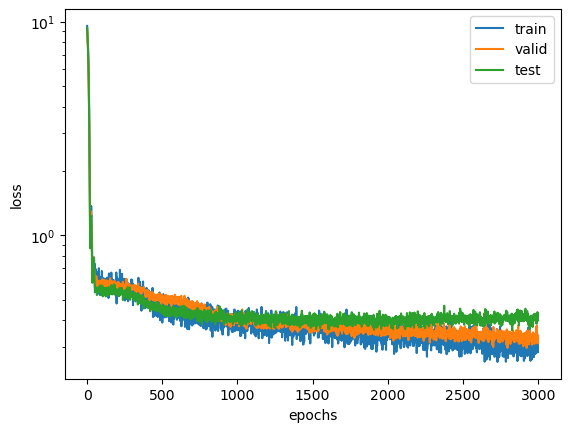

[I 2023-07-15 15:41:33,283] Trial 98 finished with value: 0.3202444673782832 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 8, 'dropout': 0.08012204192274779, 'optimizer': 'Adam', 'lr': 4.551191388571568e-05}. Best is trial 97 with value: 0.3018597409717968.


  0%|          | 0/3000 [00:00<?, ?it/s]

Epoch: 000 Loss: train 9.456856 valid 9.004198 test 9.076753
Epoch: 020 Loss: train 1.436265 valid 1.263584 test 1.212090
Epoch: 040 Loss: train 0.598887 valid 0.599259 test 0.579921
Epoch: 060 Loss: train 0.601732 valid 0.596834 test 0.583936
Epoch: 080 Loss: train 0.619424 valid 0.567617 test 0.560417
Epoch: 100 Loss: train 0.586307 valid 0.574160 test 0.542694
Epoch: 120 Loss: train 0.579163 valid 0.590105 test 0.564391
Epoch: 140 Loss: train 0.532457 valid 0.594232 test 0.544129
Epoch: 160 Loss: train 0.564042 valid 0.569834 test 0.554065
Epoch: 180 Loss: train 0.564774 valid 0.563217 test 0.554644
Epoch: 200 Loss: train 0.546246 valid 0.586367 test 0.552361
Epoch: 220 Loss: train 0.612031 valid 0.573431 test 0.549546
Epoch: 240 Loss: train 0.560932 valid 0.570741 test 0.508005
Epoch: 260 Loss: train 0.535804 valid 0.570072 test 0.522134
Epoch: 280 Loss: train 0.545329 valid 0.559281 test 0.523999
Epoch: 300 Loss: train 0.572268 valid 0.550953 test 0.494165
Epoch: 320 Loss: train 0

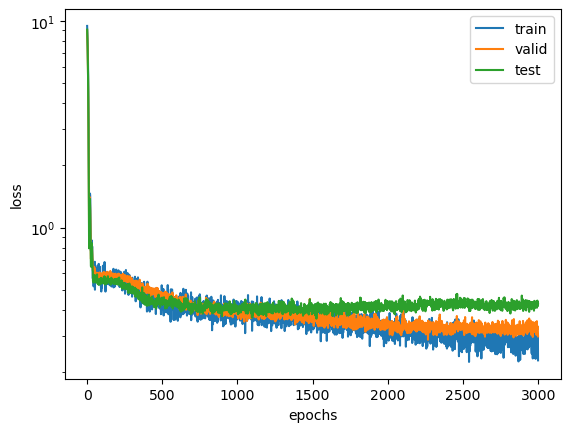

[I 2023-07-15 15:44:05,294] Trial 99 finished with value: 0.3279860092232053 and parameters: {'hidden_channels': 1024, 'num_layers': 2, 'num_timesteps': 7, 'dropout': 0.08205534025049402, 'optimizer': 'Adam', 'lr': 7.023389319122984e-05}. Best is trial 97 with value: 0.3018597409717968.


Study statistics: 
  Number of finished trials:  100
  Number of pruned trials:  0
  Number of complete trials:  100
Best trial:
  Value:  0.3018597409717968
  Params: 
    hidden_channels: 1024
    num_layers: 2
    num_timesteps: 8
    dropout: 0.06824403907067118
    optimizer: Adam
    lr: 6.601704166294233e-05


In [6]:
import pickle

criterion = nn.MSELoss(reduction='sum')

def train(model, optimizer, loader):
    total_loss = total_examples = 0
    for data in loader:
        model.train()
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data.x, data.edge_index, data.edge_attr, data.batch).flatten()
        loss = criterion(output, data.y)
        loss.backward()
        optimizer.step()
        total_loss+=loss.item()
        total_examples+=data.num_graphs
        return np.sqrt(total_loss / total_examples)

def test(model, optimizer, loader):
    total_loss = total_examples = 0
    for data in loader:
        data = data.to(device)
        out = model(data.x, data.edge_index, data.edge_attr, data.batch).flatten()
        loss = criterion(out, data.y)
        total_loss += loss.item()
        total_examples += data.num_graphs
    return np.sqrt(total_loss / total_examples)

def objective(trial):
    # Generate the model.
    hidden_channels = trial.suggest_categorical('hidden_channels', [64, 256, 512, 1024])
    num_layers=trial.suggest_int("num_layers", 2, 6)
    num_timesteps=trial.suggest_int("num_timesteps", 2, 8)
    dropout=trial.suggest_float("dropout", 0.05, 0.2)
    model = molecular_conv(out_channels=1,  # active or inactive
                       in_channels=node_dim, edge_dim=edge_dim,
                       hidden_channels=hidden_channels, num_layers=num_layers, num_timesteps=num_timesteps,
                       dropout=dropout)
    model=model.to(device=device)
    # Generate the optimizers.
    optimizer_name = trial.suggest_categorical("optimizer", ["Adam", "RMSprop", "AdamW"])
    lr = trial.suggest_float("lr", 1e-5, 1e-1, log=True)
    optimizer = getattr(optim, optimizer_name)(model.parameters(), lr=lr)
    train_epochs=3000
    func = {'train': train, 'valid': test, 'test': test}

    learn_curve = defaultdict(list)

    for epoch in tqdm(range(train_epochs)):
        loss = {}
        for mode in ['train', 'valid', 'test']:
            loss[mode] = func[mode](model,optimizer,loader[mode])
            learn_curve[mode].append(loss[mode])
        if epoch % 20 == 0:
            print(f'Epoch: {epoch:03d} Loss: ' + ' '.join(
                ['{} {:.6f}'.format(m, loss[m]) for m in modes]
            ))
    fig, ax = plt.subplots()
    for m in modes:
      ax.plot(learn_curve[m], label=m)
    ax.legend()
    ax.set_xlabel('epochs')
    ax.set_ylabel('loss')
    ax.set_yscale('log')
    plt.show()

    loss_valid=test(model,optimizer,loader=loader['valid'])

    if trial.should_prune():
        raise optuna.exceptions.TrialPruned()

    return loss_valid


if __name__ == "__main__":
    study = optuna.create_study(direction="minimize")
    study.optimize(objective, n_trials=100)

    pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
    complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])
    with open('example-study.pkl', 'wb') as f:
        pickle.dump(study, f)
    print("Study statistics: ")
    print("  Number of finished trials: ", len(study.trials))
    print("  Number of pruned trials: ", len(pruned_trials))
    print("  Number of complete trials: ", len(complete_trials))

    print("Best trial:")
    trial = study.best_trial

    print("  Value: ", trial.value)

    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))